# EXERCISE 8 

## Part - Converting, Visualising and Calculating Descriptors a De Novo generated molecular library - Please see compendium 8 (section Similarity of molecules)

#### In exercise 8, here we will investigate an arbitrary de novo generated molecular compound library, score it according to its originating reference molecule using measures of Dice Similarity and Jaccard distance and also calculating descriptors, which is outputted to an external data-set to be analyzed in Orange. In essence this script takes input SMILES and molecule ID from a compound library and outputs a data-set that includes many descriptors and calculated variables.

##### The code has already been runned, one can just read through it. If issues, in the above tab "Run" select "Run All Cells", to reset all variables and this notebook, access tab "Kernel" and select "Reset Kernel and Clear All Outputs".

##### Jupyter Lab is a notebook system allowing direct import, input and output in a successive order. Each cell that when clicked upon shows a blue mark, pressing "SHIFT+ENTER" will perform the code written in any cell. The code allowing the different steps is hidden, whereby one may click on the three dots to reveal the code. We describe each step with wording, which is enough to understand the results processing. 

In [3]:
#Code libraries imported and some settings chosen in order to make the code function in this notebook

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import base64
from IPython.display import Image, display
from base64 import b64decode
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors, Descriptors
from rdkit.Chem.Draw import SimilarityMaps, IPythonConsole
from rdkit import DataStructs
from sklearn.metrics import jaccard_score
from rdkit import RDLogger                                                                                                                                                                                                                                                                                                                         
RDLogger.DisableLog('rdApp.*')

$ \color{lightblue}{\rule{25 cm}{0.1 cm}} $

## Importing an compound library in  ".sdf" file data and keep only columns containing SMILES entry and ID + add the reference molecule to data

#### Here we import the data from an .sdf file of a molecular compound library and store it in a variable data, keeping only two columns ID and SMILES. There may be a lot of features from the original file related to each molecule, we will however mind only the SMILES and identifier column. We will also append (to end of file) the original reference molecule "Aspirin" as default here, but any molecule SMILES can be added.

In [4]:
# Loading a de novo molecule library, that atleast contains an ID and SMILES
data_original = PandasTools.LoadSDF('generated.sdf', embedProps=True, molColName=None, smilesName='smiles')

# Keeping only the SMILES and ID column of any number of columns
data = data_original [['SMILES', 'ID']]

# Appending the SMILES of a reference molecule Aspirin to the last row of data
data = data.append({'SMILES':'CC(=O)Oc1ccccc1C(=O)O', 'ID':'CHEMBL25-Reference'}, ignore_index=True)

# Showing the last 5 rows of data 
data.tail()

,SMILES,ID
96,O=C(O)CC1CC2CCC1C2,CHEMBL25-Var2682
97,CC(=O)OC1OCC(C(C)=O)C1C,CHEMBL25-Var510
98,O=C(O)C1Cc2c(o[nH]c2=O)CN1,CHEMBL25-Var3722
99,CC=C(NC(=O)C1CC12CC2)C(=O)O,CHEMBL25-Var2380
100,CC(=O)Oc1ccccc1C(=O)O,CHEMBL25-Reference


$ \color{lightblue}{\rule{25 cm}{0.1 cm}} $

$ \color{red}{\rule{25 cm}{0.1 cm}} $

## Reference molecule

#### We create from the canonical SMILES string select reference molecule (which was added to the end-row of our data), for this compound library aspirin is most suitable as reference, here from ChemBL entry 25, 
#### Displaying the molecular object representation built from its SMILES string.
#### From the molecular object create and show a Morgan Fingerprint in array format (a list of 1's and 0's) . 

'CC(=O)Oc1ccccc1C(=O)O'

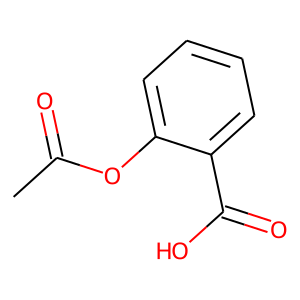

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [5]:
# Creating a variable containing the SMILES of the last row of data, the reference molecule
ref_smile_string = data["SMILES"][data.index[-1]]

# Displaying this SMILES variable
display(ref_smile_string)

# Creating a variable containing the molecular object converted from the SMILES of reference molecule
ref_mol_obj = Chem.MolFromSmiles(ref_smile_string,sanitize=True)

# Displaying the molecular object by calling this variable
display(Draw.MolToImage(ref_mol_obj))

# Creating a variable containing a morgan finger-print from the molecular object of reference molecule
ref_mol_fp = Chem.RDKFingerprint(ref_mol_obj,maxPath=7,fpSize=512)

# Converting the variable fingerprint and showing it as an array, revealing the bit-format of 1's and 0's
np.array(ref_mol_fp)

$ \color{red}{\rule{25 cm}{0.1 cm}} $

$ \color{lightgreen}{\rule{25 cm}{0.1 cm}} $

## Example of an arbitrary molecule from the de novo compound library

#### We create from the canonical SMILES string an arbitrary molecule from the compound library, the one at the top
#### Then create and displaying the molecular object representation built from its SMILES string
#### From this molecular object create and display a Morgan Fingerprint as an array (a list of 1's and 0's) 

'CSC1(C(=O)O)C2CCC3C2CCC31'

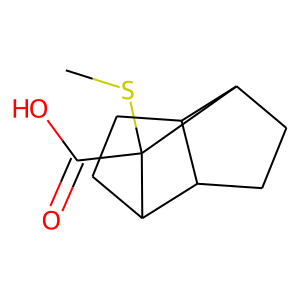

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [6]:
# Creating a variable containing the SMILES of an arbitrary molecule from data
one_smile_string = data["SMILES"][0]

# Displaying the SMILES
display(one_smile_string)

# Creating a variable containing the molecular object converted from the SMILES of arbitrary molecule
one_mol_obj = Chem.MolFromSmiles(one_smile_string,sanitize=True)

# Displaying the molecular object by calling this variable
display(Draw.MolToImage(one_mol_obj))

# Creating a variable containing a morgan finger-print from the molecular object of arbitrary molecule
one_mol_fp = Chem.RDKFingerprint(one_mol_obj,maxPath=7,fpSize=512)

# Converting the variable fingerprint and showing it as an array, revealing the bit-format of 1's and 0's
np.array(one_mol_fp)

$ \color{lightgreen}{\rule{25 cm}{0.1 cm}} $

$ \color{darkblue}{\rule{25 cm}{0.1 cm}} $

## Adding a Molecular Object to each compound in the data

#### At rightmost column to the data variable, for each compound in the de novo library, adding a column of MolObj, represented as pictures in a text format
#### To the right, in this data (only top 5 shown), we can see that the corresponding column of MolObj have been added (encrypted in this very long string) 

,SMILES,ID,MolObj
0,CSC1(C(=O)O)C2CCC3C2CCC31,CHEMBL25-Var1489,
1,O=C(O)C1CC2C3CCC2C1C3=O,CHEMBL25-Var3509,
2,CC1(C(=O)O)C2CCC(O2)C1(C)C(=O)O,CHEMBL25-Var1634,
3,COC12C=C(C)C(CC1)CC2C(=O)O,CHEMBL25-Var1676,
4,O=C(O)C12CC3CC(CC(F)(C3)C1)C2,CHEMBL25-Var3066,

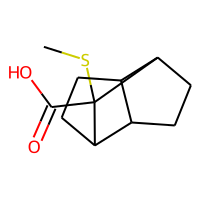
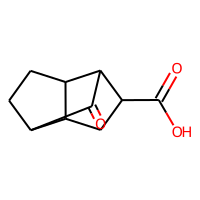
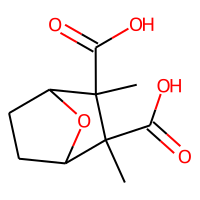
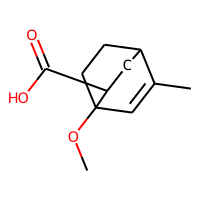
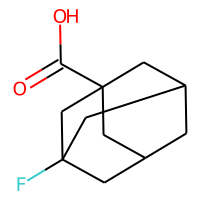

In [7]:
# Add a column of Molecular Object from SMILES for each molecule in data
data["MolObj"] = data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

# Display the top 5 rows of data
display(data.head())

$ \color{darkblue}{\rule{25 cm}{0.1 cm}} $

$ \color{magenta}{\rule{25 cm}{0.1 cm}} $

## Molecular fingerprints

#### We will make a molecular fingerprint in array format and its bit string format, associated with each entry of this library, we choose a particular used fingerprint called Morgan Finger-print.
#### We add here Morgan fingerprint o generated from the Molecular Object (generated from the molecules SMILES representation)

,ID,SMILES,Morgan Finger Print,MolObj
0,CHEMBL25-Var1489,CSC1(C(=O)O)C2CCC3C2CCC31,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...",
1,CHEMBL25-Var3509,O=C(O)C1CC2C3CCC2C1C3=O,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",
2,CHEMBL25-Var1634,CC1(C(=O)O)C2CCC(O2)C1(C)C(=O)O,"[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, ...",
3,CHEMBL25-Var1676,COC12C=C(C)C(CC1)CC2C(=O)O,"[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, ...",
4,CHEMBL25-Var3066,O=C(O)C12CC3CC(CC(F)(C3)C1)C2,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, ...",

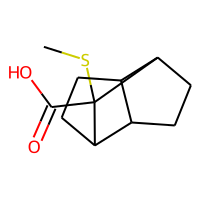
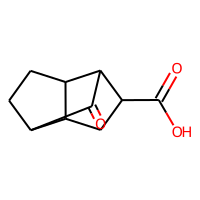
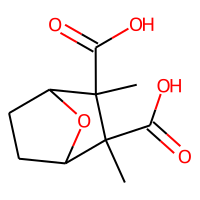
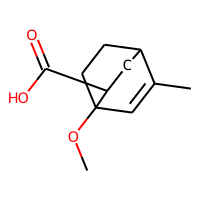
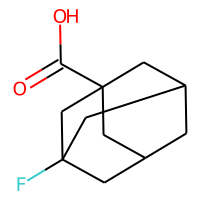

In [8]:
data['Morgan Finger Print'] = data['MolObj'].apply(lambda x: Chem.RDKFingerprint(x,maxPath=7,fpSize=512)) # calculate fingerprint from molecular object for each molecule

# Sort the data columns as in order shown
data = data[['ID','SMILES', 'Morgan Finger Print','MolObj']]

# Display the top 5 rows of data
data.head()

$ \color{magenta}{\rule{25 cm}{0.1 cm}} $

$ \color{cyan}{\rule{25 cm}{0.1 cm}} $

## Comparing Similarity of reference molecule to compound library

#### We add here two columns to our dataset of the Dice similarity and Tanomoto similarity to our reference molecule and sort the data table to show the highest similarity to reference molecule among all (note the reference molecule is compared to itself also so it will appear on the top)

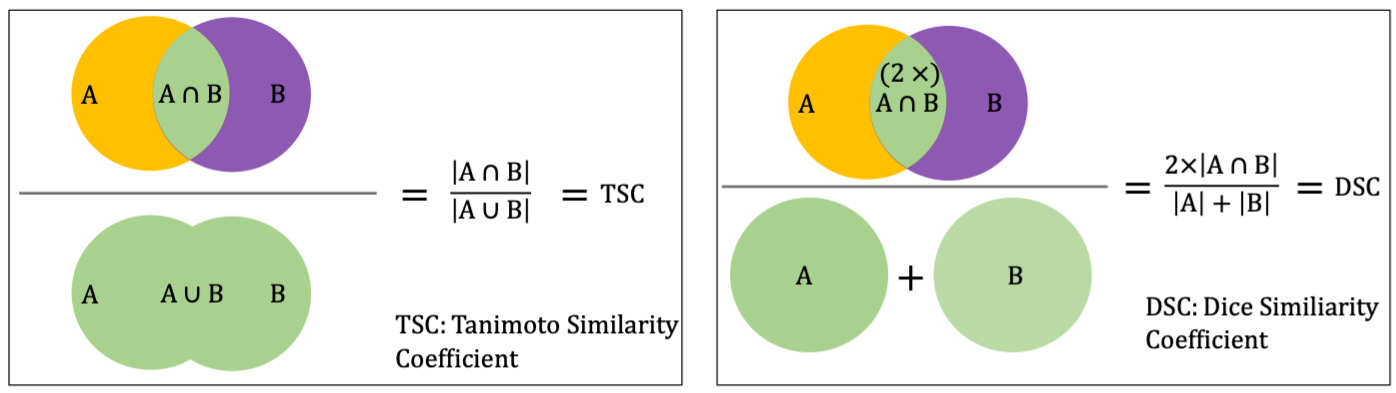

,ID,SMILES,Dice Similarity to reference molecule,Tanimoto Similarity/Jaccard Coefficient to reference molecule,Morgan Finger Print,MolObj
100,CHEMBL25-Reference,CC(=O)Oc1ccccc1C(=O)O,1.000000,1.000000,"[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, ...","<img data-content=""rdkit/molecule"" src=""data:i..."
32,CHEMBL25-Var2680,O=C(O)C12C=CC(C1)c1ccccc12,0.666667,0.500000,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","<img data-content=""rdkit/molecule"" src=""data:i..."
17,CHEMBL25-Var232,CC(=O)C1OC12C(=O)C=C(C)NC2=O,0.661224,0.493902,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","<img data-content=""rdkit/molecule"" src=""data:i..."
98,CHEMBL25-Var3722,O=C(O)C1Cc2c(o[nH]c2=O)CN1,0.657102,0.489316,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...","<img data-content=""rdkit/molecule"" src=""data:i..."
20,CHEMBL25-Var3127,NC1(C(=O)O)CSC2C(C(=O)O)C21,0.647399,0.478632,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, ...","<img data-content=""rdkit/molecule"" src=""data:i..."


In [14]:
Image_base64_encoded = "iVBORw0KGgoAAAANSUhEUgAABXQAAAGJCAYAAAAqtrsWAAAACXBIWXMAAA7DAAAOwwHHb6hkAAAAGXRFWHRTb2Z0d2FyZQB3d3cuaW5rc2NhcGUub3Jnm+48GgAAIABJREFUeJzs3WeUXPd55/nvvbdy59yN1MiZAAnmIJJiEklLlixawZY8wWlsS96dPfPCO+s5M7t7PDNngme9Y0teWWPJY9EKViBFiUFMIgiSIIgMIgONbnTOXdWV66Z9UQCYELqrAVQX8PucU6dZ6Eb3vwsN4qlfPfd5DN/3EREREREREREREZH5zyz3AURERERERERERERkZhToioiIiIiIiIiIiFQIBboiIiIiIiIiIiIiFUKBroiIiIiIiIiIiEiFUKArIiIiIiIiIiIiUiEuFuhu+ND9G3Rf93Vf93Vf93Vf93Vf98t4/2pb86H75f7+dV/3dV/3dV/3dV/3df/6vg+A4fv++X4dIA+ELvROEREREZGrwfM8zzTN1UDXVf7Sx4DVV/lrioiIiIh8gO/7nmEYDwKvAQQu9RtyuRy2bV/pc4mIiIiIfEAoFCIUKn9/QT6fx7ZtLtIIISIiIiJy2QWDQUKhEIZhfODXLxnovvPOOxw9evSKHUxERERE5MN832fLli1s2rSJYDBY1rPs27ePw4cPq8lBRERERK4a3/dZv349N910E1VVVR943yUD3SeffJJnnnmGzs7Oj6TBIiIiIiJXwvHjx/nqV7/KqlWryh7oPv3003z/+9+nsbGx7GcRERERketDT08Pn/vc5+js7Jx9oAvwqU99iq9//esqYEVERETkqnjiiSfmxbiFsx566CH+7M/+jLa2tnIfRURERESuA1/96leprq4+d99xHCMQKEa5ZrkOJSIiIiIiIiIiIiKXFggEzi10UKArIiIiIiIiIiIiMo85jnNuFq4CXREREREREREREZEKMaMZuiIA+B74dvHmFcB3wXcA98x/e4D/vpvx3s0wAQuMs7cAGEEwQ8W3GKCleyIiIiIiIiIiIh/x/pELCnTlo3wfvNx5bhkojEBhAArD4MTBmQI7Ae40ePn3Al/feS+0NUJgBsGqg0AdBOqLt1A7hBZAqAOsGJhhMCNgRs+8jRTPcw0Gvb7n47oevuvjeT6+5+O5Pr4PUHzr+z4GxgeybsM0ME2j+NYyMC0T0yq+07gGHycREREREREREfngUjQFulLsrHUz4KWKb90UZI9D5jhkT0L2RPGtPQp4V+AABgRbIbocoqvO3NYU3wZqwKoCs6r4tsI6eV3Hw7U9HNvFKXh4jofreBTyLpl4nlyqQC5jU0g75DI2bsHFdT0818dxPEzjbHBrYAZMgmGLcCxIJBYkFAsSqwkRqw8TCJlYgeItELKwgiaBoIlhGgp6RUREREREREQqnDp0pdhN60yDmwRnEpJ7ILUbUvshfRC89FU8jA/2SPE2vf29XzZjULUBqjZD9RaouRmCTWDVFDt9jdC8Cnd938fJu9jnbg6pyRzxkTRTwxniwymSEzlSUzlyKfvyfWEDYrUhqhoi1DVHqW+vor6tivr2KmJ1YUJhi0DYIhgOEAiZCnhFRERERERERCqYAt3riZc/MyYhXuy6TWyDxFuQ3A1+ttyn+ygvA8mdxRuAESkGu3V3Qt19EFsFgYbi+IYyhbuu7VHIORSyDrl0gfG+JGM904z2TjPWmyCfcq78IXzIJApkEgXGeqY/8K6q+jAtnbW0LKmlpbOWpoU1hGMBgtEAoUgA01IHr4iIiIiIiIhIJVGge63zXXAS4ExA+hhMvQxTL0H2CMXFZRXEz0HyreKt/88hug4aHoCGRyC2BoLNxXAX84qGu47tks845NM2U8NpBo9PMXRikuFTcZz8lRhJUbp0PE86PkbP/jEAwlVBOlbU07G6gQWrGqhtjhKuChKOBRXuioiIiIiIiIjMU5qhez3wcmCPQ34AJl+EiachtY8rMwO3TLJHirfBr0HVjdD8aWj4BIQXQbCluGTtMgWUnuuRzzhkUwUmB1L0Hhzn9LtjTA2nKyoXz6dteg6M0XNgDAxoXVpH58ZmFm9opq41RrS6GO4WRxUr3BURERERERERmQ80Q/da5iTBHoPUuzD2PZh4DrxkuU915aX3FW99/xUaHoW234TqTRBsA6u65GDXzhVD3OnxLD37xzi5c5ipoRR+BYW4F+TDaHeC0e4EO3/eRfvyOlbc3E7nxhaqGsJEa0JYQc3cFREREREREREpN3XoXoucJBSGIbEVRp6ExBuAW+5TXX1eGiZ+DBM/gdp7oPU3oeE+CC0sLlObQTjp+36xG3c6z+CJOMd3DNB7cALXvoa6mz/Mh+GuBMNdCXb+7CRLb2xlzR0LaFlcS6wuTDBiKdgVERERmQvfAzyKnQH+mf/mTH165maYXOnxYSIiIlKZ1KF7LXGSUBiC+Csw+E1I7+eaGqtQMh+mtxVvVZug4/eg/gEIL75gx67v++RSNsnJLKcPjHH0zQHG+5LXRjfuLBSyLse3D3F8+xAL1zSw9q6FLFrXRHVjhFA0oGBXRERE5MN8H/x8cQmxlwe/AF6h+NZ3ijcvD27mzPvsM+/zwAyCEQQjAGYErKoz960zb0NgnrkZ4eLHGAGFviIiItcZdeheC7wc5Adh6lUY/OviuAEFueeXPgAn/xiqNkPHH0DDg8U5u2YEDONckJuazHFi5xCHtvaTnMiW+9TzwsCxKQaOTdG8uIaN9y9mycYWapoU7IqIiMh1zPeLtbiXBjcNXhacNBT6IdddrNELg8W39ig4U8UlxV6GmS1fsIpXlgXqINgIwXYILYBwR7E5IbIcQs1gVoEVPfP2bAhc+fWZ5/q4jofreHhn37o+nufjn33r++AXGzLOMcDAwDDAMA0My8A0z9wCJtb7bmZAy4BFRKSyKdCtNL5bHK2Q3A0D/x3iv0RB7gyl98PJP4S6+2HBH+PU3kreqyM7ASfeGebga70kJ3LlPuW8NN6X5LXvHKZ5UQ0bP76EpZuaqWmOEQhpxq6IiIhc484GuG6yeHOmIXuy2DSQPgjZ45DrORPYXg4uuPHiLX/6/B8SaCoGu7G1UH1D8Yq0UEcxBLZqzowam/9dvK7tYecdnIKLU/BwbJds0iY1lSM9lSu+jefJpW3yGZtCxiGfsXHsYtjreT6e62MYYFnFENcKmIQiAUKxIOFogHBVkFhdmKr6MFX1EaobI1TVhwlFAgSCJoGQRSBsEQxZWgwsIiLzmkYuVConAZljMPA1GPtB8bIumTUv8TqZ6SOMtfwO/bnb6X7BYvK4i5c/O79MLmS8P8lr3zlEx8p6bnxkGQtWN1DdGMG01OUgIiIi1xDfK3bfOvFiDZ49CtM7irf0/mKwO6Nu2yvEmYDUBKR2wuiZXwstguotUHsH1N5W7OoNNkCgvjiqYR7Uao7tUsg62DkXO+8wPZZlvC/J5GCK+EiaqeE0uWRh1iPPfIqdvUXFUBgufMWdFTSpbYnS0F5FfXs1zYtraOyoIlIdIhixCEWDBMNWsdt3HjxuIiIioJELlcezId8PE89A338pXsJVzgKyQvlAnmoSVhuHrQcZLzTgW11Yd5pEAk3ku6pwk4EzD60Kt4sZOhln+NRelm9p46ZPLKN5cS3RmqAKXhEREalcvl8co2BPgT0GyZ3F8WbTbxSvkJvvV8UV+mGyHyafASyIrYf6+4p7JGKrINgMgYbiTN6rVLP5vk8h51LI2BSyDpNDaYZPTjHSnWC8d5psCeHt5eDaHlODaaYG05xNxK2gQUN7NS2dtXSsaqC1s5ZobZhwLEA4FlQDg4iIlJ06dCuJk4DUfjj974uLz3DLfaKK5BIgaTTRE7yNrvBduNZ7hWyw0aPhkTGyhzMk32nAmQjjO6BQ9+J8D7p2jTBwZJIbH1nKmjsXUNcawwpqDIOIiIhUEK9QnHNrjxc7cCdfgMRrxfsV20ThQubd4m3waxBdW9wj0fgYRFdBsAUCNcXFa5eZ7/vYOYdc2iY7XWD4VIL+wxMMnpgkNZXH9+bnY+raPuN9Scb7khx5Y4Bg2KJ5SQ2L1jaxaF0jdS0xItUhwlUKd0VEpDzUoVsJfA/yfTD+NPT+h+JCBSlJjirGAss4EPwk6XAzGOZHPsYwILYhTbAjy/SbzeR7YnjpAAp1Ly2Xtnn7qRP0HBjj1k+tYMGaRmK1IRW5IiIiMr+56WInbvoYTL0AEz8vLjW75hoofMgeKd6GvgE1d0DTp4rdu+HFxc7dyzBv17FdcimbTKLA4IlJet8do//oJLm0XZG5uJ13GToRZ+hEnF3PdtGypJbF65vpvKGZurYYsdriHF7DVM0rIiJXhzp05zsvB+kjxSB3/CmuvaLy6vAwSRmNdIdu5UT4Xjzz0peXBRs9Gh8bJbWnlvS+epypkEYwzNBwV5znv76XLY8tZ909C6lvq1L3goiIiMwvvg/uNBRGiiMVRn9YvArOS5X7ZFeHb8P0tuIttAiaPw3Nnyl27YbaZj1r1/d9ClmHzHSBif4k3ftG6dk/SmoyV5ZRCleK78FozzSjPdPse6mHBasbWL6ljYWrG6lpihCpDqnuFRGRK85xHNShO1/ZU5B4A079SXH5QiW+nD0POASZNBezP/grTEU7z9uVeyFGAGpumybQXGB6WxP2WAQ0gmFGnILHOz89ycDxSe74zCraV9QTigZU3IqIiEh5nQ1y80PFAHfkSUjtAb9Q7pOVT6G/OI5h5O+h4XFo+xJUbYRwxyWDXd/zyaVt0vEc/UcmOfb2IMNdcVx7ns8Zvgxc26Pv0AR9hyaoboyw8pZ2VtzSRkNbFbG6sMaPiYjIlXTuHxgFuvNJfghGvwen/wzcqXKfpmLliTEUWMO+8KcpBGtKvnwsujxHoG6IxGut5Htj+HkThbozM3BkkheG9nHnE6tZvqWNqrqwLkcTERGR8nBTkBuE+Msw/G1IH7i+g9wPc5Mw/gOY+Bk0/Qq0fRmqN0OoA4zgB2rps0Hu9HiWU3tGOLZ9gPhIBs+9PptQUpM59r3Yw+Ft/Szd3MraOxfQ0llDVX1Ewa6IiFxRCnTnA9+D/Gno+/PiXKviRi6ZJR/IUE936DaORh7AM4NzngUWbPJoeHyY6debyR6twctaKNSdmXQ8z6vfPsjkUIpND3RS31aFYaLCVkRERK4OLw+FIYi/DoN/rY7cS/EzMP5DmHgWWp6A9n9a7NgNNuFjFYPcsSxdu4c58kY/0+NZ/Gu/IXdGClmH428Pcmr3MEtvbGX9PQtp6ayjuiGCGdAoBhERuTw0Q3c+8R1IH4WePy0WT5qXWxIfmKaFd8OPMRS9Af8ybuy1olD/4DhG2CVzsA4vpWVpM+V5Pnue62ZqMM2dv76aliW1mJZCXREREbmCfK+4UDi5t9gsMfUSeJlyn6py+BkY/Q5M/QKn/XfJNH2ZgtvEqe1THHx5gMRYFt+7PjtyL8WxPU7uHKZn3yjLt7Sy4b4ltHTWEqsNYVozHwEnIiJyPo7jGJqhOx94NqT2wYmvQmoXoJe4S+FhEDc62BP6LJPRpbOalztTRgDq7p3CirqkdjfgTgdRqDtz3ftGScdzfOw317FgVQOBkKVQV0RERC4/JwW5UzD8dzD89+BOlPtEFcnDIGsXmBh6liPjDlNTS4jvbSCfjeL7Z59Cqpa7EMf2OL5jmN6DE6y9eyFr71pA48IawtGAxpCJiMhcqEO37Lw8TO+AE38EmcNo+VlpXCwmzcXsDH6OVLTtioS5Zxkm1Nw+jRF1Sb7VjBtXqDsboz3TvPj/7ee+39pA56ZmQhEtSxMREZHLxHeL4xUmX4KBvyjW1xpjNms+UCBGwmzjROBuhiPrcc0wZkeB+sdGyByuJrO/Dnssgm+DauGLy6Vt9r3YQ/e+UTY/vJRlN7ZQ1xrDCmi+roiIlERL0crKyxdneZ34w2IHgcLckrhYjFrL2Rn6PLlw45zn5c5U9aY0BjD9ZjNuQqHubCQnc7zyrQPc96UNLL+5jXBMoa6IiIjMkZuGzHEY+MviDFg3Ve4TVSQPk7TRQG/wJk6G7iYfqP1AfW0GoXpzilB7juSORvK9Mbx0AHzVcpeSGM3w+ncP03ewhU0PL6VjRT2RmhCmunVFRGQWNEO3nLwCxLfB8d8vLkJTmFsSD5NRaznvhH+DfKjuqoW5Z1VtSuP7FDt1FerOSjZp8+r/PIhtu6y5vYNwVVChroiIiMye7xdn5U79Evr+E2QOqiu3RAUiTJkLORx8iInI8uJy4QsItTk0fGKU1N46ModqcSZC4BmoHr4EH7r3jzF0Ks6NDy9l9e0dNLRXa2maiIiURIHu1eTZkHgLTvyBwtw58DAZNVfwTqg8Ye5Z1ZvT4Bsk32zGTWpR2mwUsg5bv3MIw4fVdy5Qp66IiIjMju9ArheGvglDfwPOZLlPVJF8IEMdQ8ENHAk9QDbYMKPa2gxD7R0JQq15pnc0Yg9G8G0T1cOXlkvavP2TE4ycSnDTJ5bRvrJes3VFRGRGtBStHHwXkrvgxL/QmIU58DAYM5exI/wb5MPlC3PPqr4xhZ83Se5owstYqIidOafgsfW7h8EyWHN7B6GoQl0RERGZATcL6Xfh9H+A+IvgZct9oorkYTJttHA0+HEGoptwzcisP0dkeQ6rboTpN5vId1fhZVUPz1T3vlHG+qa59ZMrWHFzG9UNEUzryu0DERGRyvf+kQv6F+Nq8H1IH4GTX4XsCRTmlsYHJo1F7AjNjzD3rOpbE8Q2xjHCHvqznR0757L1yUN07RrGzrv4vh4/ERERuQhnGiZfLI4vm3xWYW6JHIKMm0vZGfocfdEtJYW5ZwWbXBoeGqVqUwKr1gFD9dxMpSZyvP7dI+x+9hTj/Ulc21M9LCIiF+Q4jpaiXVW5bjj5v0JqHwr8SuMDCdp4J/gFcpH6eRPmAhimQe09U3hZi+zROm38nSU767L1ycMEo0GWbW7BCmrrr4iIiJxHYRTGn4LT/x4K/aiuLk2eGMPBNbwbfJRMqAmMuff4mDGovXcSs9olva8OZ+rsXF25FNf22PuLHqaG0tzyyRV0rKwnELZUD4uIyEeoQ/dqKoxBz7+BxFbAK/dpKlaaenYHf41UrP2yFJ2XmxmCuo+PE16SPvO3Sk8wZiObstn6nUMMHp/Ec311JoiIiMh7fB/yAzD4dej+Uyj0oVqrNFlq6A7exr7IZ8iEmi9rXW1YUH1zgpo7Jgm25MDUn9Fs9BwY45d/f4hT+0bJZxzVwyIi8hHv79Cdf8nYtcRNFQvPsR8BbrlPU7HyxDgQeJzJqhXzMsw9y4pB7f2jBJpyatAtwfR4lteePMx43zSqX0VERAQohrm5Puj9T9D//4AzUe4TVSSfYoPEseB9HIk9RD5Qc0WueDNMqLohRe3dE4Tas2BqJNlsTPQnee07hzm2fZDMdAHf02MnIiLnN3/TsUrn2TD+DPT9V85cgy8lcAnQZd3OYPWN+IZV7uNcUqjFo+6ecaxqBxWvszfem2T7j0+QHM+qgBUREbne+X5xdNnp/xOGvw3udLlPVJF8IEUjB4OPcCp2F7YZu+JfM7o6S+2944Q6surUnaX0VI5t3zvC4df7SMVzeKqJRUTkDI1cuBpSe+HUn4CXKvdJKpaPwZC5iiPRh/CY/2HuWdE1OWKb4hghdSSU4tSeEfa92EM2VdClZiIiIters2Fu97+BsR+opi6RDyRpYn/ok/THtuDMYfnZbEWW5qm9Z5xQe+5Mp67MVCHrsP3Hxzn4yz6SE1mFuiIiAmjkwpVXGIbufw2FwXKfpKLFaWN38AncQGReLUGbiZrb44Q7NU+3VHtf6ObkzhGcgjb9ioiIXHd8H3I90PNvYeKn4GXKfaKKVOzMbeJA8JMMR9fjmqGrfobIssL7Ql3VdLPhFDx2PH2CAy+fJjmuUFdERD5Ige7l5mag7y8gsQ0tQStdnhh7A58mH62vuDAXikvSaj82hlWXL/dRKpLn+Wz/8TFGuuMavSAiInK9yfcWxyyMP60wt0TFztxG9gd/hZHYOrwyhLlnRZbnqbl7gmCrQt3Z8lyf3c+d4sArCnVFREQjF64c34epV4qL0DQ3t2QeJl3m7UxWL5/XS9AuJdTqUXPrJEbERV26s5eO59n+4+MkJ3IKdUVERK4XhWHo/Y8w/hR46XKfpmJlqOfd4OOMxNaVpTP3w6IrclTfOkWgoQCG6rrZOBvqHnytl9SkZuqKiFzPNHLhSikMwOl/pxlfczTBYo5GHsAjUO6jzFnV5hSRzvSZbgQVX7PVd2iCA6+eppBzNHpBRETkWmdPwsBfFWfmuslyn6Zi5ajmcOAhRqLrcc1wuY9zTmxdiqob41i1tkLdWfJcn10/7+Lwtj6yibzqYhERUaB72Xg56P8LSB9EwV3pclSxx/o0TihakaMWPsywDGruGceqUcd2qfa92MPQiSl16YqIiFzL3BSMfAcGvwFOvNynqVgFIpwI3El/bDOOdfUWoM2EYRpU3zRNbEMCM6or2GbLdXx2/ayLEzuHyKVshboiItchjVy4EhJvweA3NWphDjwMTpp3kKxZVNGjFj4s1OJRtXkKI+ihwnX27JzL20+dIDmZU+EqIiJyLfIKMPkL6Puv4IyX+zQVyyHIaetGTsXupmDGyn2c8zICxeXBkZVJjJBq49kq5Fy2/+QE3ftGsXOuamMRkeuMRi5cbnYcev+9Ri3MUcJv5XjoPjysch/lsqu6KUmgJQeV33RcFoPHpzi8rR87r8JVRETkmuJ7kNwDPf83FIbKfZqK5WEwYq3kaPRB8mYNxjy+0s0MQ80dk4QWZMFSXTdb2ekCbz91goHjk7iOlnCLiFxP1KF7OfkejP0jJN4A9A9qqVwCvGt+AjdybYxa+DArCjW3TWCEdXlZqfb9oofJgRTKc0VERK4hudPFHRTZo4Bb7tNUJB+IGx28G3icrNVQEbV0sNGj5rYJgk15zdMtQXw4za6fdTHem1SoKyJyHVGH7uWUH4T+P9eohTkaNlYyWr0O7xr+kYyuzhFelNbfuhJlkwX2PH+KfFozw0RERK4JTrxYR09vB79Q7tNUrAy1HLAeIxVuBbNyCs3I8gKxzQmsagc1PMxe3+EJ9r3Uw/R4Bk+7JkRErgvq0L1cfBeG/gZy3agIKV2BMAfMx/Gs4Ly+PGyuDNOg+pZJzIiK1lId3zHEwLFJPFePn4iISEXzCjD2FIz9CNxkuU9TsRxCHDfvZSq2DM8Klvs4s1a1KUl4WUq7Jkp05I1+ju8YUsODiMh1Qh26l0vuNAx/S925c9TvbyRd03ZNLUK7kHCnTWixunRL5bk+u587RS5ZUNEqIiJSyVL7of+/gT1W7pNULB8YMtfQV3UTBTNa7uOUxAxCza2TBFtzYKq2my3fg70vdNN/ZALH1ugFEZFrnTp0LwffhYGvgz1S7pNUtIIf5XDgQTwC5T7KVWEYBjU3q0t3LgaOTtJ7aEJduiIiIpXKnoC+/wy5LrSDonTTfjOHAg+RM+sq+iq3YItH1eY4Vo3q41JkEgV2P3eKif4knqu/TyIi1zJ16F4OuT4YfRJ8p9wnqWg9bCZX01QRyxsul/ASl7C6dOdkzy+6yU6rS1dERKTieDaMfA8Sr4GXLfdpKpZNmCPWA6QjlTU390Ki6zOEl6bPjF6Q2Ro8PsWRNwbIJFQfi4hcLyr/X/9y8H0Y/jY4E+U+SUWzCXMscP910537frFNUxghF3UhlGakK07voXE8R4+fiIhIRUkfgqFvgD1Z7pNULB8YMNczWrUWxwx95P35bAHP9eZ9sOfYDnbBwfd8zADUbJki0JQHY36fe746tLWP/qMTOAW33EcREZGrQIFuKexRGP2OunPnqN9bR7664brqzj0rstQm2JyD6+9bv2wOvHKaXEYLIERERCqGk4SBvzizUFidmKVK+Q0cDdxPzqz9wKiFXCbPQPcI77z6LuPDU3jeB2skz/PIZfJMT6WYGIkzOZogNZ3Bddyy1FP9p0bY/9ZRek8OkUlmsVocomunMaMavVCKQtZh7wvdTA6mNZpMROQ6cP21Rl4Ooz+EfH+5T1HRXCyOGvfhGVa5j1IWhmVQdcMk9kgU3zZRsjt7g8enGDo5xbLNrVgBPX4iIiLzmu/D1Msw9SJ46XKfpmJ5WJww7iYTaT43asEuOIwNTnL8QA9vPb+Xkb4JvvS/fZL6phpMM0gukycxmWJqNMFQ7ziTo3ESkyksy6SprZ7O1QtYvLKD2sZqLOvq9ft0H+nnuSdfp7o+xu0PbmLdzStoX+uSP11FvrcKXNV3szV0Ms6JHUPUNEaI1oYqerayiIh81PuXoinQnS03A6P/oO7cOZrwFpOub8fHuG6jzMjqPObbNu5UuNxHqVjvvtrLorVNmJahglVERGQ+s0dh8Gtgj5f7JBVtgkUMVW3CMSMAuK7H8f09/PzvX+PU4T5aFzbx6G9+jDU3LSMYDuK5HjtfPciu1w5yeFdXcUFvfQwrGCAVTxOfSFJVE+GhX7+TR75wDw3NtRjm1ampbr5vA/mszY6X9vODv3qelTcs4XN/+Cgd6yM4k2HcRBA1Pczewa19LFrfxOJ1TVhBPX4iItcqBbqzldwFqb3oMqDS+cBh7+P4RuC6DuGsKERXJEjtbVEHQol6D44TH0nTurTuepzcISIiUhl8r7gILbUffLvcp6lYNiGOmB8na9WBYeD7Pn0nhvjHrz1Pz7FB7nh4E5/+7QdpX9yMeabTNp+z+em3X6G/a4Tquhj3f+Y2brx7HdV1MY7tPcXz393GSN84zz65lc41C9ly73rCkY/O5f0w3/dxHQ8rYM6onvc8H8/zsKz3Pr62oZpHf+MebvrYWn70jRd555V3efpbr/DE71jUNNfhpuvBUYE3W5lEnkNb+2hor6K2JXpdP98SEbmWaYbubPg+jPydunPnKOdXM1mzHN/Qj190TfLMNl+9QFAK1/Y4tn0Q19byBxERkXkrPwCj3wVnqtwnqWjDrCZRvQTPCgIQH0/y42+8SPeRAVZuXFIMc5e0nAtzAQzDIBKLEK2KcPdjW/jkP7mfjbetZOmaBTzyhbuXQZA/AAAgAElEQVS59YGNRKrCFHIOh3d1kUvnL3kO3/cZ6Zvg0M6TTE+m8LyLz0P2PJ/B7hGO7O4ilcjgf2i2b9uiZj77ew+z6oZO9r95lOd/sI1c22nMqgKqkUtzctcwQyencAqaVS0ici1xnPde6VSiNhvOJEw8Dyg8motu5ya8UOi6XIb2YaEFHoGGgq4mm4OT7wyRS2k5moiIyLzkuzDyJOS6UA1dugJhjpt3k6P63K+9/fJ+ju7rJlYT4TO/8yCtCxsxPzQuIRiyuOX+Ddz7qZv5xBfvpra+6tz7DMNg1Q1LicSK478mRxM4M3iRvJC3+em3X+Xr//Z7vP7zXSQmLhzqng1zf/C15/nrf/t9ju3rxrY/2hzTsaSFT/6T+2lqr+eN53ZzOnEMmpIYAdV3pXBtj0Nb+0hOZFUji4hcQ94/Q1eB7mxMvlQMdaVkHgbd5i14XJ/L0D7MsAyiq6bAUqFVqsRYlsHjU9rmKyIiMh/l+2HsH8GJl/skFW3QX0e6qh3fKk7My6Zz7N56iPR0li0fW8/ile0Egh+dphcIBvi1332I3/7XT7BwWdsHuncBAiHr3CX54UhoRvNzc+k8uUyOXDrPj7/xItue3X3eUNfzfAbOhLn73jyKaZnkc/YFw99Nd66mc/UCAgGLHa8ewFvUh1ltoy7d0vQdnmDw+BR2Xi+kiIhcK9ShWwrfg7EfadzCHCX9ZnL1Lfjqzj0nsiKDGdDYhbk4sXMI19YlZSIiIvOK78Ho9yHfC+jf6VIVCHPSupOc8V537pE9pxjsHsX3fTbevopodWTWn9f3fE4fGyCfLWCYBp1rFsxofm5dUw1f+OrjbPnYOgB+8jcvfqRT1/M8Bk4N84O/fI59bx6lrqmGX//9h9nysXVEoudfCGyaJpvuWEOsJsrBHceZMoYxm9KgLt2SeK7PodfVpSsicq1SoDtT9gQkXkPF6NycLNyKZ17fy9A+LNjiY9XlNXZhDnoPTZBNFVSsioiIzCeFMRh/CpxEuU9S0Qb9tWSqWsB67wq3va8fJj2dpbG1jiWrFxAKB2f9eSdG4uzddoRMKkf74mZuuH0V0arzh60f1r64mS/+L4+z5d71gMFT33yJ13++i/h4EtdxGTg1wg/+6nn2bz9GbUM1n/3dh7j9oc1Eqy4ePG+4dQVVNVGy6TxH93XB4hGsqIMaH0ozeGyS4a64unRFRK4RGrlQisTr4CbLfYqK5gND1np8/dh9gGEahJckwFShWqpcssDA0Qk8R4+hiIjIvDHxU8idQrNzS+cSoNu4lfz7unN932fo9Bh23mbJ6g4isdCsmyWy6Twv/egt+k+NUFUT5fEv3fuRhWqX0raomS/+8a9w833rwTD4yZlQ99i+br7/V88Vw9z6Kn7tdx7kjkc2z6iLuL2zharaKIZhMHR6DGtBCqsxrzq5RL4PR98aJB3PqfFBROQa89FBS3J+k78oLnWQkmW9GvJ1DfiGoWbUD4ksz5De7+O7PmrVLU3P/jFW3tKBFdQLBiIiImXnpmD8x+rOnaNxbzGp2jY80zpXIbqOy/RUGtf1qKmvwrJmt5vCLjjsfeMI236+G8/zuf9Xb+H2hzcRK2FsQ+vCRr74x4+DYbBn6yGe+h8vU99Yw8RInNrGaj792w9y16M3EauOzujzmaZZ/J4CJvHxJJ7lEl2ZxBmL4GVU45Wi/8gE471JahqjBELaYyIicq3Qv4oz4eUgvhWNW5ibXvsG/IDGLZxPaIGHGdYLBnMxcHSSQt5R94GIiMh8MP0OZA6DXyj3SSqWh8FJ/w7yRs0H6ufpqTR2objXo7a+Gisw86d0ruNydG83P/mbF8kks9z68Y08/uV7qW2ovvRvvoCWBY188SuPsWRVB3beZrhvHLvg8OATdxTD3JqZhbln1dTHsAIWU+PTOLZLdFUaq1pjF0rl2h4n3hkim9TfRRGRa4kC3ZnInIBCLyoi5qbXvwEPvSp8PmbYINia1uVkc5CczDE5kML39BiKiIiUle8Wlwk78XKfpKJlvDoSNYvxrA/Ox52eLM6pBYhWRzDNmT2l8zyfnmMD/OPXnmdscIrNd63liX/xCI1t9XNquPA8j2w6RzAUwDBNDINzZyrkCucWpc1UrDqCaRpMT6ZwHZdAPQTbshhBNdeU6vS7Y0yPZ/FcPYYiItcKBbozMf2mxi3MkYdBuqod1J17QcGOlKYtzFH/4QlczdEVEREpr/wgJLaCmy73SSpaj3cjeav6I/Wz6/rn2kxmE9AN9Y7xj19/gd4TQ6y9aRmf+6NHaV3YiGnOLcztOzHEd//yWY7u66a+qYYVG5cQjoV45tu/ZOvPdhZHJ8wi1PVc/8xbj7MXXkVWJjAj6tItVTZp03twnHzGKfdRRERkDhzHOfePtgLdmUhsB1+vZs5FymvAqw6rBLuI8II8hjp052TwxJQ6D0RERMpt6iWwx1H4VjoXi6HAOmzjo+MK6hqrCZwZs5BN52ZU+yQmk/z0W69wbG83i1d18Pk/epSOJc3nOmkd26WQs/FmcaWT53n0nhjie3/1HAd3nKShuZbP/M6D/MH/9UVue2Ajpmnw9N++yus/2zWrUDebzuO5HrWN1ViB4tV94cUOVo2j5oc5OLVnhEwir/FkIiIVLBAInPufuALdS/FdSL6D5ufOTV9uAz6W5udeRLDNwwj66MlP6UZ7prHzrgpVERGRcvFsmHoR3GS5T1LR4l4H+ZoG/POMU6hpqCYQKo5hSCUyuJcIdO2Cw9af7WLP1sPUNdXw+T/8BEtWLzgXlgKcOtzH3jePkE3nZnS+s2Hu98+EuY0ttXz29x7m7se2sHhFO5//o8e4+b4NGKbBU3/7Mtue3U1iYmahbmq6uPCtvrmWQLB4RisGoUVpjJCumizV6OlppobTuI6e14qIVCp16M6GPQ750yhkm5thbyWeftwuyqoysGry6jyYg1yqQHw4rTm6IiIi5ZLvg+Qe8LLlPklFO+VsoeBXnbcZIhwJUl0bxbRMEmfmzF5M74lBXv3JDlKJDHc+ciONbXVMT6WYGIkzPjRFX9cwP/zrF/iH//Yz4uPTlzzbuTD3L8+Eua21fPb3H+aORzYTq44A0NzRwOe/8ihb7l2PATz1zZfZ9vNLh7qO45KMZ3Edj4b3BboA4SVpzLDCyFL5nl8cu5C2y30UERG5DALlPsC8lzqocQuXQSrSjl4/uLRAQwZ7LAq+Ut1SjfYkaF9Rj6n9eyIiIldf/JfgJsp9iorm+hZTkU4cM3zBj2lb3ETXoT6Ge8fIZoqX0Z8v/M3nCrzy47eZGk1gmDA2OMlLP3zrva9luwydHufEgR6a2htmtGAtlynw9P94mUM7T9LUVscT/+Jhbn1gE9HYB8/burCJL3zlUXzPZ8+2wzz1ty/TuqiJmz62jnAkdN7PPTY4RXo6g+/7tC5qJBh67+lqaIGDGXNxp33UAVGa3kPj3PDAEmJ1YV05KSJSgd4/ckGB7qVk3kXjFubG802cmhi+odLrUoINWbKGukvnYrwvOav5byIiInKZ+B4kXgc3Ve6TVLSE14JdU41vGhesnW+4fTX73jzKcO84g92jtC1qIhQOfuTj+rtGOLjjBLlMHoA3nttzwa8biYVmtCDNLjiEIiEWLW/nV37rPm65fwOR2PnD57ZFzXz+K4/heT7DvWPFX7xImXZoxwkyySzhaIg1Ny0jWhU59z4rBsGWLM5ECN/WK/elmBpMER9O09BeRSCkx1BEpNI4jmMEAsUoV4HupaQPqUN3jlJuA4QCehV4BgJNNoZZHN0spZnoT2rkgoiISDnYcUjt07iFOTpd2ESB2EVr5013rqF1YROJiRQHth9jzU3LzhvophJplq1fRMvCxkt+3c5VCwhHz985+351jdV8/o8eJTGZYtHytkv+no4lzXzhq4+RSqRZsqrjgh/v2A4H3zlBJpVjzY1LWbyi4wMdugDhRUlyp6oV6JbI94tLhBesaVSgKyJSgdShOxvZk2h+7twM5Vbga9zCjASaXLUxz9HZZQ8XuvRQRERErpDUTrAnUe1cOh+YDC3FMS48bgGgpr6KLR9bx2D3CO/uOM7dj2+hujb2gZmzAJvvWsvmu9Ze9nM2dzTQ3NEw449f0NkCtFzw/b7v03Woj+4j/Xiex+0PbaamPvaRjwstKGCGPby0xi6UavD4FIWMTaw2jEplEZHKpUD3YnwP8r1o5MLcTDiL8GdZcE2OJnBsl1A4QF1jDcYMLv+62vK5Anbe4UJPWgzDwLQswtEghmHMKFy06jhTm87vItX3fbJ2Gt+/wPcOGIZJwAoSMINXNVjNpWxyKZtodWg+P4QiIiLXnuQ74KXLfYqKlvdi5Gvq8SzrkmXMbQ9t4tCuLg7v7OLFH7xJfVMN7YubMa3Ka6SYGI7zzLdfJT4xzZobl7Hx9lXnHeMQaPQxo2caIPS6QUnGe6dJJwrUtan5QUSkkinQvRg3A4XROX2KdBbGEsXLWzqaIBzkunslNGU2zapDt5CzeeG725ieStHUXs+nf/tBgvNwZEPv8UGO7e/Bc88f+FuWRTgaorm9nobWOjo6Wy75fZgRMAIufn5+F+Ku57L/9Daydua87zcMg6AVoipcS220kZaaBdRE6jGMq/N9TY9nqG+LceHJcyIiInJZ+R4k9xbrZynZqLMUx4zMqO5d0NnKZ377QfKZPLteO8SCpa3c9ehNtC9uwgpY8652Ph/HcZkYjvOLH7zB0b3dLFzexue/8igtCxrOe37DMgg0Z7FHIxq7UCI77zLRN01rZw2h6EfHdIiIyPylGbozVRgEnDl9ijcPwo+3guPCH3watqwGa/7XVpdV3qyZ1cefPj7AC9/bRj5nE60Kc/+nb5vVJV1XS3wiyfZf7KPrUB++5xOOhmhf0owVsPA9j0LeYWpsmkK2wMoblvD4l+/lhjvWEK268FZZwzQwowW89Pwurnw8eidPcLD/bTKFJACNVW3EQtVgGHieS6aQYjo7STRUzW3LH+TmpQ/QVrcI07jyxXdyPIfn+Ziq80VERK4OJwHZ4+Dny32SijZsr8T2Lz5u4f023LqSX/3nD/DM3/2Sl3+0nfGhKe585EZWbeokVhOd0ZKzcknG03Qf6eeN5/bw7tvHaVnQwOe/8hjL1y8mELzw09RQS5pcsFaB7hyM9kyz4pZ2BboiIhVGM3Rnyh4rttaWyHHhG8/AT98E14PmOti0AirwKqg5sYNRZnrtu+/7vPH8Xhyn2PWaTec5urebu1rrsAJzK9oSE0mS8TTZdJ58roAVsIjGwkSqwjS318+6k+HWj99AdV2M//hH3ySfLdCxpJnf/tNfJ1YdwbFd4hPTHHjzGG/9Yi9H93bTd3KIf/lf/ikbbl150e/FihZwjBj487cAD1ohfv3Wr5ApJDk8sBPPd7ln9SdZ2bYJy7TIFbIMJXrY3/sGXaMH+eWRnzCeHOKLd/xLwoHoFe8YSU5ktctQRETkakofBjdZ7lNUvOlQO645u5Dtlvs3EoqEeOuFvZw63EfXoV7++f/+WdbetAzTnL9P947v7+En33wJO++w6a413PvJW1i1qfO8y93eL9hawAhq3sJcjJ6eppCbW+OSiIhcferQnSl7nLkMZ+obgdf2F8NcgBd3wp/+FoQC19fYBT8SwjdmFummp7Ps3XaYWHWEbDqHY7vs3XaE2x/cVHKg6zougz2jbH9xHycP9jLcO874UJxYdYTWRY10LGnhrk/cxKrNS6mpv/hG4Q/rXL3w3JyySCxM56qO9837WsjmO9bgeh6v/Gg76WSOvdsOs+amZRf9XsyYXRFzwSzToq12CUeH9uC5Lk3VHbTXLcE688RhactalrWs529e+3ckMuMcHdpNMhcnXB3hSg+3TSfyF5zvKyIiIldA5gh4uXKfoqK5voVdXYNvXnp+7odtumM1629ZwfF9Pbzz6rvU1M2upi2HSDTElnvXs27LClZuXEIoMrMgO9Dknwl05/fOiflscjBFPm1ribCISIVRh+5M2RNz+u0/2gqpDCxogqEJeLcbeoZh47LrJ9D1AWIzD2IPvH2cydEEdz16E12H+hjoGuHwrpNk0zmC4dnP0fV9nyN7TvH0/3iZQ7u6CEeCNLTU0blmAU6hOBLh1KE+9m8/xq98+T4e/Owd1DRUzfjrBEOBi5aRpmWy5WPree3pd3Bsl9Mnhi44c/fc7wlXzqvlASt40e+/vW4JLTULSGYnsd0CE8khGqtasa7wLN1c2p73gbiIiMg1JXtMge4cTXtNeKFwycuAAwGL9besYP0tKy7zya6MDbetYsNtq2b9+8wYWow2R3bOYXoiS8uSWgIhja4QEakU6tCdKSdOqVVCNg8/fr24BO33Pgn/8R+g4MAvdsLaTghdJ2MXHC+IETRnFJC6rsdbL+zB933ueGgzdY3VDJ8eY2psmu6jA9xwx2qsWQ4gjo9P8z//89P0nRymvrmGm+/bwOa71tK2uIn0dJaeYwO88exueo4O8P2/fI7quhgf/8xtF53b9X6zDearay/dLWEEvGum2cD3vXOLyQwMIsGqq7KoLJcqqENXRETkasocA0/zc+diLL8Exw+V+xjznmEYBGqz2FYE31EYWar4UBp7g6tAV0SkQl0nsWKJ3CylBrp7T8CBruIStH/2GNRVF3/9+R3gOHMazVtR8s7MZ8GOD01yZM8pGlvqWLW5k5vuWXduNMG+N47gOe6svrbv+Wx9ZidDp8cIBC0+8cV7+K1/9WlufWAjnasXsP6WFTz+pXv5Z3/yayxc3oZhGDz3D68zMZLA9y7PH5BdcDi08wSu4xIIWqy/xPxcACyPa6XdYDw5xHhyEM/3aKrpoLmmA+MKd+cC5DP2dfN3TEREpOy8AuR7wS+U+yQVbcrpwPG1pGomrPocBLQwYS7iI2mcwuyeX4mISHm9f+SCAt2LKbEo9X347stgu/D5j8PCZtiyCkwT3jkCo1OX+ZzzWN6JzDia3PHSAXLpPLd8fCORSIgVGxZT11hMwg+8fYxC3p5V12Uuk+eXT7+DbTssW7+IR75wN+Fo8CMdsqs3L+Xhz91FMBxgsHuU/W8dw3VnX9y4rkcmlSOdzJKYSDLcN86e1w+z9We7sAIW629ZyS33byRwiUDXCFRmEllwcmQLGTL5JInMBP2TJ3n18I9I5uLUx5q5f+1niASv/EI0ADuv4lREROSqKYyCm+ZaeUG6XNJWE54uoJyRQK2NYennbS7iIxmcgkJxEZFK4jjOuUBFFcPF+KVdNjaVhGffhuoIfOI2sCx49Db45V5I5+C1ffClh2GGV/VXNMcPX/qDgHyuwI6XD2AYBrd+/AasgEXQCrJ2y3ImhuMMdI8y3DfBsnULZxwIjg5OEB9Pgg8f/8xthCMfDXPPuvPRG3n6W68wMRyn52g/rnsLgVk2SCQmUrzx7G4CIYtUIsto/wS7th6ikC1w4z3r+OIfP0Zja+0l56JdhQbWK+LkyAGSuSk83yOZnaJr7CCDU6eoiTTwsdW/ys1LH8Ca5dbmUnmOf/20wYuIiJRbvh98u9ynqHh2pBrfnN3l7/GJJIVcgWAoQG1DdclLhK8U3/fJpHIX3iFhgGmaBEMBgsHAjOcHm1VuRQS6tlPAdvP4F3ixwzAMTMMiaIUxjZmNqbtcUhNZXFuBrohIJdFStJnyS+vye3FncQnaJ24tLkQzDXjoZgiHinN0n3sbvvggXA8XVBXngF26MOk5OkDvySHaFjezbO3Cc8Xc5rvWsP3Ffbh5j/1vHmXJqg7MGQ4gHh+cOjc6Yfn6xZjWhX9fTV0V7YubmRpNMDowUdLIhfjENG++sBfDMCjkbPK5Aq7tEggFWHnDEsDA95nBNtn5X5yez8nRAwxMdeH6LraTJ+dk8Xyf1tpFNFa14bgFgtbVmQvnXmLxnIiIiFxGhYE5j1vI5GA8AY4LrQ0QixRr6OuFD3jRML45820Ddt7mtaffYbhvnPqmGh79jXuoa6q5qqHgpbiOy56th5ganz5/fW0YBEMBqutiNLbU0bakmcaW2ksG01aVVxHXmo4m++keO0zeOf/CQMuwCAXC1EYbqYs201K7gHDg6lzRlk7kcWx3Bs9NRERkvtBStJkyZh+5Oi587xVwveK4hbNduOs6YVk7vNsNW/dDIgXhhtkv1ao0nnfpb9D3fbY9txvXcVl941Lik0mCySwArQubMM88SPvePMJjX7qXQNCaUdExPhzH8z1My6R+BsVtY1sdhmkwPhQvaaFW26Imfuf/eIJAMEB8fJrJ0QSHd3ex/62j/OCvnuf4/h5+61/9Kh2dLRc9i+9U5g/FXaseZ0XLDdhunkR2gvHUEO/2badr9F36J7t4dNOXuG35wwSt0BUvGj3Hq9BYXEREpAIVhsF35vQpdh6Fn7wO02n48iNw10aIzuxCr2uC4wUhZM1qMW7/qRFe/cnbjPRPEI6GuPGetdQ0VM96ifCV5Ps+vSeHeeO53UyNFUPdlgUN1NRXY1oGruORSWaZHEsQjoS445HN3PepW1m2biHB0IWfi5kxKqJDN51PcmRwN12jB7DdAkErTHN1B8FACN/3cdwC07kpcnaWjrol3LHyUTYsvJ3qSB3mFb5szyl45FI2nutjBebPz4yIiFyYOnRnyph9N2HPMGw7AKEArFwIA2PvhbYblsGhHhiNw65jxXEM8+yqqMvONC5d3CcTafZtO4LreIwNTPLsd177QODnOMVuy67D/UyNJehY0jKjYjcxmcT3IVoVJhS+8LiFs+oai6FvJp0v6Wr9qpooS1Z1EIm99+zjzk/cyHf+/Ble/9ku9m47woKlrXzhq48Rjlz4Z8t3K7Ogaq5ewIKGpVjme/9b6Wxaww92/HfimTFePPg9VrRupK1uCTPvPSmNOYvuFhEREZkje2pOga7rwj+8XNxBkc5BKAQ3LL++At20U49HYMYvevu+z66th0hNF5sg8tkCJ9/tZcnKDmI10ZLPYRccpkYTpJNZsukcju0SioSIVoWpbaimtrEKy5r5E5hgKMgX//hx0tMZ3nx+D7lMgXs/dStb7l1PJBoil80zcGqUd159l4M7jvPyD7czNjDJ7/6bX6dlQeMFHw8zypkOXZ9ZpeBX2er2zUSDVTz51iDjqUEaqlp4bNOXaa7pwPVcUvkEXaMH2de7jcF4Nz/b+y2CZogbFt9JOFj6n+NMZRJ5PNfDClRAu7OIiOA4DurQnQlzZuMC3u+HrxUL0eoofOt5CL6v3jnR/95Yz2ffLo5huNYD3aCR51IjBA5sP0Z8IklTWx2+5zPcO/GB9y9a3kbvySGcgsOhnSdpXdhEYAbzxVzXA98vvro/g+I4GA5wuQvCqpooD3/uLrb/Yi+u47Lj5f088fuPEApf+NKmYofu/C1MZ2N1+410Nq0hmZ0knZ+ma/QgzTULMK/w6AUVpSIiIleRM1XyqDIoNkC8dRAyZ9ZXbNsP8RS01F/7V7OdlXIacJn5E4NMKsfBHSewAibBcAA773B4Vxd3PLK55EA3GU9z/EAPO189SH/XECN9E2Qzeeqbamhd2MTKGzq55f4NdK5eQOgiuyk+zLJM2jtbCIaD5DIFmjvqWbS87VwTxMqNnay+cSn/7598h56jAxze3cXEcJymtvoLjl4wQ0bFLBJurV1IMFD8XkNWhNbaRbTULjz3/pWtm7DMANuOPUOmkOTE6H5WtW++KoFuLl3s0BURkYqhpWgzYsVm9eGZXPFSsf+fvTuPjvOuDv//fmbfF2lG+755lfclsZ09IQ5kJ4HAj4aGAr/TFkpoWEq//XEOX75tfwRISPfyg1KSUCgpNJQsJLHJZjve93iXJVu7RtJImn17nt8f4yhxYlvL2JJGuq9z5nAYjUafeeKZuc997ufejAoLa+B01/k/9ziyid6RKGzakw1ax5lrzFtG3aX7qWXSGbb9bj+ZtMr1d6/l9gevx2A8P3A7vq+VR7/0Y5LxFPu2HOXaO1Z94DEzWXFFAYoum2AMD8fQtEv3d9VS+nxto3tBBfZiFEUHWoZoMjQlw8p0Bt3sfmMJIYQQM0lmOKeE7os7szvYijwwMAIn2qG1C2pKsrHyXBDNuFC18ce3x/a1EugaZMHKegKdA5w91cPJQ2cYCUYoKHKj003s4nZoKMKbz+/hhaffYKAniMfnwuN34TcaSMSStB7t4MjuU5zY38pHHryOJVfNw2wd/wV64xgt00qr/JRVF9HZ0ksykSLQFaRuYeUle+kqhjQoGmgzO+bT6wyXLNXQ6XQ0FDWzu3Uz0WSIwEgXqczkhnNPVEISukIIkbckoXspBi8TqZTccwLeboUCFzz9v6D4Ar9+11/Cpr3Zat3jZ2H1AphBba4uO5M+BmgXbbbffbafY3tPo+gUVly3EIvN9IEAtHFJNU6PnYGeIY7vbSU8HB1XC4WpMJ5eu8MD4dEhEKU1fnT6Swe0aiJ/ktXjyTyHE8Ojk339zgqUCU5vngyDKZ+OoRBCCJHnMmFgcgndeCI7MDidhodug6dfySZ3Xz8AqxZA4RxJ6CYyNjRtfElYNaOy9/W3iYXjLN8wn4GeIQJdQUYGw5w90UVZjR/LBPpVaJrGrt8f4tkfbyY8HKF6XhnrN66gblEldpeVwd5h9m05yr43j3B8fyuRUJSCIg8188vRX2Lo8Pku3Q5rdGCaAoqiYLVb0I0xFU/RZbLnWrMgH6m950VYTTZ0ytTEsoloCnUSw6CFEEJMj/f20JV9yZdiLBz3QzMZePplSGXgphVQXAAWM1hM599uWQnv7AZ/YXv292YziyEG6QtXpKoZlVf/ezvxaBKX10F5TdEFE50Wm5mqplJ0OoXwSJQju1pQM5eucp0q6dSl/wPGInF2v3aYTDr7uMWrG8ZsB6BGjXkTmGbU9EWXqmkavcPtdARPoaoZTAYLlQUN6KcgQDXbjFKgK4QQQkwVNTnpHThvt8HBFp1IB98AACAASURBVJhXBZ+8GUoLs5tsXjsAoeiUbOyZEZKqGW2cp2aDfcOcONCGzWmhflEVS9fNw+awAHBkVwux8MSqO4f6Q7zx3G7CwxEq60v4vx6+g42f3MCi1Q3UzCtnxbUL+dSX7+BDH1uPw2Pn7Mkedv7+INFzQ4wvh76uQbrPBkgl0/jLCyip8mEwjVF7pFfJm6D5EtKZFGf6jxFPRdHrDFQXzp+SdgsAqXjm3WS6EEKIGS+dTo9mOiSheylGH+Ot0D3VCb99C9IZ2NAMF7tYffXid3/23PZsv93ZHKjq9Spq9IPJ11QyzanDZ9n6Qra3rN6gYyQYQdO0D1S9xiIJTOZ3e1O8+fweBnqHpz34yGRUOlp6UNXs60vEU3SfCdB9JsDZE12cONDGluf38NxTr5NOZfCXFbB0/XwMYzROzkSMM37rGEA8FWUw3DfaQmI42k8g1EXvcDvtg6c41XuQFw4+Sd9wO0a9iYVlq3FaPFNSWW2xz4wKbiGEEGJO0FJMJrGmafDsmzAUgduvhvpyWNYAVhPsP5XtrTtDruFfcSrGcR/BfVuOMjwYonltE06vneqmsmybBb2OY/tPEx6JjmsX2Tv2bz1K95kAiqJw031X09BclZ1B8R5mq4mb77+a2gUVGIx63vztboYHQhP6O+9IxFNEQjFCQxEGe4c4fbSD5596nd72fjw+Fx/62Dq8Ra4xYzlFr+Xd2AlVyxBPxYglw4TiQ/SHujnWvYc9ba+SyiSp8S1gYfkarEb7lKwnk1an/ZxKCCHEhIx+aEvLhUsxFmWTiGN8x/UMwD8+C4Gh7P+PJSCezA48e28ckn5fMeeBU/DGAbhldTZwna35JyWaBhfnBVxnjnfyH088x9BgCID+riCvPLOND318Pf4S7+hj49EE2363j1OHzowmTg9uP87Lv9zKXQ/diMNtGzvYG+dxvfRGsA/qaOnh+affIJXMTnXu6xzgVz98GZPZSGg4SigYZnggjMlspGlZDdfevor5y+vQXWJrmpbRUOOmmT6wF1XNsO/MG5zqO0hGzb7+PW2v0tJ3GFXLEI4PE04Mk0jHKXSWUuObz3Xz7hkdCHGlWRzGGX38hBBCiFllkgndoTBs3puN1a5flp01cd3Scz11g/DW27C4FtyOy7/kmSY7EG3s4CWZSLF/y1ESsRRL183D7rBgsphoaK7izIkuejsG6DkToKSiEKN5fP0q2o51koglKSzxsnBV/eiwsvezOaysvHYhrUc7GOgdJjQUQVVV9PqJ7b46vq+VRDQJCoSCYU4cPEPr0Q7sLhs3f/QqrrtzNfZxDHZTdPmXiIwmQhxs34rD4iKWjBKM9HGiZx+RxAj1Rc3cvPjjlLir0E1BizI4N0RaCCFEPpGhaONiKgXFBMQv+pB0Gv7pN/DkS+8mbH++GaqK4N7rskndd+w5Dj/8bbYtA4Cqwbf+HazmbJuGCcZCeUOXSH6gq1pHay82p5Wl6+aP3td+qoe+joHsRNtz/0YjoRj7tx6lsqGMyoay8x4bHo5id9kumrAtqy5i2fr52F22cfX3Kqvxs2z9PCx2y7gef+ZEF6lEiuar5o3el0pmSCUzGAx6qpvK8Ra5KChys3hNIyVVvjEHVGQiGmgz/22ZUTOc6j1ImaeWMk/t6P2JdHbrndPqobygHre1AJ+znPmlKzDqTVNWNWt1Tt3fEkIIIcTkEmtvHIAzvbB6HlQVZ+Pm9c3gsWcTur/fBw/cNDcSuto4E7rtp3o4e6oHr99FdVP5aNJ2/so6tv1uP9FwnCN7Wpi3rHbcCd3BwDDpVIaKumIsNvMlY6jqpjLMluwwtP6eIeqSGfTWiZ3EnDp0ht72ATRNJRFLEYvEyaRVisoK8JV4yKSzbQCUsQaN5GHrukhyhKPduzHojKQySZKZBIl0HL3OQLGnCr3OgKapF50/crmpGW1W7xYVQojZ5r09dGd+5mg66a1gLIZMiIsFqsl0dhDausXn3//qPrhrw/kJ3S2HYDAEt6w6/7G7j2erEmZrQteYipDWzm9fcf2da7j+zjVj/m5hsYdHHntoUn/3ujtXc92dq8f9+GtuX8U1t68a+4HnXHv7Kq6dwOPHIxOEc9MgLuvzXm5Gg4k/WP+16V7GRTkLrSjSUEYIIYSYGoqJiW6NSWfgf7bBSBQ+fBW4z+0wry+DujJo64GdR7M74EoLL97ObNYYR1JN0zR2v3aYyEiUJevmEYvG6e8OAuApdGIwZk8mju45zYc+HsPptY+ZFFRVlaFAiHQ6g9vnHLM1mNv37t8JBoZJpzNMdP/VNbevYvmGBWiaRjAwQm/HAHtff5uWI+389Ls93NE3zM33r8PpufT6tYwu71roemx+bmv+FG6bj3BimJHYAG39xzjevZctJ56jM3ia25Z8iqqCJgz6KZgIqGnk3UEUQggBSEJ3bJYaiLdwsS86mwV+9e3xPdUjH8/e5hprOkiMquleRl5I9etAdj7lzOWzSoWuEEIIMVUUIxNN6Hb0wVuHQVWhpgT6RyCY7cRFXSlsNcHACOw7CU0VYJ+aGVHTRtHSjJVYi4xEObzzJLFIgsGeIV55ZhsG47unc5FzQ8raT3Uz0D2Ev6xgzARtOpUhFomjqRpOtx39GI93uu2j7cPiseRoS7SJ8Jd5qWosPa+1w/zltfzb3/6asye6eP7p12lcUsOClXXnvb7309T8i/XMBitFrgr8rvLR+5ZUrmezyclbLS9xuu8wO1s2UWgvwW0b/4DuyVJ0CtKnTAgh8kc6nVYMhux342y/1p07ayPyJZcbt9aLIld+xyU9YJBtT5eBy2dFp5P3rRBCCDEldCYmujXmhe3QPwwmAzzzGnzvF/Cdn2dv+09BKtuin1f3wbk85aymIz3mpOSj+1rp7w7iLnCgN+gZ6Bmmt31g9FZUXoDRZCCdynD8QCvxSGLMv6tm1NE/azTpx9wkZjQZrshF83nLamlaUo3JaiI8HOP4gTbi0UuvP1uhm//xnsVoY0XN9TjMbgCO9+wlmgxPauDcROn1upm+MVAIIcR7SMuFibAvygaoWh42aZohfIZ2zqCiTlEvqHyWDlogD6sNZhKjWY/NbZbrMEIIIcRU0duZSJ1ILAEv7Mi2W1jWAH1DEBh+9+cOGzitkEida1k2AkVemM3XavWkL1kAkcmo7H39CJGRGDfes5Y7/vAGXB77eY9pOdLBP/6vn9HXOciR3S1ce/sqHG7blV76ZVNY4sFoNBAnQTQUI5O5+PHQNA0trZ8VCV3ItmIw6LItFuLJKOoUnXvqDJLQFUKIfPLeCl1J6I7FvgQpZM5NkaMdEhmwTkEfqDymZTRSQ7ZZE5hOF2+p/VxwKsdRCCGEmBIGDyjjHwZxqAUOt4LDCk98EZrr4P1zYz//XfjVG9leusfPZvvqnpvFNSsZSaAoF09g9nUOcPxAK5l0hsVrG3F57RhN58fWtfPL8fhc9HcHOf12O8H+EQqLPaMtEqaVpo25Xy80FCVzbsp0caUPk/kS7RaSGlrakO1SMQtCvkhihIyWLUsvcBRP2TBho0l3ru2CEEKIfPDeCt0Z8O0+w9nmg26irf7Fe9ltERhOSL/9MWSGNdSIVY5TjgrKHejGmooshBBCiMtH7x13Qjejwq/fhKEwrF8MFUXZmRQW0/m3a5ZkE74Av98HoegVXP8MYNWF0XHhqkw1o/LW7/Yz3B/C7rJRUuW7YG9Zs9VEeX0xRrORaDjOiX1jty2YKul05qItJTRNo/tMgNajHSTiKcxWE9XzyjBdIoOvRsnOnciDC/gZNX3JnydSMY537yWWjABQXTgPi3FqKqtNNqMkdIUQIo+k0+nRD22p0B2LyQfmGogeQjJtk2caHiZe5GJWXEK/QhKdgKbPi8B0JvNVuqR/rhBCCDGVjF5Qxnda0dYNL+3KJmhXzQfbReomVjSB9dzPXt0Hf3oPFLpnb9sFm34InfLBhG46lebsyW62bzpAJBTD43MSHo6Ryajn+p++e0Di0QSG99y367XDLFhVT828sjGHnV1JsUiC/u4gqVT29QUDI3SfCWA0G0nGk0TDcV77zU5a3m5Hb9DRfFUjvmIP+ktUFmcioOXBIGFVUwmEukllson1VCbBQLgHDY20miaZjtEz1M6bJ35LODGMx+ajsXgp5ilK6JptxplRwS2EEGLCJKE7Hq6rIPo2XOSquRibO9FJggpJiV9CqsuUF4HpTOevckmFrhBCCDGVjMXjSuj2BeEnL2bbKKgaxBMQT4Kqnt9yIZPJ3veOI2fgjQNQ7AW3Y3YmdZ2GIDotjfa+mRMdLb386oev0N0WQFM1gn0jvP7bXVjtZsrrijGcS9QmYkl2v3qYY/taSSZSABzf18qm/3qLu//oJvxlXnTv72vxPtm/e3kPrppR2f3aYQ6+dWK0Wnjn5kO0HesEIDQUYSQYJh5JUlDkpn5xJbd+fD3uQuelnzeq5MWpWSDUxfaWFwnFhwAYjg3wxvH/wWqyE09GCSeHicSHAYXqgiaWVK2nqWQZJv3U7BC12I1SCCGEEHlEhqJNlHsd9P67DEbLQYX5GAF1FapOepteiKZqJHrsMhAtR0azHl+FU7aOCSGEEFPJXA7KpWclpDPw1Mvw05dgOLuznP/ZCtUl8MCN4HrPfK+DLfDvv4NgKPv/NQ2e+K/sY+5YB3bLFXod08hqCqOkM2DkvJxqb+cAZouJxWsbR+8bCozQ2zFASaVvNKEbjcQ5svc0/rIC/GUF7z62f4SRYDjbS/cC+VydXsfCVfUUlRdQVluMwXjpSl6dXnn38dX+0b9/MZmMysmDZyip8lFS5Ru9P32uWtdd4KS6qQyv301xpY/mtY3YXdYxzxfUsB4tD+LmwEgniVScWv+i8+5PpOPodHpK3NW4SwpwWQuo8y+iyFWBQT91c0csTiM6w8w/jkIIIbJkKNpEua4CxQRacrpXkrfK3S3sjaTALYPRLkSNaKSDDhmIliNflROTzSAXDYQQQoipZK7IxsqXkErDqQ5Y2pC9vWPP8WyS9r0J3T0nIDAM1yw9/zmOnYGbV87OhK7RmIZYGsycN+Vk7U1LWHvTkjF/3+tz8fn/5/4J/12T2cgf/eVHx79O00Qfb+Az37h3wusaS3rYgJae+fHe4oq1LK5YO93LuCCdXsHuNl+ytYUQQoiZSxK642FtAEvNubYL0jRgMiyWGPq+EVSnDaavhdeMlWgDMmakx3Buyhq90m5BCCGEmGqmItDbycYxF46VrWb450fG93SfvT17m2t0kRi4VCRYHlt6yAQZiflyYXEYMVoMsrNNCCHyyHtbLsjluPFQ9OC9edzTe8WFeaNtKEiT2AuJnbZIR4/LoHxeoQx2EEIIIaaazgzmyjHbLohLM8VC6FQJCMeiqRqZkAUtIzFfLhxeC3qDHEMhhMgn6fS721PkE3y8Cm5FrpbnptZyACWVHfYg3qUmNJKdLumfmyOzw0hxnVsqdIUQQojpYGsC3SzshTCF7OogOi093cuY8dSIhpqwgCqnsrlw+W0YjHIMhRAiX8kn+Hg514LRP92ryGvlBaehPyZdK94n2amhxqR/bq7KGr3SP1cIIYSYLtb5ktDNUaGhE4OSmu5lzHipfrL9cyXmy4mn2I7BJAVLQgiRT6TlwmQYveC9CanSnTyjMY19oAtFKnTPEztuym4Zk6A0JzVL/LJtTAghhJgutgWS0M2R39aOXk3IbrYxpHr1aEmJm3PlLbVjMMu5rRBC5BNpuTBZvo9Kb7Ac1ej3S9uF91BjGvE2t7RbyJHJYqByYaFM6RVCCCGmi20+6F3IgNfJc1qHUIbjkJY4+VJSfRa0lMR8udDpFdxF0nJBCCHyjVToTpbnOjCVIYHq5NUVHoJAVNounBM/raFGnNJuIUeljV6chVaZ0iuEEEJMF5MPrPWgmKZ7JXlLp9MwjQyjZGQw2sWoSY30oAMtLaexuXAWWrG5zTJMWAgh8oxU6E6WwQW+O0CRrSmTZbEkcPWdQdHU6V7KtNNUjdhRK5oq7RZy1bC6BL1UGAghhBDTy7EC9LbpXkVec6c70WvSR/di0gMambgZNIn7cuGvdmGSdgtCCJF3pEI3F0WfBJ19uleR1xotO1Hi0nYhHdRIdHhlQm+OrC4TVYuk3YIQQggx7ZxrQCcJ3VyUmlswavE5HydfTLJDj5aUYohc+atdGC2G6V6GEEKICZIK3Vw4V2WrD+TQTVpV0Qn0XUGUOV6kGz2oR03ZkBYeualdVoTda5F2C0IIIcR0c64Aow+JbSav2HkWfSQCGUnovp+maiQ6bGgJOQ/LhU6v4K9yYbRIha4QQuQbqdDNhaKD0oekP1gODIYMZeEDMIeHo2UiKrHjbsjICU8u9AYd864qk4EOQgghxExgKgLbYtBZpnslectkSmEaGERJSx/d91MjGqkBB1pGEpG5cBZa8RTb0RvkOAohRL6RCt1cFd4B1gak+mDy5nt3oAQic3Y4WuyYQibkkWFoOfJVOylp8Eh1rhBCCDFTeK4FvWO6V5HXitItGFVpu/B+iXYFLW5CTmFzU9bkxWwzSNcKIYTIc/JtOBkGD5R8BhTjdK8kb3ncQ3h7T6Jk1DkXrKoxjeghJ5qql/5fOVB00Hx9FUazHkWOoxBCCDEzeK4FQwFS+DB5lY6jGBIRmOPtyd5L0zQSZyyo0m4hZ+VNBZhtch4rhBD5Tr4RJ6voATBXIcHq5C1yvwnB2Jyr0o2dhFSgAFT5t5MLT4mduuVF6A3yMSaEEELMGNYmsC8CxTzdK8lbXucAxoEhSEnbhXeoYY1ktwstJYO8cmF1mrID0czSbkEIIfKdZEImy1wKJZ8GRYKKySr1deBqb4U5VKWbiapE9jrQVKNU5+ZCgcXXVWJxmKQ6VwghhJhJFB14bwODa7pXkrcUHfjjpzBmpO3COxKtCpmIRdqV5ah8XgF2j1nalQkhRJ6SoWiXS8lDYKlHqnQnb6H1dZTBuVOlGz8GqUChVOfmyF1ko3FNqVTnCiGEEDOR90YwFSMx8uTV2A9ijIWk7QKgZTTiLTa0hLQry4WiQFWzD7Nd2i0IIcRsINmQXJjLofSzsqUsB5XFp3G3n4L07K/SzYRUIvtcUp2bI0WBJTdW4/BapLpACCGEmIksteBcAzrbdK8kbxW4+zEH+lGS6eleyrRLD2ok+1xoKWkTkAu7x0xJnQeTRXaYCiHEbCAJ3VwVPwj2xcihnBxFB4sdr6EMRGZ1la6makQO6EgOSHVurrylduZdVYreKO85IYQQYkZSFPDfB8aC6V5J3lIUKFOPYEzHZn3Rw6VomkbsmAE1Zs6eOIhJq2r2Y/dKuwUhhMhn6XR69ENcvhVzZfJDxcOgd073SvJWefFZfJ1HIJGZtQFrOqAR2e8F1SDVuTnQGXQsvaUGm8csvXOFEEKImcy9ITsgTZHt3ZNV6z2EaXgQ0rMzPh4PNawRP+1CTUh1bi4MJh11y4uwOEzTvRQhhBA5kB66l5v/o+C5AZBAY7KWen+PvnNwVlbpqkmN0HYjmYhHBjnkqLTBQ9PaMumdK4QQQsx0egf47gWDZ7pXkrfs1iiegVb0ycSsLXoYS/yUQnrYAaqcZ+XCX+3CX+XCaJLjKIQQ+UwqdC83nQUqvwbmCmT4w+QUFvRTFdwFI8lZF7AmTkPspB80GeSQC7PNwKqP1GNxGKU6VwghhMgHvrvAUocUPUxevW0vpvAwZKZ7JVNPjWvEjjtR47LDLReKTqFxdSlWl8x9EUKI2UQSupeL+2oo+cNscldMSnP5VqxnOyCtzZqkbjqoEtrmQMvYkWR/bupXlVC5qFCqc4UQQoh8YS6HwjvA4JruleSt4oJOnH3t6JKzr+hhLIk2SPW7ISNDvHLhKbJRuciH2SrHUQgh8p20XLhSyr4AzquQwzo5VmuchbyK0hueFa0X1KRGeKeBZMAng9By5C2zs+LDdRhkm5gQQgiRX/z3g6UWqdKdHEUHdcY9GCMjoE73aqaOGtOIHrKhxoxSnZsLBZquKsVZaJFhaEIIMctI5vFyMvmg6hvSeiEH9RVHKO7cjxZK53UVgqZpJFogctgHmgSiuTCa9ay8rY6CUjs6CUSFEEKI/GJrgsI7pUo3BxW+Uzh6O1ASqbyOjycifhqSPV60tFSV5sJZYKFmWREWuwwnFEKI2UYSupeb92Yo+SPQ2ad7JXlJUWBF6WasZ85CKn9bL6T7NUa2OtBSTiS5n5vaZUU0XVUqrRaEEEKIfFX8KbA2IlW6k6PXq9QpuzGGhudElW4mqhI97CATN0lRRA4UBZquKsNTbEenlzhaCCFmG/lkv9wUBSq+BAUbkaB1cpzOEIu0V9F3D+dl64VMWCW01URqwA+aBKG58FU6WXNXAyarDEITQggh8pa1Ptt6weCZ7pXkreri47j62lASs7uXrqZpxE8oJHs9INW5OXEX2WhaU4rVYZrupQghhLgCJKF7JRjcUP1NsC9FqjMnp6HqCOW9O9EGEmhq/gStakojsl9H9HgRqDKRNxdWp4nVdzZQWOGUVgtCCCFEviv6BDiWgiJbvydDr1dpNOzCNDwEmfyJjScqPaQROehCjUl1bi4UncL8deXnqnPlOAohxGyRTqdHP9QloXulOJrP9dOtQpK6k7O88jW8bUfRwpm8qETQVI34SQjvLADNKkFoDvRGHQs3lNOwqlhaLQghhBCzgbk825bMVDLdK8lbFUUtFPSdQBdN5EVsPFFaWiN6wEBqwAOq7HTMha/CQf2qYswOuYAihBCzicFgGA0AJFNyJfnvhbI/BoN3uleSlyyWBCvcL2Frb4ekOqMDV03TSHZohN50oia9yFsrBwpUN/tY8eE6DCYJ5oUQQohZw3cXuK8FnW26V5KXdDqN+fZtWAb6IDX7mukmuzVixzxoCRkonAujWU/zjVXZ6lzZ5SaEELOKVOhOFUUH5V8E/8dlSNok+f19LExtRt8xAJmZOyQt1acy/JqVVFD65uaquMbN1R9twu61SN9cIYQQYjbR27PFDjIgbdKKCnspHTqAPhTNq7ZkY8lEVCJ7rGTCTuTfRm4qFhRSs7QIk1V6EAshxGwmCd0rTW/L9tMtuB0UaUg/GQ3VR6jp3wodIVCZcUnd9KBK6A0Lya4S0PRSUZADd5GNtfc24qt0SUWBEEIIMRu51mX76coOtklb6N95bkBaesbFxZOhZTSiR/TEzxSipaRFQC4cXgvNN1bhkMIIIYSYlaTlwlQzl0Dd/wHPjYBcKZ2MZXXbKO/ahdYThRkUt6ZHVELbjcRaikGT7WG5sHvNrPxIHTVL/NI3VwghhJitFAVKPgPua0CxTPdq8pLNHqVefQtTYADSMygwnqRkl0Zknxs1ZpZYOgc6g8KCDeWUNXqlbZkQQsxS0nJhOlgboPavwb0B2UY0cQZDhtV1myjp2IcaSM6ILWaZEZXwTiORQ0WgWSQAzYHFYWTpzTUsurYSvUHeH0IIIcSsZvJD+Z+BbT4SF09ObclxSvoPoBuOomWmPy6erExIJbzTQmbYnd3pJiattMHLgg3lWJ2yK1QIIWYrqdCdLs4V2aSuax1y6CfObE6ypvwl/O0HUftT05rUzYyohHcZCO/xg2qXZG4OzDYDC6+pYPmtNRhMOjmUQgghxFzguQ5KHgJTMSBf/hOl02ks8m3D3XsaJZ7Ky9YLalIjclBPot2HlpadbrlwFFhY/qEa3EU2FGlbJoQQc4JkFaeaex3U/h9wXY0c/omz2SOs8b2Ar/0Qav/0VOpmRlTCuw2EdvtBdUjwmQOT1cCC9eWsuasRk9Ugvb6EEEKIuUJRoOQPs3Mm9DI8eDKczhCN2lbMfQFIqdO9nAnRVI14C0T2F6DGZadbLoxmPYuuraBiYSFGs7T3E0KIuUIyitPBcy3UfDvbO0y2mU2Yyz3M6oIX8J19G3Vgait100GV8G4joV1+UJ0SfObAZDUwb10ZV93bhNVplGSuEEIIMdcYXFDxcHb3mmKe7tXkpZqyk1QGd6PvD6PlUT/dZLdGaLuDTNiJnA9NnqJA1WIfC6+tkFYLQggxB0gP3ZnAewPU/i14bgJFprlOlMcTZJX3Bfwdh1D7pqZSNxVQCb1lIrRTkrm5MtuNzL+6jHUfbcLqMkkyVwghhJir7Aug4s/BvggUqS6cKEWBRWVvUdR7EGU4NiPmTIwlHVQJb7eQ7i8EVf6b58JX5WLFbXW4fDaJp4UQYg6QHrozhftqqP8OeG8DnW26V5N3vAWDrPY8T1H7ftTuOFpGuyL9wzRNI9mtMrLFRORAMWjSZiEXVqeJhddUcPX987C5zRJ8CiGEEHOd90NQ+n+DuQo5PZk4szlJs/t1PL0tEJ3Z/XQzoexut/gZP1raJDF1DpyFVlZ+uI7iWjd6g7xvhBBiLpAK3ZnEsQzqvwf+j4OhYLpXk3fcniHWFj9Pydk9aB0RyHBZg1gtrZFo1Rh+1ULsWClglcAzB44CC803VnH1vU3YpDJXCCGEEJCNrYofzN6MRciQtInzegeZzxvYOjsgnpmRSV01phI5oCd62IeWkL65ubDYjSy5qYraZUWYrFLlLIQQc8V7K3Tl038msDVC3f8LxkLo+09IdgAzLwibqRzOMGurXmTv2TjdmRVkyjxgJudkoRrTiLVAeJud1EARINN3c1FQZmfRdZUsvaUGo1kvyVwhhBBCvEtvgfI/g/QQ9D4J6cHpXlHeqSptIdy6lWMdVlJVRWgm3YyJt9SkRvSojvDeAtS4HRSpK5oso1lP01WlLLymAotDWveJuae3t5fW1lZcLhe1tbVYrdbpXtKMMjAwwKlTp7BarTQ0NGCzyW7w2SSdTisGQzaVK9+kM4WpCGq+BRVfAvsy5D/NxNhsMdbWv0xNzxuY27pRQ2pOlQnpoEpkn57hTU5SAyVIMnfyFAWK69ysuauRFRvrMFkMM+bkQgghhBAziNELlV8Bf+8rJAAAIABJREFU392gd033avLS/Or91A6/hb4rCDNkSJqa0oifUAhv96BGXaDIELTJ0hsUapcVsfLDdTi8FompxZy0Z88evv3tb/PTn/6UwUG5+Pd+hw8f5m/+5m/44Q9/SF9f33QvR1xBUqE7k+htUPFlsDZC1z/B8JugRqd7VXnDaEyzct6b2E6NcCa9huGiOnQ+I4pu/IGOltFIdmlED5uIHvSgqR5J5ObAaNZTPr+AFbfVUbmwUPp7CSGEEOLSzOVQ+RegJqD/N6CGp3tFeUWn02iu2k6y3cpZ/dWopS4U4/TFX+8kc0e2OEmPeJHTz8lTdAqVC32suasBd5FtQuc4QlwumUyGkZERwuEwkUgEnU6Hw+GgsLAQk2lqWuoNDg7y9ttv43A4SCQS4/qdjo4OQqEQZrOZsrIyLBbLFV7lxKiqSjAYJJVKXfQxBoMBi8WC1WpFr7/4hbHh4WGOHj1KIpEY9/ER+UNaLsxkig58d4KlDjqfgOBLkJAWDOOl02ksatqPp3OAox3X0B9bgFZqRTEqY365ZCIqiVaF8B4ryS4f0i83N3aPmbrlRaz4cB3eUgc6CTqFEEIIMR62Rqj6X6BlYOC3oEame0V5xWBMs7TsDTJdRjqUNWglThTj1MdhakojfhJGtjhIDxWCppf2yJOk6KB8npe1dzdQWO5Ep5ciCTF1NE1jcHCQs2fP0tLSQktLC93d3QwMDKDX6ykuLmbRokVcddVV1NTUYDKZpnvJ54nFYjz55JMcPnwYn8/Hww8/TG1t7YyqcM9kMjz33HOcOnWKTCbzgZ8rioLZbMbtdlNaWsrixYupq6ubcYlpceW9t+WCJHRnKsfi7LC0nkXQ90sI7wEtOd2ryhvl5e24Qr9l/9kh+hKLSBb50bkv3LdVy2ik+lTiJ0yE99pQ4z5AL8ncSVIU8FW5aFpbypKbq7HYjTPqy1IIIYQQecC+4FxSV4XBF6RSd4IslgTLSl5D61HoZPWUJ3XVpEa8RWHkTQfpoA80g8TWk6QoUNZUwNX3NlFc70E/jRXXYm5Kp9M888wzPPfcc+zYsQOr1UplZSU2m42uri5aWlqwWq187GMf45FHHqG+vv6SFaRT7ciRI/z85z/n8OHDWK1Wbr31VioqKmZU4lnTNPr7+3nmmWdoaWkhnU7T2NhIeXk5RqORVCpFf38/bW1tGAwGbrvtNh588EE2bNiAw+GY7uWLKSQVuvnC4IaKh8GxHLr/Pxh6HZKdSLXu+DidIa6e9xJHW3roiC8nWFCPvtgMhncHpqWDKokOhdjbVuKnvaA4JdjMgdlmoHx+Ic03VFGz1C8tFoQQQggxeY7FUPNN0Jlh4H8gMzzdK8orNluU5SWvQY9CJ6umLKmrxjViJ3SE3nKQDhZKMjcHig5KG71cdW8TpY1eDMaZkyQTc0c8HucnP/kJO3fupLy8nM9+9rPccssteL1eDhw4wGOPPca+ffv46U9/ysqVKykpKcHlcn3gOYxG47gTvbFYDJPJlHNiWNM0XnzxRXp7e0efd9euXaxZswa/35/Tc3d3d9PZ2Ul/fz/Dw8MYDAbcbjder5eGhgacTic63fjOh00mEw8//DA9PT38+Mc/JhgMct9993HvvffidruJRqO0tLTw/PPP85vf/Iaf//zndHR08E//9E8sWrRICqjmEKnQzTee68C+CHqegoHfQGiX9NYdJ4MhQ/O8vRT3dnGk42oGYk0kvIUoNh2pbo34CRORt21oyQJQZPDZZCkKFJQ7qV3qZ8nN1bj90tdLCCGEEJeBfRFUfxN0Fuj/FaSDSHHD+NlsEZYWvYoS0OjIrEQrc8E4WpFNViaiEjuiJ7TDRSZcQLaS4or8qVlPp1con1fAmrsaKG/yYjBJMldMD51OR0FBAUVFRXzyk5/kc5/7HKWlpQDMmzeP06dP09bWRl9fH9u3b2fjxo3nJXSHhoZ4+eWX8fv9rF69esyK0kAgwCuvvEJVVRXLly/HbrdPeu2Dg4O8+eabGI1GHA4HkUiErVu38olPfGLSCd1UKsXhw4d59tln2b59O6dPn6azsxOTyUR5eTnV1dVs3LiRjRs3TqgFhV6vp7q6GpvNRjAYpLS0lIaGBjweDwBLly5l5cqVtLW18cYbb7Bz505aW1tpamqaUdXG4sqSCt18ZPRB5ZfBvR56/h1GtkDkKJCe7pXlhaLiHtye5zl2uoPu0BL6UgsY2msjHSwAxQ6SfJw0m8tEaaOXBevLqV1ejMGkkyuEIm9FIhHa29sxmUxUVVXxztVPkRWPxzlz5sxowGk0Gqd7SUKIucDWANV/BXo7BH4JyR5Ane5V5Q2HI8Jy/e/RdaY4m16NWuEB8+WP19JDKtG3DYR3uVFjHlDkO3Sy9AYdlYsKWXtXA8X1HqnMFdPKbDbzsY99jPXr13P//fdTVFQ0+jNFUVi6dCkul4u+vj4CgQDJ5PmtInfu3Mm3v/1t7HY7X/3qV7n11lsvmtQNBAL8x3/8B4899hgrVqzge9/7HvX19ZNe+1tvvcXp06dZv349vb297Nmzh3379tHV1UV9ff2EY31N03jzzTf5+7//ezZt2jQaE1999dWk02kCgQCvvvoq27Zt49ChQ3zxi19kwYIF446ZjUbjJat6q6uraWhoYOfOnYTDYTo7O4nH45LQnUPS6TRSoZuvXGvA3gyDz0Hg1xDaAfE2pFJhbGZzkqXLAlQkjBw+tQCdx0Z/JIKalmM3GQaTDn+1m9qlfhZeW4GzwCpVuSLvnTlzhscff5zS0lK+8pWvfGC72FzX09PDY489hsPh4K/+6q/wer3TvSQhxFxhqcomdQ0F0PcUxE4DHxwcIy7Mao2xvPJ19GdSnFVXk6rwgfXC8yUmStM0Ur0a0UNGoocKUBNOUCQBOVkmi4GqZh9r7mzAX+2SFmZi2hkMBh566KFxPdbpdH4gSZpKpfB4POzatYvvfOc7aJrGrbfeitPpPO9xgUCAn/3sZzz++OMMDw9TUFCQU3FFOp3mpZdeIhgMctNNNxEKhTh9+jQdHR0cPHiQ5cuXj1a/jldXVxff//732bx5M36/n9tvv51bbrmFxsZGEokEJ06c4Ne//jWbN2/mxz/+MW63mz//8z+nrKxsXM8/1meyqqqk02k0TUOn0+HxeKTAYu4Z/UciCd18pLeC/37w3ACBZ2DwdxDeD4l2JLF7EeZKsC2Bwo0U+u9n/TofZw72c3JnN90ngwz1RtDk0I2LTqdQUO6gbJ6X+VeXU9bklUm7Ytbo6+vj2WefpbGxkS9+8Yvj+p3W1lai0Sg2m43KysoZWdUbCoWIRqOo6oUr2vR6PUajEafTiV5/8RP8oaEhfvOb31BQUMBXvvKVK7lkIYT4IGMhVD6S3bnW+1MI75OhwRNgNidYXvsmpjMxzmTWEC0tB5chpwvyWloj0aER2W0m3upDS9uyjV/FpFhdJupXFLPyI3V4S+wSY4sZT1VV9u3bx/DwMHq9nmXLln2gIOK2224jFovxgx/8gN27d/Poo48CnJfUfW8yd2hoiHvvvZevfe1rVFRUTHpt7e3t7Nq1C7fbzfLlyzGZTDz99NN0dHSwZcsW7rjjjgkldFVV5dlnn+XAgQMoisIf/MEf8IUvfIHS0tLR2HnVqlUsX74cTdP43e9+xy9/+UtuvPFGCgsLMZvNk34t7zh58iQnTpwgHo/T2NhIQ0MDFosl5+cV+WnmnXWK8TP6oOyPoeB26H8WhjZB+CAkziLb0ACUbCLX3gzem6Hw7mx1h6LDANSvLKZifgEnd3Vzem8ffWeGGemPSU78IhSdgqfERnGNm8bVJdQsk/YKQkQiEf7hH/6Bzs5OSktL+eY3v4nH45lx74tDhw6xadMmYrHYBX9uMBiwWq2UlZVRU1PDihUrcDqdM+51CCEEehuUfh7M5dDzIxh6DTKh6V5V3jAY0zTX7cB6Jszps2sZKq6HQjOKYeKf95mISqJNR3iHlWTAB6pF5lHkwF1ko+mqUpbdUoPDa5GdbyIvnDx5kldeeYVgMEhzczPXX3/9BxK6Op2Oe++9F51Ox+OPP86uXbvOS+rG4/Hzkrl33303X//612loaMhpKNqmTZvo7OzklltuoaSkhKKiIqqqqjh69Cg7d+6kr6+PmpqacQ8ui0QiPPfcc/T19bFy5Uo+8YlPnJfMfceCBQv49Kc/zaFDhzh58iSvv/46K1asoKSkZELrD4fDDA4OkkgkiEajdHR08POf/5xjx45RUVHB5z//eWpqaiRen2Okh+5sY6mEii+C7y4YeC4b2EbfhtipuVm1oBjBUg/2heC+DgrvHE3kvp/ZbmTx9VVULyni9N4e2g4ECJwdIdQfk4rdc3R6BU+xHX+1i9plfmqXFWNxGOWLQwhg3759PPXUUwQCAex2O5/+9KdxuVw5T+S93BKJBHv27OGll14ikUjgcrlYtmwZVquVTCZDJBKhtbWVwcFBFi9ezGc+8xnuu+8+/H7/uINcIYSYMjo9+O4ESw10/XO2FVmiCyloGB+dTqOp9jD2zhFOdIXoiy9ELXGgmMY3LE1TNdL9KrETRiL7HdnhZ5pBkrmTpNMp+KtdLLquknnryrDYTXIoRV4IBoP8+Mc/5tChQxQVFfEnf/InzJs374K71XQ6Hffccw+KovD444+zc+dOvvOd7xCNRuns7ORf/uVfCAaD3HXXXfzFX/wFjY2NOcXT0WiUTZs2EQqFuOGGGygsLMRisbB69Wq2b99Oe3s7x48fp7m5edxD1zo7O+nu7iaVSnH77bdfMJn7jhtuuIG6ujpaW1s5ceIEoVBowgndN998k5GREfR6PYODg+zbt4+DBw9SWFjIZz/7WT75yU9SWFg4oecU+S+dTivSQ3c2slRB+Z9A0ccguBmCmyB6BGInIRWY7tVdeQYfWBvAthC8N2Wrco2+cW37chZYWHpzDXUrimnd28fZI/0MdIQY6omSSc/NkwODWY+3xI6/ykX1Ej+1S/yYJZErxChN03jmmWeIRCIAo1Nzm5qasNlsOT332bNn6ezsZHBwkOHhYUwmEx6Ph4KCAubNm4fNZpvQe/GGG27A5XKxY8cOent7qa2t5a//+q8pLi4mnU7T39/P1q1b+clPfsKBAwf4xje+gd/v584775RtXEKImcuxBGr+dzb+C/wKwntBS0z3qvJGeflZHMPDHOkbpiu+lFSJD5z6S1aGqgmNZLtG5ICFeIsHLXOuX66Eh5NishqomF/A0g/VUDG/EKN5Zl0QFuJiotEo//3f/80zzzyDTqfjoYce4o477sDtdl/0dxRF4e6770av1/PYY4+xY8cOvvWtbxEIBNA0jbvuuotvfOMbNDU15VwccfjwYd5++23Ky8tZvHjxaGy+bt06fvaznxEIBNi6dSs33njjuBO63d3dJBLZ75j58+d/oAfwezmdTmpqarBarXR0dBCPxyf8GlpaWojH42iaRigUIhgMkslkRts3hMNhCgsLpYfu3CMVurOa0QdFH4fCuyC0E4Zfh9DebMVuvA3U8HSv8PLRObKJbEs9OFeC+1pwrQWddVJVAs4CK0turqZxTSln3u7n7OEAA+0hgj0R4uHUFXgBM4/dY8ZTkq3IrV7so2KhD5Pl8gzNEGI2CQQCbN68eXQwWDQa5eWXX+aBBx6YdEI3mUyyZ88ennnmGfbt20dbWxtdXV3Y7XYqKiqorq7mzjvv5NZbb6W8vHxCwe68efNGAz6bzUZjYyPFxcWjP1+/fj2xWIzHHnuMUCjEyy+/zC233CIJXSHEzGbyQ/nDYFsEvU/C0O/PFTLMzQvyE+V2D7PS+nscZwbpSC5luLAWzW9BMZw/nOedqtx4m4HoPiupYCFoZqnKzYGn2E7NUj9LbqqioMwh/XJF3kgmk7z88sv84Ac/IBQK8cADD/C5z33uvLjyYhRF4Y477qC/v5/Tp09z+vRpAJqbm/nCF75wWZK5mqbx4osv0tfXx4YNGxgaGuLEiRMAWK3W0Xh427Zt9Pf3U1FRMa5z3Z6eHuLxOAaDYVyJ1KKiIkwmE319fZNK6N5zzz3cc889GAwG+vr6OHv2LC+88AKvvfYa3/72t+nu7ubLX/7yuNcvZg0ZijYn6C3guTZ7S3TB8JZsgjd6PJvYTbRDZni6VzlxejeYK8BSDdZ54FoDrg1gLrtsQxisLhPzry6jfmUx3SeDdBwdINA2QrAnwkh/lHRydp0kmCwGXEVWPCV2Sus8VCwspKjGjU4/vq13QsxFmzdvpquri3vvvZfDhw+zd+9e3nrrLQYGBvB6vRNuVfDO8IQf/OAHbNmyBafTSW1tLU1NTcTjcXp7e3nxxRfZunUrR44c4Utf+hKVlZXjDnpNJtMl3886nY7rr7+ef/7nfyYcDnPq1ClSqblxIUsIked0eijcCPb50Ps0DLwAkf2gXrhvuDifyZSiuXEXBV09nOpaRV9kAeliDzpHtlo3PaKS7FCIHbMQb3GhpV2AXpK5k2Qw6Siu87BgfTmNa0qllZnIK6qqsmXLFh599FE6Ojq45557ePjhh6msrBz3v+NAIMDg4CDpdBqdToeqqqiqSmtrK4sWLcLhcOT0nhgYGGDLli0Eg0Ha2tr413/91/MGkvX19QFw4sQJWltbWbBgwbgKGILBIKlUCrvdjtVqHTPW93g8mEwmotEomUxmwq+jvLycefPmnTe4be3atTz88MNs27aNf/u3f2PdunX4fD6sVuuEn1/kJ+mhOxeZy7KtGIo+BrE2CO3KbkuLnYJEJyS7INUL6sSvHF1xigVMRWAqy74OSyM4l4NzdbZ32hWcpGs06ala5KNqkY+R/hidxwfoPjlEsCdCqD/KSH+cdHLiH84zgclqwOmz4vJZKShzUNbopXx+AVbnpZM+QghIp9P8+te/JplMcuedd1JdXc2RI0cIBALs3buXqqqqCVe2njlzhm9961scOHCAqqoq7rvvPm644QZqamoIhUIcO3aMX/ziF7z22ms88cQT+P1+/uzP/gyHw3HZXlcymUQ710Dc7/fPuF7AQghxSZYaqPwLcK6Bvl/A8GvZAgYtPd0rywvlZe14owMca++jJ7aQYXc1qbSZeKuR2BErmUgBIFW5ufAU26hYUMjiG6ooqnFhMMr3rMgv+/fv57vf/S5HjhzhQx/6EI888gi1tbXjLmTo6+vjqaee4oknniASibBx40a6u7s5evQo3/ve99Dr9dx2222XbGcwlq1bt9La2kpZWRmVlZXodLrzihSam5vZtWsXIyMj7Nixg3Xr1o2rv62qqmiaNmaRxDvG+7iJWLZsGVdddRWHDh1icHCQ3bt3s2HDBknozlGS0J2LrDXZW9H9kBqAyGGIHILoCUh2QDKQ3aqWDkJ6aGoHqylG0HvA6AWjP3szlYOtCezN2ZuxcFoCSZfPistXwfyrywl2R+htHaLn9DDDfVHCwTiRYJzoSAJthhbv6vQKNrcZh9eC3WvBW2KnpN5NSZ0HZ6FVJukKMQEtLS3s2LGDioqK0am1//iP/0goFOKVV15h48aNE0roqqrKU089xYkTJzCbzfzpn/4pn/vc53A6naOB4Jo1a1i6dClf+tKX2LZtGz/60Y+47bbbaG5uvuDwiYmKxWJs2rSJWCyGxWLh+uuvl3YLQoj8ozNAwYfAsQz6f5Wt1g3thFQ/0oZhbDZblOWNW+ns7qRl4F7a25qItTjJpO3ZXrliUsx2I8V1bprWlNKwuhSrU6pyRf5pb2/niSeeYPv27axdu5avfvWr5w0vSyQSpFIprFbrBYsCent7efrpp0dbNdx99918/etf5+TJkzz++OPs2LGDRx99FEVR2Lhx46SSuul0mpdeeolAIMCDDz7II488Qmlp6XmPOXz4MA899BCHDh1iy5YtfPrTn57wwLLpVFxcPFpxHIlEJlX9K/KXDEUT7zIWgue67A0g2Zet2o2dgsTZbPVuKpBN7GbC77lFskMn1MTEEr6KERRzth2EzgZ6x7s3gyc72Mxc8W5fXGtjtjfaFazCnShFp1BQ7qCg3MGCDRWM9McY6AgRODvCYHeY6FCC6EiS2EiSeDhJKjENH7AKmMwGLE4jNpcZq8uEw2OmoMKJv9JFYaUTm0sqcYWYrGeffZahoSHuv/9+XC4XhYWFlJeXEwgEeP311xkZGcHtdo/7PTYyMsIzzzxDNBrl+uuv51Of+tR5ydx3LF26lM9//vMcOnSI1tZWNm/eTFNT04QTuqlUisHBQXQ6HfF4nGAwyO7du/nP//xPDAYDGzdu5LbbbpOr/UKI/GUqgrI/Bvd12YFpQ7+H8P5z7ca0MX997lJQrJVULFmGz76UwsrlnHbF6T41RHQ4gSaHbkIMJh2FFU4qFxayYEMFBWUO9IaZc14jxHjFYjGefPJJfve731FdXc1XvvIVmpubz+sj+8Ybb9DW1sYdd9zxgQRpb2/vaGVuKBTinnvu4etf/zqNjY0sWLAAgO9///vs3LmT7373u+h0Om699dYJ70RraWlh165dJBIJrrnmmvOSn+9YtGgRlZWVHDt2jEOHDnH27FkaGxtnxHAxbRwfsv39/SST2RxMfX39uIe6idlBWi6IizMVZW/ude/elxrI9uBNBbLVDan+7H3vJHfVSDaxiwpahmyJqgoo567k67L/qzOBzn4ueesEQ0F2gJvRl63ENZdn78uzJKPrXNuC2mVFZDIqoUCMYG+E4d4ow4EokaEEiXCKeDRJMpYmFc+QjKdJJTJkUrlVihiMOoxWA0azHpPFgMlmxGwzYHWYsHvMuPw2vKV2PMV2HAUWFEXJt8MrxIwTDod57rnnUFWVD3/4w6PDFTZs2MCxY8c4ffo0x44do6SkBJPJNK7nPHPmDL29vaiqygMPPIDL5bpoMvgjH/kIf/u3f8vQ0BAHDx4kmUxOOJDr6enhRz/6ETabjZGREdrb23nttdeIRCLcc889/OVf/iVVVVUT7gMshBAzjn1hduaC92YY+B8Y2Qbhg5LY/QAFzFXgWAKem8F3FxZzBYtr9VQsinBqdw9nDgXoPT1MPJqSQzcGnV7BU2KnvMlL45oyyud7MZrl1Fvkr927d/OLX/yCgYEBHnzwQVwuF21tbQBkMhkGBwd59NFHaW1tZeXKlecldHt7e3nyySf5u7/7OyKRCPfddx9f+9rXqK+vH63kvfPOO9E0je9973vs3r2bRx99FGBCSd1MJsN//dd/cfbsWbxeL7W1tRfcbWaxWGhqamLbtm0MDQ3x1ltvsWLFCoqKinI8SrlLJpOo6oVzBJqm8fbbb7Nr167/n737jo+jvvM//tretbvSqsuSLFvu3eCGTXHBBkwzLYBJHrm0y50vlZDcPR6X/MJdcqkkJLQQEuJUqkMJAWKCMWBwb7KFbWxLVtdK2/vOzM7vj5U3OHKRZcmS7O+Txz6Et8yMVrvS7Hs+8/kQiUTIy8vL9RwWLh6iQlc4O4aC7OVU1Axk4pCRsj3KVBlQyA5L0PdcDKCzkA13L9xEUafT4iqx4Sr5R7gipRWi/iRRf4J4KE0ikiIRSZOISqTjMoqcQZEyyJKCmlFRMyoZNTtNWEO2IhgNaLUatDotOoMWnV6L3qjFaDFgcRixOAxYHCZsLhP2fDN2t1kMNBOEQbJjxw4OHDjAuHHjmDx5cq46dsmSJfz+978nHo/zxhtvMG/evD4Hus3Nzchytsfj9OnTT1sh4HQ6qamp4dChQzQ2NuYedzZCoRC7du1Cr9cTjUYJh8MoioJer8fj8eD3+1EUBZ1OJ36PCIIw8ml14JwPjkuy7Rd8f4HwFojvyxYpXNStGPTZQcO2KeBaDAUrs2fKaf7xMdFVYmP2tTVUTCzgyI5OWg/56ToWJiWC3V60Og2uYhtFo52MnlHE6OmFmGyivYIwskUiEX73u99x7NgxINuyoKOjI/e6liSJpqYm9uzZQ0VFRa92C++//z6PP/44sViM2267jXvvvZeampoT7qfRaLjhhhtQFIUHHniAHTt28MQTTzBt2jTGjh17xvdQKpVix44dvPjii/h8PjweD52dnaRSKUwm0wmPj0QiJ7QpeOWVV7j88su57LLLhrTdWCgU4ujRo8TjcQCamprYu3cvVquVaDRKIBDg2WefZevWrRiNRpYvX87o0aMHpPWaMHKICl1hYGm0PW0ThnpDhieDUYe7xIa7pHcFXSajIqcUpJRMOqGgyBkySiYb6ipqNsjVadBoNWi1GvRGHQazHqNJh94kghZBON9UVeXZZ58lFosxbdo0WlpaCAaDQHaS7fGK1r///e98+ctfPmnbhJNpaWlBURQMBgMej+eMw8jKysrQ6XS0tbX1q29WVVUV999/Py6Xi+7ubjo7O9myZQvPP/88jz76KHv37uX73/8+l1xyybA4/UwQBGFAaA3gvCw7NC26E/zrIbIF4vsvvuFpWhtYxmSDXOeV4F4G5ooTgtyP0mg1lIxxUVSdR8fRIEd3eWk/FKC7OUIymr7oWzHoDFqcRVaKqp1UTyukalohVodRzKgQLgj19fVs2rSJSCQCwGuvvXbK+9rt9l4Bo9VqZfLkyVRXV7NmzRpqampOehaYVqvl5ptvJpPJ8Ktf/Ypx48b1apdwKnV1dfzoRz+ivr4eRVHo7Oxk7dq1uN1uZs+enQtqo9Eozz77LBs3biQajQKwc+dOHnvsMQoLC5k0adIZA1KtVtun/fvs2bF9+x0gyzLPP/88f/vb3wiHw0A2aN63bx8ajYZQKEQoFCKZTFJTU8O8efP4xCc+QUVFRZ+WL1w4RIWuIAwTWq0Go0WP0aLH5hrqrREE4Uw6Ozt58803SaVSHDx4kAceeOCEnb7jR9T37dvHsWPHKCws7NNRc5/Ph6IoOBwOzGbzGXf+CgoK0Gq1xGKxPvXa+mcOh4Pa2lqKi4tz11177bUYjUYefvhh3nnnHZ544gkmTJiA2+0+6+ULgiADv6NKAAAgAElEQVQMa1oD5M3NBruJQ9n+uqH3IXEgO0dCDnJhlp5qs8OGLWN7KnKvyPYYNuT3eV6FVqelrDaf4hoX3oYQx+q6aT8cwNccIeJPomYuxOft1IxWPfklNjxVeVRO8jBqikcEucIFJ5PJcM0113DppZee8b61tbW99h2XLVuG2+2mqqoKj8dz2pZeWq2WVatWUVJSQm1tLUVFRX0KRYPBIFVVVdx6660nXO/3+5EkKRfoJpNJjh07xsyZM5k5c+YJ943FYqdsdwAwYcIEbr/9dlRVxePxnHGbJk6cyG233YYsyxQWFp72vplMho6ODi699NKTPs+VlZUUFhZSXFxMVVUVCxYsID8/XxR4XeREoCsIgiAIffTGG2/Q3t5OTU1NrsfsR3f85syZw3vvvUc6nWbjxo1MmTKlT32tjlfZGo19G1b4z6eODQSHw8Hq1atZu3Yt0WiU1157LVfFK3YWBUG4IGk0YB2fvRR+LNuOIfQOxOog2QDJY6BEGNnhrhYMRdm2CuaabIjtWgTWyaA19bsVmk6npXSsm5IxbvxtUZr3d9N2yI+/PUaoM0YqIY/sp+00tDoN9nwzrhIbRVV5VE7xUDrWjdGiF38vhQvS/PnzmT9/fr8fr9Fo+hQGH6fT6Vi0aNFZrWPp0qUsXbr0jPfzeDx8+9vfPqtln+06jlu8eDGLFy/u032NRiP/9V//1a/tEi4uouWCIAiCIJwlSZJYt24d8Xicu+++my984Qu9hpHt3LmTm266Ca/Xy/r16/nUpz41ogYVHG/lAGeuUhAEQbigGNyQvzzbeiDZmG3JEN6WrdpNNUOqtaff7tm3uTnvNCYwFmcHDpuqwD492z/YPgv0rj5X4/ZpVRooKLdTUG5n3LxSOo4EaT3op7spQsgbJ+xLIKdGwHN2BhoNWJ0m8jwW3KV2Ssa6qJiQj7vEjs4gBogKgiAI54douSAIgiAIZ6m+vp6tW7ei1WpZtmwZeXl5vdopzJgxg9LSUrq7u9m+fTvt7e243e4z9sQ9H/rSmqG9vT1XLTxhwoQ+VwwLgiBcMDRasNRkL55VkGzKVuzG9kHiIKRaIN0BkhckP8Mi4NWYwejJVuIaS8FcDdaJ2bYKtmmgdw5oiHsq1jwTNTOLqZ5eRLAzRufREJ1HQwQ6ooS74kT9yRFVuavTa7A6TTgKLDiLrBRW5lFc46So2imqcQVhCJnNZjweD06nc1jsYw83JpOJgoKCYfMZ5HxJJpOEw+GTDozW6XSYTKaT9ng+HVVVicfjBAIBQqEQkK2mdjqduFwuDIZTD71Mp9MEAgHC4TDJZBKNRoPZbMblcuF0OtHrz/3viAh0BUEQBOEMZFnmN7/5DYFAAI/H02sy73EWi4VJkyZx4MABQqEQb731FmPGjMFqtQ7BVp8olUqdNtQNBAI8//zzxGIxABYtWjSkk34FQRCGnEYLlursxXM9yBFIfNhzOZxty5DuBNkPUgDkQLb/rppicFJLLehs2SpbvTt7MRT09MWtyfbGtUwAcyVojYOw/j5upVZDfqmd/FI74+eVEeyM4T0WwtccIdgZJ+JLEAumiIdTSCll2AS8Wp0Gs92I1WnE7jaTV2ihoNxBYWUenso8TFYR4grCcDBhwgQ++clPUlZWhtPpHOrNGXZqamr4xCc+gdvtvqhmYRw8eJDXXnuN7u7uXrcZDAZsNhslJSWUlpYyZcoUSktLTzv8ub29ne3bt3P48GGam5vp6OhAVVWsVislJSWMHTuWa6+99oSZJEBu1squXbs4dOgQHR0dRCIRtFotDoeD0tJSxo8fz9VXX33G3sonI1ouCIIgCEIfJZNJNm3axAsvvEAikSCTydDa2kphYSE6ne6ED3fBYPCE0PTpp59m0aJFTJky5ayOBg80WZbZvXs3qVQKgEgkwp49e/B4PMTjcUKhEHV1dfziF78gFosxceJEli9fjsViGbJtFgRBGHb0DnDMyl4AlBSkWyDZDOnWnurd9mywq0RAjkImDplkzyUFahpUBciAmsl+RQsaXc9XfTaM1ZqzPW61ZtDaQWcHXV62EtdY1tNOoQJMlWAszD5uGNLqNOSX2ckvs8N8iIdT+Nti+Nuy4W7UlyAeSpGISiSjaZIx6byEvFq9BpPVgNmWvVjyTNjdJvIKrbhLbBRUOHAWWdHpRTsFQRhupkyZwpQpU4Z6M4at2tpaamtrh3ozzrtkMsnBgwd54YUXCAQCOBwOZsyYgdVqxe/309nZSTgcpri4mOXLl3PNNdcwZ84cXC5Xr0F9hw4d4qmnnuK3v/0tBoMhV6Dj9/vZtWsXgUCAwsJCxo8ff0KgG4/HefPNN/nDH/7Axo0bKSwspKamBoPBQEtLC3v37iUSiTB69GjGjh3br0BXtFwQBEEQhD7atm0b//M//0NrayuqqtLW1sbDDz/Ml7/8ZSZNmpQLasPhME8++STvv/8+kiQB8P777/Pggw/y7W9/m4qKitNO9QXOePtxZ1shtGvXLn7+858TiUQAaG5u5gc/+AFWq5VwOEw4HCYUCuF0Opk9eza33XYb8+fPP+1Ra0EQhIuezgSWMdnLRynJnqrd7n+Eu0oMlChkEpCRABkyMqBmK4E1hmyoqzFmq3B19p6veaDPB4Onp/+trt+DzIYDa54Ja56Jign5ACSjacJdCcLdcSL+JFF/klgoRTouk07JSAkZKaUgpxVkKYMiZ1CkDGpGJZNRUTMqqqqi0WiyFy1otBp0Oi06Q/aiN+jQm3QYTToMZj1Gsx6zw4Ddbcaeb861VLC7zSLAFQRBGKHmzp2Lw+Fg9+7dBAIBysvLuffeexk7dixNTU18+OGH1NfXs2HDBn7xi1/w3nvv8W//9m/ceOON5Ofn55YjyzJr167l8ccfx+l08vnPf55rr70Wl8tFc3Mzjz32GM899xyKopwwbySTyfDmm2/yne98h927d7Nw4UI++clPcvnll2M2m6mvr+ehhx7itddeI5VKDcisEhHoCoIgCMJpBAIBJk2aRE1NTa/rP/qHOJFI0NTUdNJptolE4rTtDmbMmME999yDzWbrU3uG4/c3mUx9qqLt7OykqKiIO++8s9dtRUVF5OfnU1RURElJCXPnzmX06NFDWlEsCIIwounMoCsDU9lQb8mwZ7YbMduNFI3+x2nTclohGZVIRNMkwmmS0TSphIyUzIa7UkomI6soikpGyYa7Go0GjU6DtifM1Ru12RDXrMdg1mcrcR0GLHYjFocJo1WPVjtyg3FBEASht+rq6tzQarPZzKhRo5g0aRKTJk1ixYoVRKNR/vjHP/LjH/+YnTt38pOf/ITKykoWLVqE0ZhtVdTZ2clbb71Fd3c3d955J6tWraKiogIAj8fDF7/4Rerr6zl8+PAJRTaNjY088sgj7Ny5k5qaGr785S+zePHiXAu7yy+/HK1Wy4cffkhXV1e/v0fRckEQBEEQ+uiGG27ghhtuOOP9iouL+clPfjKo6zhu5cqVrFy5ctDuLwiCIAhDRW/UYc/XYc8XfdwFQRCEvjMYDKc949Fut/Pxj3+cw4cP86tf/Yq6ujqee+45amtrqaysBODAgQMEg0EgW/jyzzNFJkyYwOrVqzl69OgJ7RZeeOEF9uzZQzqd5rbbbmP27Nm9HnvppZdy55130traisfj6df3KFouCIIgCIIgCIIgCIIgDDG/38+WLVsIh8ODsvySkhJmzZqFw+EYlOULFxe/38+2bdtyoedAKy4uZtasWeTl5Q3K8s1mM3fccQfr16/H7/fz4osvsnr1akaNGoVGoyEej6MoCgB1dXV0d3eTn5+fC4q1Wi2f+9znTlhmNBrlrbfeoqurC6vVyoIFCygoKOi1bpPJxBe/+EUURcFkMvVr+0WFriAIgiAIwiCSJAmfz5fbITwb+fn5mM3mE07jUlWVWCyGz+cjHA6j1WoxGo243W5cLlevAX3/LBAIEAwGiUajqKqK0WjEbrdTUFDQa12CIAiCIJw/Bw4c4Fvf+haHDx8elOUvWbKE73//+yLQFQbEoUOHuP/++/nggw8GZflXXXUV//d//zdogS7ApEmTqKqqYv/+/XR0dNDd3Y0syxgMBqqrq3E6nWg0Gt58802mTZvGHXfcQVVV1Snnixw5coSWlhYkSWLUqFHk5+efsn1df4Pc40SFriAIgiCcRGlpKXfffTfFxcW9TpERskHjXXfd1edevxez1tZW1q5d269qm9WrVzNlypTcTmNTUxObN2+msbGR5uZmOjs70el02Gw2SktLqa2tZdWqVdjt9l7Lam5uZs+ePezevZu2tjZ8Ph+ZTAaz2YzH46GyspLly5dTW1srhuCdJVmWiUWjAzLUQhAEQRh5jEYjZosFnU53TssJBAL4fD4CgcAAbdmJ4vH4aWc5nE59fT3t7e3IsjzAWyWcT3a7nalTpw5ISBoMBgf19RqLxQZ938pisVBdXY3VaiUUCtHe3k4ikcBgMDBmzBiWLFlCQ0MDXV1dPPTQQzQ3N3Pdddcxb948CgoKerV1aGhoIBaLAVBWVtanGSf9JSp0BUEQBOEkxo8fzwMPPCCqFU+hsrKSH/3oR+L56YPGxkYee+wxOjo6cLlcTJs2DafTSWtrK/v27SOdTjNlyhSqqqpIp9Ps3buXrq4uMpkMl1xyCRMmTMBgMFBXV8fatWv5/e9/T3FxMWPGjMFoNNLZ2cnWrVuJxWKUlZVx5ZVX9gp06+vrWbt2LS+88AKJRIIpU6bgdruJRqNs2rSJzs5OMpkMDz30EJWVlSLQPUvhcJhtmzeTSCSGelMEQRCEIVA+ahSTp0w554PcZWVlXH/99XR2dg7Qlp3o0ksv7Xd17nPPPcerr76aC6uEkammpobvfe97AxLolpaWct111zFz5swB2LLeZs+ejdPpPPMdz5Hb7c4NQuvo6CCZTJKXl4fVauUzn/kMsViMF154gdbWVh5//HE2b97MzTffzPLly5k6dSpWqzX3mSgQCJBOp4HBD3RFha4gCIIgnMLpGukL4vk5Wzqdjttvv5177rmH0tJSXn75Ze6//37S6TQ33XQTH/vYx5Akieeee46HH374hH5kkiTx4IMP8qc//Ynq6mq+9rWvccUVV2C1Wjly5Ag/+clPePHFF5FluVflzbFjx/jxj3/MU089hcfj4bOf/WxuSm93dzfPPPMMDz74IJ2dnSSTyX5X7lzMYpEIO7ZtIxQKDfWmCIIgCENg+qxZjB079pwD3SlTpvDtb3+7X22a+sJsNvf7zLP8/HwqKirEwcsRrrS0dMAO3E+aNIlvfvObw/L1ejaMRmPuc40kSSdUBY8ePZqvfOUrjB49mldeeYXt27ezd+9eDh48yJYtW7jnnntYsWIFbrcbgEQikatiz8vLG9QiCVGhKwiCIAiCcB5UVlayZs0aJk2ahE6nw+Px5HYe8/PzqaysxOFwUF5ezoYNG9i6dWvusa2trbzxxhvE43Fuv/12rr/++lzFQkFBAffddx87duwgFoudUDUtyzJr167lueeeQ5IkPvWpT/Ef//Efucfm5eXxpS99id27d/Piiy+ex2fjwmIymRhVWYk7Gh3qTREEQRCGQFFREfoBCG4MBsN5qUjsj9tuu43ly5eL9kIjnMlkoqSkZECWNZxfr2cjmUzmXteFhYW9ettWVVWxZs0aLr30Ul566SXefPNN9u/fz6uvvsqxY8fQarVce+21OBwOzGZzrvVKLBYb1BYlokJXEARBEARhEFksFmpqapg7dy7l5eVn7K9XWFjIypUricViOBwONBoNe/bsIR6PA9nKin8erjBt2jQ+9alPEQwGT2i30NDQwNNPP000GmXy5MncfffdvU61NJvN/Mu//Atut5tJkyadcnCDcGpOl4srlywRfQUFQRAuUna7fVBPrR4OiouLKS4uHurNEIQB193dTSqVAqCkpOSk72W9Xs9ll13GjBkzWLhwIb/85S/ZsGED9fX1PPHEE0ydOpVJkybh8XhygbDX6yWZTJ6X70HsvQuCIAjnxOv18vbbb+f+IA60yspK5s6dm+txJAgf1dXVxTvvvDNopwKOGjWKOXPmnPWpX1VVVXzhC19g/PjxJx1WdjK33HIL1dXVuYD1o0NMtm7dyg033HBCvy6dTsfXv/71XstZv3497e3tZDIZli5dSn5+/klbZSxZsoSFCxdiMBhEoNsPJrOZUZWVQ70ZgiAIgiAIwlmIxWIcO3aMeDyO1WqlsLDwtJ81bTYb119/PQUFBQQCAbZs2cKWLVtoaWlh3LhxFBYW5j4reL3eQftc/M/E3rsgCIJwTvbu3cvXvva1E3p/DqQbbriBqVOnikBXOKm6ujq+8Y1v0NXVNSjLX7lyJZMnTz7rQLekpIQ77rjjrB4zbtw4xo0bl/t3bW1tri/fX/7yF2bOnMmNN95IaWnpaSt+33333VzAPW7cuFO+d3Q63Tn3/RMEQRAE4dw0NzezZcsWIpHIoCy/vLycefPmDchArNPp7OwklUrlwq3BGKIbDAaJRqPY7XYcDscZz4A631RVpbOzk3Q6TVFR0aD0gs1kMni93kFdx+m0tLSwdevWQZshUFZWxty5c3G5XIOyfMh+fmhubkaWZebNm0dRUVGu+KGrq4tAIEBZWRk2m+2E1/GCBQtYsGAB9fX1+P1+urq6kCSJsrKy3Bl2HR0dhEIhFEU56evzyJEjxGIxampq+lz0cSoDGug2NjRkJ7uJwRqCIAhDzma3U3KG4Gcg+Hw+/H4/4XB4UJY/2AObGhoaCIfDojfYOZg0aRJGo3FQdtzPxO/34/f7B+2AQiKRGLKBYRMnTmTFihX84Q9/oLOzk+9973scOXKEa665hjlz5uBwOE5aeXvo0KHcpN2qqqpBHcwgCIIgCMK52bdvH9/85jc5evTooCx/+fLljBkzZtAD3WeeeYYPP/yQf/3Xf2X8+PGD8hlk06ZNvPPOOyxcuJArrriiV0upoSZJEn/4wx84duwYX/rSl6ipqRnwdaTTaf7whz/Q0tLCmjVrGDNmzICv43Tq6+v59re/zcGDBwdl+UuXLqWqqqpfga6qqmfcb49EIjz//PO0trZitVq57bbbqKioyN2+ceNG3nzzTW699Vbmz5/fqxXD8X67Wq0Ws9mMVqultLSUadOmUVdXh8/nY9++fcycObPX9xAIBPj1r39Na2srX//615k4ceJZf4+DNhTtnY0b8XV3D+QiBUEQhH4aPWYMK665ZtAD3aqqKm6//fZcr8+BtnDhwl5N6gfSc889x7Zt25AkadDWcaF75JFHBmzQwtkaNWoUt95666BVtSxYsGBQX3+nY7PZ+OpXv0oymeS1116jtbWVn/70p7z33nvccsstLF26lMmTJ2MwGHJhejqdJhQKkclk0Ol0lJeXi3YKgiAIgjCMZTIZUqnUoJ2mrSjKoCz3n7344ots2LCBa665htra2jN+BolEIjQ3N5NKpaisrMTlcp3xMVu2bOFXv/oVBoMhd3B7OJFlOffZ4o477jgh0I1Go0Sj0VP+PLRaLQaDAYfDcdpCCUmSeP7559m1axe33HLLeQ90h/PrVZKkUwa6qqrS1dXFK6+8wksvvUQoFGLJkiUsWbLkhOB17969PPvssySTSSorK6mpqckVUCSTSZqamkgkEpSUlFBaWpr7Wd100028/fbb7N+/n3Xr1jF79mwuvfTSXGGFoihs2LCBZ599llgsxuc+97l+f5/HDegevrezE29n50AuUhAEQegnp8tF5jxUFs6aNYsJEyYMWhWj2Wwe1FOJfD4fLS0tItA9B0P53M2cOZPx48eP2NffmYwbN47//u//Zvz48bz66qvs3LmTLVu2sHfvXjZv3swnPvEJli1blqseSKVSuZ+HTqfDbrcPSeW0IAiCIAh9U1FRwa233orX6x2U5c+ePXvQq3P7Y/PmzTzzzDN0d3dz5513smLFimG5nQPlwIEDvPbaa/j9/pPertPpMJvNFBUVMXr0aObMmYPH4znp2VhDqby8nFWrVtHe3j4oyz9ZZWtfKIrCBx98kCvyiMVi7N+/H0mSSCaTdHV1sXv3bp566ik6OztZunQpX/jCF6iurj7pvvLrr79OTU0NixcvprCwkHQ6za5du9iwYQPJZJLbb7+d8vLy3GPnz5/PypUr8fv9vPfeezzxxBOEQiFGjx6Noig0NDTwy1/+ktbW1gFrJzGgge606dMH7ZRbQRAE4eyUlpWdl75SRqNxRPe3vf3227niiiuG7LT6C0FBQcGQrXukv/76YuzYsdx3333MnTuXF198kbfeeosPPviAdevW0dDQgMVi4fLLL8dkMmEwGHKVALIs51pGiFBXEARBEIanqVOncv/99w/avqherx92vWZlWebPf/4zzzzzDOFwGLPZzJw5c857oBsMBmlvb8doNFJeXj7oB/EbGxtZt24dgUCAvLw8ZsyYgcvlIpPJEIvFOHr0KF6vl+rqam6//XZWr15NdXX1sDrbavLkyXzrW98atNerTqfr1/dbV1fHL3/5S5qbmwHo6OjgF7/4BXl5eSSTydywsrKyMlasWME999zD9OnTe52JV1RURHV1NY2NjTz22GO8/fbbjBo1ing8zvbt21FVleuvv57PfOYzlJWV5R7ncDj4/Oc/j8Vi4cUXX+Tll1/mwIED1NbWIkkSdXV1HDlyBIPBwKhRo/r9WpNlWXP8+RnQV8WyFSvEB2JBEIRhRIQ4ZzZr1qyh3gRBOCO9Xs+SJUuYO3cur776Ko8++iibNm1i165dPPTQQ0yfPj03GCM/Px+dToeiKHR2djJu3LhhV90hCIIgCEKWVqsdsvZOQ6WxsZFt27blqik3b96M1+ulsrLyvO6z7Ny5k6effpqysjI+/elPU15ePmjruuSSS/jKV77Cjh07CAQClJeX89WvfpXJkyejKAqBQICdO3eydu1adu/ezY9+9CPy8/O55557cLvdg7ZdZ2u4vl79fj9ut5vbbrvthOt1Oh1GoxG73U5FRQVTpkxhypQpp5xFceWVV+J0OmlpacHr9eL3+0kkEhgMBq6++mqmTJnCVVddRU1NTa85FVVVVXzpS19i6tSp1NXV0dramhseN2PGDObPn09RURHjxo3r92tt0HrogggPBEEQBEEQBovdbue2226joKCANWvWcPDgQTZu3EhXV1futLySkpJcoNve3o4sy2IwmiAIgiAIw8b69etpb2+nsrISr9dLU1MThw4dYvLkydhstvO2HQcPHuSVV15h4sSJfOxjHxv09VVXV2O1WoFsW6+qqqoTeuBeeumlKIpCS0sLra2tvP3221x77bXDKtAdrhYvXszixYvPeTnHA1/I9t0Nh8OkUilMJhM2m+2M1cNOp5NVq1axatUq4vE4wWAQjUaD2WzGarWe8yDpQavQFQRBEC4+R48eZdOmTaTT6UFZfnV19aAPRjsuk8kgyzLACYOmhKzh+Pw0NDTw3nvvkUwmB2X5VVVVLFy4cEj66La3t+d6b/3zzt/ixYuZO3cujY2NhEIhuru7URQFrVbL2LFjMRqNpNNpDh8+TDqd7jWhF7KVDI2NjZSWllJUVDTsTscULhwZNYOcSSMrElImjaykkVWZTEZGUWWUjIKqZlBRc18BNGhAo0GDBq1Gi1ajQ6fRo9Xq0Gn1GLRG9FoDep0Rg9aIVqMbFr+XBOFcKBkFJSMhZyQUVUbOSGRUhUxGIaNmyKhKz3tF7XmvqPS8Wz7yftHl3jPZ940OvdaATmvo+aoX7xVhyMRiMf7+97+TTqdZvXo1zzzzDA0NDWzatIkrr7zyvAa655vBYDhtBbJWq+WSSy7B7XbT2tpKc3MziUTiPG6h8FEajQan09nvx1ut1lyAPxhEoCsIgiCckx07dnDvvffmTicZaDfffDOzZ88+L4Fua2srf/nLX3C73dxwww2D+gd4JPL5fKxbtw6z2cytt946LHa4d+3axde//nW6u7sHZfk33ngjM2bMGLBA96OtqTKZzGnv++qrr/Luu++yZs0apk6d2qvKtqSkJNcXz2Kx5D6cL1u2jKeeeopoNMrGjRv51Kc+RV5eXq8P76+99hrr1q3jrrvuYsWKFeL1LgwIJaOQlhMklThpOUlaSZKSE6SUOCk5SVpJ9FyfQj4eWvUEV6qqklEzqGTfGxo0aDRaNGjRabS5MEqvM6DXGjHpzBj1Zow6CyZ9z0X30X9b0WuHx8EnQehNRVYk0kqKtJJCyqSQlDSSkn1/SErPvzMp5Izc8z5RUDJy7sBHRs3A8QMgGm32PYMGnVafDXK1evQaPXqdEaPOhEFnwqA1YdQf/38jBp0Jo86MQWfqec+J94swuPbu3Ut9fT0TJkzgpptuYtu2bTQ1NbFp0yb8fv8Jg6YuRul0OreP6PF4LvhZEcLZGdSWC4IgCMLFJZPJkEwmSaVSg7J8VVXPW3/2I0eO8M1vfpPa2lqWLFnSp4Drww8/JBqNYrfbGT169LAaWnBcOBwmGo2eMkA83lsqLy8Pvf7UVTutra1861vfIj8/n6uvvnpYBLqD/fo7U+h6to4PKQOIx+OnfW1v3bqVp59+GpfLxX/+53/i8XhyP5t4PM7Ro0eRJIny8nKKi4tzFbaLFi1ixowZdHd3s2XLFt544w1uv/32E0Lf9vZ2nnzySd5++23mz5+PoigD+n0KFw8lI5OU4ySkCAkpTkKKEk+HiEmRnutiJOV4LqQ9G9kqRAVQUFQgc/r3uUFrwmKwYTHYsRrzsBmcWA12zMevM9jRa8/tVEdBOBeSkiYlx3sOciRISnEScpSkFM8e9JASyKrUr2VnQ94sRZFPe18NWkx6c+7Ah1lvw6K39/zbjFlvxai3iIBXGHCqqvLqq6/i9Xq58847GTt2LNOnT2fnzp0cOnSIhoYGxo8fPyx7tJ4PiUSCjRs30t3djdlsZsGCBeTn5w/1ZgnD1PD71CkIghHgz6gAACAASURBVCCMKKNHj+aee+4ZtNOBFixYMGx36qLRKA8++CCtra2Ulpbyv//7v7jd7mH34WfPnj28+uqrxOPxk96u1+uxWCyUlJRQU1PDggULTlrRORxVV1dz9913E41GB2X58+bNG7Dq3EAgwN69e3Ph8549e/B6vdhsttO2O3j++ecZPXo0c+fOJT8/n3g8zpYtW9i0aRMAd955J06nM/fzstlsfPrTn8br9bJ7925++tOfoqoqs2fPxmw24/f7efnll9m2bdugtUoRLmxpOUVMChNPh4mlw0RSfsKpANF0kKQUzbVMON+kTAoplSKc8ueuM2hN2IxOHCY3eeZ87EYXVqMDu8GJyWBFqxEDA4XBo6oZUnKChBzLhrdShGg6RDwdISFHkTP9C2/PebvIkJTjJOU44AOyFfEmvRWrwYHNmIfVmIdFb8seENHbRJsGYUB0dXXx7rvvotPpmD9/Pk6nk8suu4wXXniBYDDIli1bmDdvHsXFxUO9qYNOkiT8fj+dnZ0kk0n8fn9uSFsqlWL58uWif65wWiLQFQRBEM7J7NmzmT59+qBV0R4/pXw42r59O08//TTd3d1YrVY+/elP43Q6h932ajQaDh8+zMsvv0wymcTlcjFnzhysViuKohCJRPjwww/p6upiwoQJrF69mtWrV1NcXHxeJw33x8yZM5k6deqwf/0FAgGeeOIJ/vrXv+YOfrz11ls8/PDD3HvvvZSWlvZ6rsvLy6murqazs5Mf/OAHTJ8+nZKSEsLhMO+//z42m43Fixfzmc98BofDccJjr7vuOtLpNE8++SR1dXV85zvfYebMmdjtdtra2ti0aROyLFNaWkp+fv6w/zkLQ09SUkTTIWLpEKGkn2DCSzjZTTQd7lf17fkiZVIEk16CSS+EwKSzkmfOx20uxGnxYDe6sJtcmPQi3BUGhqqqpOSeanU5QiQVJJIKEEuFkDLD9yCaikpSjpGUY/gTHWjQYjXYsZtc2E1ubIY8rEYHFoMNnUaEu0L/vPvuuzQ2NjJ79myqqqowGAxceumlFBYW0tjYyLvvvsvHP/7xiyLQ9Xq9/O53v6OwsJBoNEpbWxubN28mEAiwYsUKvva1rzFx4sRhefafMDyIV4YgCIJwTnQ63bALMM8HVVV59tlnicViQPYU+HfeeYfx48efdSuC/fv3c/DgQQwGA0uXLj3pAKuPqq+v58CBA1gsFq666qozVpAuXLgQm83G22+/TTKZpLq6mv/3//4fxcXFyLKMz+dj69atPP744+zfv5/777+f8vJybr755jNuy1AbKa+/VCqV20H/5+tTqdRJA+nrrruOiooK2tvb8Xq9BAIBkskkNpuNVatWMWPGDBYvXkxFRUWv58BoNHLHHXdQWVnJli1bOHbsGF6vl3g8TmFhIXfccQdut5uKigrmzp0r+rMJJ5XJKMSkCJGUn2Cii0Cik0DCS2IIq3DPVUqJ0xWL0xVrwaA14TQX4LYW47YUkWcqwGFyibYMQr9ISpq4FCGWDhFO+Ykk/UTTQeTM6dsfDFcqGWJSmJgUpjPahEVv76l0z75PbMY8cSBEOCuSJPHaa6/h8/lYtmwZHo8HgIqKCsaNG8e+ffvYs2cPLS0tjBkzptfsgP7as2cPBw4cOGl7rk2bNhGLxWhvb+eFF16gtLS0130cDgdXXHHFgLc+SCQSNDQ00N3dTTQaJRQKIctybjZCV1cXqVQKk8kk/iYJJyUCXUEQBEHoh46ODt566y0KCwvx+XzEYjHWr1/P6tWrzzrQXb9+PY899hh2u505c+acMURdv349jz76KG63O3ca/ZnU1tbmdowtFgs1NTUnVD/MnTuXcDjMD3/4QyKRCOvXr2fFihXDPtAdKUpKSvjud797Vo+ZNWsWs2bNArK9fEOhEJIkYTabsdvtfaqqnT9/fq5Hrs/nQ5IkTCYTFosFi8UiKnOFk5KUNOGeENcf78AXbyOSCg7rStz+kDIpuuNtdMfbMOutuK0lFFhKcFuKcVk8mPVWNCKsEk5DVVWScpxYOkg4FSCU6CaU9CGdod/zSJSQoyTkKF2xFmwmJy6zp+cgiBubMQ+tRidCJ+G0Ghoa2LlzJ4qikJeXR1NTE62trQDk5+fn2kLt2rWLWbNmDViA+sorr/DrX/8an8/X67ZIJIKiKESjUb7zne+ctEhgzJgxjBkzZsAD3bKyMr785S9TW1tLMBjE6/Wya9cunn/+eZ5//nkOHjyIRqNh6dKlw2JuhTA8yLKsOV61LQJdQRAEQeiHN954g7a2Nu644w7q6urYtm0bW7ZsoaurC7fbfVZBWTgcprW1Fbvd3qchXMfvHwqF+jzMymg8fcWZVqtl4cKF/PznPycSidDQ0IAsj8yqoguRVqs9px5qOp2OoqKiAdwi4UKUkuMEkz4C8Q680RZ88bZhfYr4QErKcdrDR+kIN+A0F1Jkr6DAWorbUoTV6ECrGf5nAgjnj6pmiEtRIqlArno9lo5ccAc9TkZFJZoKEk0FMWibcVk8uC3FuR7Veq1BBLvCSf3tb3+jvb0djUbDs88+y/r163O3HT58ONeS6p133mHVqlUDFqBWV1dz5ZVXnnTewuHDh6mvrycvL4/Zs2f3amEF2eA1Ly9vQLblo6xWK1VVVUycODF33bJly3A4HDzwwAPs2rWLtWvXMnnyZMaOHTvg6xdGJr1enztFSgS6giAIgnCWJEli3bp1SJLE9ddfT1VVFXV1dXR3d7Njxw6qq6sHbJDW+ZRMJnOn/hcXF4+IVgaCIJy7lBwnkOiiK9ZKZ7SJYMJLRu3bwaILjYqa67lrMzopslVQZB9FvrUkV4UoXLxUNUM8HSGU9ONPdBBIdJKUEzBCW5CcKymToivWii/egdOcT76lFJfFg8OUL4Jd4QTRaJQ333yTQCDAlVdeSVlZ2QnFD7NmzSIUCtHQ0MD27dvp6Oigurp6QPZFV65cyeLFi09aNPHb3/6Wn/3sZ4wdO5ZvfOMbjBkzptd9jEYjTqfznLejL6xWKzfeeCN//OMfaWtr491336W7u5sxY8aI95MAiApdQRAEQTgnhw4dYvv27VRXVzNjxgxKSkp48MEHc60Krr322hEX6MbjcV5//XXi8TgWi4UlS5aIdguCcIFLyykCiU66Yi20RxoJJbvIqBd+hWFfxdIhGtIhOqJNlNgrKbKPwmMrw2JwiL6hFxlVVYlLEUJJX08bknbSSnKoN2vYyKgKgUQXwYQPp7mAAlspLnMheSY3OhHsCmT72H7wwQc4nU7uu+8+5s6d2yusve+++1i7di3t7e3U19czbdq0k1bMnq28vLxTVtg6nU60Wi0mk4mioiLKysrOeX3nyuPx5GYbJJPJPp29J1ycRKArCIIgCGfphRdeIBgMctddd+FwOCgoKKCyspLu7m42btxIOBzG5XIN2w8wkiTR1dWFqqokEgl8Ph+bN2/mueeew2g0cu2113L11VePuFBaEIS+UTIywUQX3mgzreHDBEWQe1oJKUJDYD+d0SZKHdWUOKopsJZh0luG7e95YeAk5TihhC/bbznWRlpJDPUmDVsqGYLJLkLJbLBbaCsn31qMzehCpxXV7RcrWZZ5+eWX8Xq9LFq0iFGjRp20aGD+/Pm8+OKLBINB3nnnHa6++uoBCXSHk5MNwf1nXq83N8BtzJgx2Gw28bdGyBEtFwRBEAShn8LhMK+88goA11xzDRaLBYPBwMKFC9m/fz/Hjh2jvr6e0tLS3NH14aatrY1HHnkEq9VKOBymra2NTZs2kUgkuOOOO7jvvvuoqKgQA7ME4QKjqiqRVABvtInW8FG6Y60oquiV3VdxKcIRfx1dsTbK8kZT4qgm31IsKhAvULIiEUr58MXa8MZaSEox1Iu0tcLZOh7sRlIBgskuPLZyCqwlmPRWUd1+ETp06BBvvfUWoVCIKVOmnDKknTx5cu62d999l7a2NioqKi6oFmDpdPq0FbfBYJCXXnqJzs5OAObMmXNOMxSEC49ouSAIgiAI/bRt2zYOHTrExIkTmThxIsf/oC5dupS1a9cSj8d54403uOyyy/oc6B4PAjKZTJ+O3Pd1ENqpxGIxGhsbMRgMRCIRgsEgkB2cZTAYaGlpYcyYMeh0YmK1IFwoUnKC7lgbraHDtEWOitPFz0E45SPS5ccX76DCWUuJowqb0SmCqguEqqrE0iF88XY6I01E0gFRwd5PiirTFWsllPQRTvkptJXjMheK/roXkebmZp588kkOHz6Moih0d3cTCoUoKCg4IaiVZZlQKIQkSQA0Njby+uuvM2rUKEpLSy+IUFeWZfbu3UsoFAKyfYX37t1LMpkkkUgQCAQ4cOAAv/nNb/B6vYwfP56lS5cO2HA44cIgKnQFQRAEoR9UVeXZZ58lHo8zceJEjh49itfrBcBiseQqWv/+979z77334nA4+vSBxW63o9VqicViyLKMqqqnfVw4HCaTyWAwGPr1fVRWVvLf//3fuFwu/H4/Xq+X7du386c//Yknn3yS+vp6vve97zFv3rxhW2UsCELfZNQMoUQ37ZGjNAUPEkkFRJXhAFBR6Yq1EEr6CCS8VDjH4rGVY9AaRVA1gklKikCii85IE93xNuRMeqg36YKQVpK0hg4TSQYoto/CYyvHahS9qC90kiSxdu1annrqKfx+PwB/+9vfKC4u5vOf/zwlJSW5+77//vv8+te/pqOjA8juc69duxan08nHP/5xCgoKhuR7GEh1dXU8/vjjtLS0ANDe3s4jjzyCy+UiFosRjUaJxWIYjUauu+46rr/+eq666ipsNtsQb7kwXIlAVxAEQRD6qK2tjY0bN5JMJqmvr+fHP/7xCRUDsVgMgA8++ICGhgYKCwtzFbynU1ZWhk6nIxwOEwqFKC8vP20lQnt7O4qi4PF4+lWxYLfbqampobi4OHfdsmXL0Gq1/PSnP+X999/nV7/6FVOmTBFVAYIwgqWVJN5IC03BD+iIHENWpaHepAtOWknQGNhPKNlFpWsC5XljsBrzRFA1wmSrcsO5AYHxdFgc+BgE4ZSPuBQmmg5S7KjCbS4ULUsuYJlMBrPZzI033njC9RqNBlk+sd1PKBSiqKiIu++++4Tr9Xr9OZ+Zdjo2m42SkhI8Hk+f9tnPRTQapaKigtWrV/e6TavVkpeXR2FhIUVFRcyYMYOamhpMJtOgbpMwsolAVxAEQRD6aP369XR0dDB+/HimTp3aq3r1iiuuYMOGDaRSKd566y2mTZuG3W4/43JHjRqVC2YbGhoYN27cKYNaSZJoampClmWqq6sHbOfTbrdz55138sQTTxCNRvnb3/5GIpE4Y7WwIAjDUzjppy18hMZAvajKPQ8CCS+xdJhIMsAo1zgKbKXoNHrx+3MEUDIygUQXHZFGumItyBlx4GMwyRmJ9kgjsXSEUkcVhfYKzHorGnEQ5IJjMpm49957+3TflStXsnLlykHeot5mzJjB5z//efLz8we9iGHRokUsWrRoUNchXPhED11BEARBOEvpdJp169YRj8e56667WLNmTa9ToHbv3s3OnTvxer2sX7+ez372s30KdCsrK7HZbHR3d/P6669zxRVXnPKI/J49e2hqakJRFMaOHTug1QQlJSW5IDmZTJ52aIMgCMNTRs3gi7XRGPiAltCHSJnUUG/SRSOtJDkaqCOSDlDtnkxZ3miMOrMIdYexlJygK9ZKa/hI9sCH6JV73oRTPhJylLgUpTSvGrvRjU478vukCiPLtGnTmDZt2lBvhiD0meihK5wzJaOQUWWUjIKiymRUJTssQFU5/l9211WLVqNBo9GiQYtOq0ev1WdPrUEjdnAFQRgx6urq2LFjB1qtlmXLluFwOHqFqVOnTqW8vJzu7m527txJS0sLbrf7jG0RioqKmD9/Ph0dHfz5z3/mlltuYeHChb0qgAOBAL/85S/x+Xzk5eWxaNGiPp+K1Zdha62trblT4CZOnIjRKHpBCsJIklZSdEQaOeqrozveRkYdvNNUhVPrirUQl6IkpAijXOOxiRYMw1I0FaQj0kRb5CgpOT7Um3NRkpQULaHDJOUYZXk15FtK0GlFZbsgCMKpiApdoU8yaoa0nCStJEgrSdJKGjmTRlJSSEoaOSMhZySUjNQT6mZQey4ZVDRo0Gq0aDRatD0XncaAQWdErzWi1xrQ6wwYtCaMOhNGnRmDPvv1YjpFTVVVMqqCoio9z5+Kykcm3Ws0aHvC7+OhuFaj67np4niOBGGoybLMk08+SSAQoLCwkKqqqpOGtBaLhUmTJlFfX084HGbDhg3U1taecZiB0Wjkc5/7HO+99x7Nzc088MADRKNRZs2aRVFREYlEgpaWFl566SVeeuklkskk119/PfPnz+/z0LJUKnXaUNfn8/HUU0/l+gBffvnlmM3mPi1bEIShl5BiNAcPcsS3l2g6KFosDLFYOsjBrh3EpQg1+VNxmT1oRfXhsKCqGUJJHy2hw3hjLSiixcKQUsnQFWslKSdI5SUpso/CqDOJzzkj0JIlSygtLaWsrCw3KHigTZs2jVtuuYVp06YNy/1UvV7P8uXLGTt2LIWFhYO2jquvvppx48YN2jqE4UtU6Aq9qKqKpKRIyDGSUoykHCMpx0lKsdx1qePBrpxEUeUzL/QMtBodBq0Ro96CWW/FrLdi6vlqMdgx622YDVbMehsmvWXEVvSqqoqckZCUVE8wnjwhDJcVGVlNo2T+EYpnOB7snhiM6zQ6dFo9Ok22ylmv1aPXGnMhuVFnwqi3iAnLgjCAEokEGzZs4OWXXyaZTCJJEseOHcsNT/joey0QCJBO/2Mi9tNPP82iRYuYMWPGGVsjXHbZZdx111387ne/469//Svt7e0sWLCAUaNGEYvFOHToEH/961+JxWLMnTuXf//3f8fpdPbpvS5JEtu2bSOVyp56HQ6H2bZtGx6Ph1gsRiAQoK6ujl//+tfE43GmTZvGihUrsFgs/XzWBEE4nyKpAI3+ehr8+0gqotJwuJAyKRr8+0jLScYUTMNjK0OnFR+/hpKSUfAnOmgOHiKQ8Ioq9mEkkvLTGEghKSlK86ox623i88wI89nPfpZUKkV+fv6gBbrLly9n4cKFWK3WMxZMDAWDwcCaNWtIp9N4PJ5BWYfJZGLNmjVIkkRBQcGgrEMYvkSFrgBkG9LHpSjxdJh4OkwsHSYmhYmlQ8TSYZJybFDXn1EVUkqClJIgkvKfcJtBZ8ZmyMNm/MfF2vNvqzFvWAeWkpImJcf/EYTL2e8xKcdJyXGScoy0nMpWO2fSSEoa+lFFo9PoMeiMGHRmTDozRr0Zk86KxWDDrLdh1Jt7gnIbFoMN/TB+zgRhOHv//ff57ne/S1tbG6qq0tHRwc9+9jPuvfdepk2blgtqg8Egjz76KJs3b86Futu2beOBBx7gu9/9LpWVlafduTUYDHzpS1/C4/Gwbt06Dh8+zKOPPpqb7Gu1WiksLOS6667jnnvuYe7cuRgMhj59D9u2bePnP/854XAYgObmZn74wx9isViIRCLE43FisRhFRUVcfvnlrFq1ijlz5vR5+YIgDJ1AwssRXx3NwQNImfSZHyCcVyoqLeEPSStJxhZMp9hRhV5rEPtkQ0DOSHTFWmkKHOwZFCj65Q43STlGU8/vsgrnGCwGh2hXMoKcj3DR4XDgcDgGfT39pdFoBi3IPU6r1Q76OoSRQQS6FxlJSRNNB4mmgkTTQcLJAOGUj0gqgDyMPgRISpKgkiSY9AKg1WixG93kmfLJM+djN7qwmZw4TG5MOsuQ7hQrGfkfwbgUyV4+EpAn0lEyDPzRf0WVUWSZpBwn8k+3aTU6zHorVoMDm9HZE4g7sBodWA3Z/xf9qQShb9LpNPPnz2fWrFknXP/PQ8MkSSIWi3HTTTf1WoYsy33qYVtcXMwXvvAFJk+ezL59+2hpacHv92MymSgqKqKiooIVK1ZQWVl5xr68HxWNRhk3bhyVlZW9btNqtbhcLgoLCykqKmL27NlUVlYO6LA1QRAGnqqq+BOdHOraSVv4yICcPSUMHm+sGUlJIWdkyp014kD7eSYpaTqjTTQFDhCXIqIlyTAmZdK0hD5EyUiMco3DZnSKUFcQBKGHaLlwkVEySk946yec8hFMdBFMdhFLh4Z60/oso2YIp3yEUz4Ig0lnwWnx4LYU4zQX4DDl4zC6MejOz86xpKR6QvFsRXM45SeS8hNO+ZGUoZ8mnVGVXLjcHW8DQK814jC5cJjyyTPlYzM6sZtcOIwuDKJPlSCc0ooVK1ixYsUZ71dYWMh3vvOdc16fwWDIrVOWZXw+X+60sv6evnb11Vdz9dVXn/O2CYIwPKiqSneslYPdO+mMHBNh7ggRSHo50LUNRZUZ5awV+1/niaSkaI8coylwgIQcHerNEfogoyq0hRvIqBkqXeOwm1y5GSKCIAgXM9Fy4SKRlGKEkj5CyW588Q78iY4RFeKeTkpJ4I024402Y9ZbcVuKcFuKcVuKcJo9WI15A95zV85IRFMhoqkAoZSPQMJLKOkjng6NiKP8ciZNIOElkMhWPVv0dlyWQlyWQvJMBThMLvJM+ejEaYCCMGzo9XqKi4uHejMEQRhGjoe5H3i34o21iB6gI0w45eNg13ZAZZRrHAatCHUHk6SkaAs30BQ8QFIW/aVHEpUMHZFGVDVDpXsCDhHqCoIgiArdC5mqqkTTIYIJL754O93xNoLxrkE55X+4SMpx2iONtEcacZjceKxlFFhLcVmKyDMXoNPozmlHOZ6OEEp2E0x25QLRCyEYT8hREpEo7ZEGzHo7bksh+dYSXOZCnOaCQQnFBUEQBEHov2yY28YH3m0izB3BoukgB7t2AJqeUFe0XxgMkpIWYe4Ip6LSGW0CDVS5JvZU6or2C4IgXLxEhe4FSFUzhFMBfLFsiNsVa7kgQsezFUkFiKQCtIaPUGAto9BWjsdWhstSdFbBrpJRiKQChJJd+OIddMdaCSW7R0Qlbn8k5SjtkSgdkUYcpnwKrCXkW0vJtxaRZypAe46huCCMFC6Xi4ULF1JRUSEGgp2E3W5n4cKFOBwOjEbjUG+OIFx0/PEODnRtwxtrFmHuCBdNBznUtQOtRkuFs1YMShtgckaiPdJIU/CgCHNHOBWVzsj/Z+8+g9u6zjzg/3Fx0QGCBewSi1hESqIouUiWpTiukqssR47tOE7xxo6T2fVmv2Rn87472dmZ/bIfdnaSncwm9pusEztx7Dhy4hbbklxUrEaKTWLvDQTR2wVw6/sBIiyqkCBFEgT4/DKecUyAPBf13v95znNGoYIK5Tn11FOXELKmUYVuBlEUBYGYB+6wHY7QKByhUfBSJNXDSjleisIeHMR0aBQ2UwkKzeWwmYovBbvX3wxMkkX4oy64ODtc4Um4whOIiuEVHn3qKFASvYonAgOwmUqRbypBrqEIOYYCasdAMl5lZSX+5V/+BQaDASaTKdXDWXWKi4vxz//8z2BZdlXvMExIJvJHXOh2NmE6RGFupgjyXvQ4m8EyGhRnVYJV0UTiUpBkKb4Bmq97TZ3HZzIFCqaCo1Cp1KjIqYdRY4aKQl1CyBokiiKoQjcDhHk/pkMTcASHMUVB7jVJighHaBSu8ATyTKUoNpej0FKOLH3erHYCkizCF3UmgnFneByiLKR49KnFS1FMBgbgCA4jz1iCQnMZbKYSCnZJRrNardi5c2eqh7FqmUwm7NixI9XDIGTNCcX86HWdhyNEG6BlmnhP3WZo1Frkm9ZBzdDl2Y2QFRkubgKj3m5EBQpzM8lMT12W0aAseyP0rJGuRwgha1Hig4/OGNJQTIzAGZ7AVHAYk4FBmnlOgqRImA6Nwh2ehJubQknWBhSY10PNsIgIIUyHxuAIjcAZmoCorO0g90qSImE6PAYXN4k8YzGKzOXIN69HjqEAjIqhEylCCCFkGUUFDv3uNoz5+9b8ZHOm8kSm0OM8Dw2jQ46xgDZ+ugHeyDRGvN0I88GMbZW2lsmKhMnAIDSMBqXWGmjVtKkgIWTtokA3jciKBA/ngD0whPFAP4IxT6qHlHYkRcR4oA+eyBRKuA1g1VoEY144giMU5M5DViQ4w+Nwc3YUcOMotmxAoXk9LLocWvJECCGELANRFjDi7cSItxOizKd6OGQZOUIj0LEGbFbfBrPOSudWixCM+TDi7UYw5oECOdXDIctElHmM+/uhZQ0oNJdBo6ae/oSQtYN66KahMB/AVHAYY/4+OENjNON8gzghiH5PW6qHkZZkRcJUcARubgpuruJSsFsGHWugGXJCCCFkiciKjEn/APo97YhRW601YdzfBwNrRm3+TbScfIGiIodRXw98kWnICoW5mS4mRTDm64VObUCusZBalRBC1gxRFFXUQzdNyIoEV3gSY/5ejPv66ISerBqCFMOorwdubgr+iBPF1g3INRSCUanpAoQQQgi5Qe7wJHpd58HxwVQPhawQWZEw5L0Ao9aCipx6aNS6VA8pLYiygEn/IJyhMeoxvYaEeB/GfD3QsnpYdDlgqKqdELI2UIVuOogIYdgDgxj2dsHFTQJUlUtWoTDvR4+rGd7oNNZZa1CStQF61kShLiGEELJIYT6AXncL/FEXLR1fY3gpin53K8xaa2K/B3J9iqLAFZ7AZGAAArUlWXPckSkYAhZU5GyiqnZCyFpBm6Ktdt7INEa9PRjxdSIqcqkeDiFzUqDAERqFP+pGMObFemstcgwFUNGmaYQQQsiCiLKAIc8FTAfHIClSqodDUiAY86Lf3Qaj1gKLLpcqD+cQjHkx5uuj66U1bCo4ApM2C8WWSuqnSwjJeJf30KWzg1VGkiXYA0PocpxFr+s8nZyQtBIVw+hztaBz+jTG/H0QZB6KQpXlhBBCSLLsgWEMe7sgyLFUD4Wk0FRwBCPeLvBilM6lroMXoxjz9yIY89L+ImvYzCZp/qgbkkyTYISQtYMqdFcRXoph3NeLAU872GS5VgAAIABJREFUvJHpVA+HkEVRoMAeHEYw5gMnBFGWvRFGjYUqdQkhhJB5xCszWxERQ6keCkkxBTKGvZ3INhSiJKsSrEqT6iGtKooiwxEahSs8SX1zCcK8HxP+fhg1Zhg0ZrruIIRkrMs3RaMK3VWC44Pod7XiguMUhbkkI4R4H7qnz6J7+hy8EQftOEwIIYTMQZQFDLjjk/oKfWcSAFGRw4C7DaGYj86jrhCIeTAZGIQgUSU7iXNxk3CGxyHKQqqHQgghy4ZaLqwygagHvc5mdDubEBXDqR4OIUtGkHkMejrQOX0GjtAoJFmiZYOEEELINTiCIxj390GkjZ3IZVzhCYz6eim4vIwgxZfYh/kAtVogCbIiYSIwgGDMA5n6jxNCMpQoirQp2mrh5abR6zqPMX8PzbyTjKRAwWRgEDExCj4vitKsKqgZlpZCEUIIIZdwQggD7naa2CdXUaBgxNuJfFMpCszroGbo8s0VnoCbs1OrBXKVMB+APTgMo8YCHWuk6w1CSMahCt1VwhW2o2v6DEZ93RTmkozn5ibROX0aw95O2iyNEEIIuURRFIz6euCh9kTkOiJiCMPei4iK3Jo/f4oIIUwGhsCLVLFMrs0ZGoc3Mk1VuoSQjHR5hS4FuiniDE2gc/oMJgIDtFSIrBnBmBddznMY8lwAL8XW/EUJIYQQ4o+6MOrtpiX1ZE724BCmQ2OQ1nB/UFmRYQ8MIxjzQAFNfpBrE2Qek4FBRIQQXWsQQjIaBbop4ArHKxWngsMU5pI1JyIE0e1swoCnHbwUpRMtQggha5YsSxjyXESI99I5IZmTKAsY8lwAJwTX7LlTOObHdHgMwhoOtUlyvBEnPJyDNkgjhGQcarmQQm7Ojs7pM5gOjQF04k7WqJjIodfZjAE3hbqEEELWLm9kGvbgEIUOJClubgqO0Nia3DhPVmTYg0OICCHQNRSZjwIZ9tAQIiJV6RJCMgu1XEgRX8SJTscZOIIjVIVB1jxeiqLXdR6D7g4I1H6BEELIGiPJIoa8FxGhjdBIkhTIGPZ2IswHoKyxfsvBmAcuzk6THyRpwagXbm5qTU6AEELWBgp0V0go5kPX9Flqs0DIZXgpih7XeQx5LkCkjdIIIYSsIR5uGo7Q6JruiUoWzhuZhiO0ttoOyIqMycAwogJNfpDkKVAwFRhGRAjTNQYhJGNQy4UVFhHC6HE2YdzfT2EuIVfgpQh6XM0Y9fVAUkQ64SKEEJLxZEXGiK8TUZFL9VBI2lEw6uteUxs+hWI+eCMOSIqY6qGQNBPi468dquwmhGQKarmwgkSJR7+7DcPeLtqNlZDriIocup1NmAwMrrklhIQQQtYef9QNZ2icqnPJovgi03CFJ9dESKUoChyhEcRo8oMskiM4ipjIrZkJEELI2kGB7jKKV190Y8DdRjPKhMwjzPvRPX0OLm4SMoW6hBBCMpSiXKqwpN65ZJEUKBjz9SAmRjI+pIoIIXg4B0SZrqXI4gRiXviiLroeJ4RkBGq5sEIcwVH0OJvBS9FUD4WQtOCLOtE1fQ7BqIcqdQkhhGSkiBCCIzi6JqoryfJxc3b4ok7IipTqoSwrZ3ji0uRHZgfXZPkokDEdGqNrckJIRqCWCysgEPWga/oMQrw/1UMhJK04QiPodZ1HlJZGEUIIyUD24DAiQhAUUJEbISkiJgOD4KVYqoeybASJj7eWkGjyg9wYf9SFMB/M+AkQQkjmowrdZSZIMfS6zsPN2UEn64Qs3IivG0Oei5BkgUJdQgghGUOUBUwGBiDIfKqHQjKAIzgCTghkbKsqf9QFTgjQPiTkhomyAA9nhyDRZy8hJL1Rhe4yUhQFI94ujPp6oFCYS8iiyIqEfncbHKFROoknhBCSMXwRJ/xRF1WJkSUREUNwhSczcnM9RVEwHRqnAI4sGVfYjpiU+X2nCSGZjSp0l5GHm0KvqwUiVV4QckOiYhjdziYEo17qp0sIISQj2ANDEDJ4iTxZefbAcEa2XYiJHAIxN21kRZYMJwQRivlpQo0QktaoQneZ8GIU3c4mhKlvLiFLws3Z0eduhSDxNJtOCCEkrQlSDM7wOG2GRpaUNzIFjs+8tgveyDR4kTaxIktJgYebokk1QkhaowrdZaAoCkZ83ZgKDlOrBUKW0KivG/bgUMZdqBBCCFlbvJFphPkAnSeSJSXIMxuHZc7qQEVR4OamqNc0WXLeyDR4KUqFIoSQtEUVusvAH3Wh39VKy4IIWWKiLKDHeR6hGLVeIIQQkr6mgqPUkossC0doNKPCz5gYQTDmpaXxZMlFxTDCPLVdIIRkBgp0l4Aki+hztSLE+1I9FEIyki86jQFPB0RZoBl1QgghaUeSRbi5SYgyTfyTpeeLOhEVuYyZ+PbH3BkVUJPVxRd10eQaISQjUKC7BKZDY5jw99MSOkKW0aivG67wJBRkxsUKIYSQtSMU84HjA/QdRpYFL0XhizgzZsLAF3FCol7TZJn4Ii4I9PoihGQACnRvEC9G0es8D16m5uqELCdeiqLX1YKYSH2vCCGEpBcXN0mboZFlFa8AT/+qQ0kWEYh5IGVIOE1WH04IICZwtD8HISQt0aZoS2gyMAgXNwlQdS4hy246NIbJwCD1vSKEEJJW3GE7BbpkWXm4qYx4jUXEEHgxQisfybKRFRlB3keTBoSQtEeB7g2IiRz63W20ERohK0SBjAF3GyJCmKp0CSGEpAVRFuCPuSHRZCRZRmHej5iY/lWHwaiXgjay7IIxL7X1IISkPQp0b8C4vx/e6HSqh0HImuKLOjHh76cqXUIIIWlhJmij1VxkOUmKBH80/VsVBGNeKpYhyy4U82ZMz2lCyNoiiqJq5t8p0F2kmBjFgLs9Y3aTJSSdDHovgOODVKVLCCFk1Ytv8ETBAVl+6f5aUxQFId6f1sdA0gMnhCBIMbqWIISkHeqhuwSmgkMIxNypHgYha1Iw5sFEYICqdAkhhKx6gaiH2i2QFRGMedK6upWXYoiKHPXPJctOViRExTBdSxBC0g5V6N4gUeIx4OlI+x5VhKSzYe/F+Ek/zawTQghZxQIxD4UGZEUE+Xj/2XQ9N+KEIGSZ3itkZXBCMK0nQAghhALdRXCFJ+HlHKkeBiFrWiDmwVRwhC6SCSGErFqSLCLM++m7iqyIqMAhJkXStsI1IgSpmp2sGE4IQqIJBEJImqGWCzdAURQMeTvpxJyQVWDIcwGCxKdtJQohhJDMFhU5CFIs1cMga4QCGZwQStvrlIhAS+DJyonw9HojhKQ3CnQXKBTzYzo0lrYz34RkEm/EAU/EAQXU/oQQQsjqwwlBatFFVlSET9/XXFQM04bTZMVERY4CXUJIWmNTPYB0Mx7oAy9FUz0MQggABQpGfd3IN5WCUatTPRxCCCFkFo4PQgYFBnMZH5hCOBiBwahDcUUBNFq6PLkRkWWq0P3d734Hu90OhmFw8OBBlJeXQ73E514xMUIBWxJCAQ7hIAdZvnb4zTAMNFoW5iwTNFoWKpXqmrdb6wQ5BkmRoCgKPUaEkLREZ0wLIMkixv29VA1IyCriCI6AE4LIYnLpZIwQQsiqEg/X6LzxerhQFH97/TgcY25Yc814+p8eRm6Blb7Pb0BECC3LxmIvv/wympqaoFKpUFNTg5KSkiUNdCVZBC9FaRVkEoZ6RnHy8DkE/eFr/jwe6GqQlWPB+g1F2L5rC7LzssAwtDj3crIiQZBiUKBABfrMIYSkHwp0F8AXdSEQ9aR6GISQy8SkCBzBEZi1VqhV9JFGCCFk9YiJHPV5n8PAhVG0HOuE2+GHRsvirgM7YM21gNXQqpvFiorcshSf8DyPWCwGRVEQDoevWx26WKLMU3VukoxmA0RRwqmjzQgFOFisJmy5pQ4WqwmyLCPoC2G4fwKuKTdshbnovziMB5+8GyXlhUteVZ3ueDEGWZHBqCjsJoSkB1EUVSwbzz0o/ViACX8/nWgQsgqNB/pRkbMZjEpNVT2EEEJWjZgUpZ6g16EoCs59dgHhYLyVmcCL6GkdRmX9OrAaY4pHl74EKQY5DScRREmgyY8kVdWXY/8370PLFxcQCnDIK8jBgW/vRWl5EWRZRjgYwVDPGN7741H0XRjEe68fRUFpPu6zZcOcRe+ty4kyT5/RhJC0wrJs4suSpqKSJMkiJgODtAyIkFXIy00jzPsAen8SQghZRQRaQn5dnmk/eluHkJVrhsGsg0oFXDjXjwgXS/XQ0hqfppMIgizQe2UBCkps0Gg1AACNVgNbYR4KSmwoWleAqvpy3L1/N+5+5HZYrGbEojw6znYhHORSPOrVR5R5aqdICEkroigmKtgo0E1SIOpBmPenehiEkGuQFAGO0Cj1KSSEELKqCFKMqg6v48LZPnimA2jYWYOqzWXQaDUY7h6H1xmAJNH3+WIJciwtAyqqlFwYNTv3qjSGUaG6vhwGox4A4J72QRCElRpe2hBlqgwnhKQvCnST5AiNUFhEyCpmDw5TSxRCCCGriiiLVHV4DaIgofnzi+CjPLbtqcfNX90EvVELLhjF4MUx8FE+1UNMW6IspmVAJckivVOWWISLQrrU6zg33wqNhrotXkmiz2hCSJqhlguLMBUcoQ97QlYxX2QaUSGclhcxhBBCMlN8opG+l640MeTASM8k8ktysb66CA07a2EwxysJL57tQ5TaLtwABYqipN35kKxIQJqNeTWLcjE0He9AyB+CTq9F485NMFlMqR7WqqMoMn1EE0LSyuUtF2iaLgkxMQJf1AX6tCdk9RJkHu7IFIxaK9Qq2sGXEEJI6tHKkWtr/vwigr4w7n5sJ8xZRuiNOhSuy4PL7kNv+wiCvjCseVlgGNrodDHScVUhFc4sniiK8Lp80Bu1iHIx+DwBXGzuxYmPz0GlYnDHg7fh5q80wGjSp3qoq44MmV57hJC0cnmFLgW6SfBFnBBlWvpFyGrnDI1jXVY1AAp0CSGEpFY6VkmuhHAwgo7TvZAlGQ231cJg0oHVsKhtrMDAhTF4nQGM9k2hcL0NOr021cNNS0qiMjx9AnFFUShYWyT3tA9/fe1jmCzGRKA70DmMaITHVx+8DV/7zv0oXlcARk2Lc69En9GEkHRGn+pJcHGT9GFPSBpwcXZIikzvV0IIIWSV6r8wiqkxF0o3FKK4PB9qNj4JW39zFfRGHQCgs6mf2i6sMRTmLp4kSpBECQIvIBaNQYgJ8U3TGBXCgTBG+icQjdAGjYQQkmmoQjcJ7rCdTjIISQNh3o+YGIZWrUv1UAghhKxxKpVqzl3o1yJFUXDukw5wwQjqtldiatSFgDcMAJAkKVFQ2tk8AC4YRVaOmR7DRVAxaiRTndvX14fDhw8jGAzOe1u73Z4IBA8dOoTBwUFotXNXUFdVVeG+++6D1Wqd9/czUCU1ZnK1vIIcPPrMXhSuywcXiiDgDWGwdxRH/nIcZ4+1wT42DY2Wxa1faUxMmpA4+nwhhKQbURRVLBuPcinQnYesSPBT/1xC0oKsSPBFnDBrs6GiPrqEEEJSjKHvolncDh9624YRiwgY7bXj3d9+mqjQBYBwgAMAOMbcsI84YSvOgUZLlysLxaiSW4TZ09OD//7v/8bExMS8t41Go4l/P3ToEN5//30wzNx/5/7778eOHTuSCnRVDENx7iLp9FrYivJQUlaY+G+bb64Fw6jwxq/exXDfOA6/fRw1mytRZMxP4UhXHxUYqOiVRwhJI9RDdwE4IYSYFEn1MAghSfJGplFirQJDfXQJIYSkWDzQVYEKA+I6TvfC5wxgfXURtuysgd4wu1rQaNaj+VgnouEYus8PomZrOQW6C6Sa+V8SlYeSJCEajSISWfi1Tiw2f0sMWU5+czYGaoCqJZeMTq/Frrtvwt/e+BRelx+d53sRDnJQFIWqUi/DqBgqDCeEpBWq0F0Af8SV6iEQQhbAF3VBScPdnQkhhGQeltFABRW17gIg8CKaj3WCC0Wx98nd2PvEbhgthlm3mRhyoK99BNFwDBfP9eO+J26HJduUohGnJzXDJh3Y1dTU4O///u/h9/vnve1vf/tb2O12AMAjjzyC2tpaaDSaOe/T0NCQVHUucGncSd2SJMucZUpUwMsy7TFxLfHXHb3yCCHpgyp0FyAQ89CXHyFpJBBzQ760MRpVIBBCCEkljVoHlUoFOpUEhnsmMNIzCRWjQv3NVTBmGcCys1fTlFQUwFaSA/eUD2MDU3BOeJBTYL3qduT6NIwOqiT3vd64cSP+6Z/+KalrnSNHjmBqagqKouCxxx7D/v37YTQa57wPy7KYqSKaT3zyg/brTloSz5lryguBFwEA6ypLoDfo6Nz4CiyjhSrJFiWEELIaUIXuAoRiPtAyOULSR1QIgxej0Kr1qR4KIYSQNU6r1lH1FwBJlHD8vSYEPCGYrUbkFlqhVl8domi0LEoqCjBwYQyxCI+L5/pRtrEE5qy5g0PyJS2rTzqgUqvVUKuTC8sv75er1WphMBhgMBjmuMfCxIM1eq8ki+dFyPL1r1H93iA+e/8U/J4AAKB+WzVMlqV7vjLFzCoKQghJRxToziPM+ynOJSSNKFDACQGYdFY6QSOEEJJSWvWlcG0Nn0zGIjxaT3aj9UQ3YpEYWK0ajjE38gqzodHObg8Q9IURCUUTFaNnjnag7qYNqLtpA/XSTZJWrQOThsGoRk2VkskSBRHdrf2IhOO9j8NBDhfP98Dl8CDKReH3BjHSP4FjH5xGKMChalM5br1jK0wWmhi5koYqdAkhaYZaLixAmA9gTZ+Fp9hQ1ziiXAymLCPWVRXOu5vuSpNlGS67d46laiqwGjUMJj0MpsxZ5iTLMlxTPijX3ewitccd5oOwKQptckAIISSl9KwxLcO1pdTdMoT3X/scbocPigKEfBw++P0xaLQsahsrEkFtyB//790tQ4ll4mMDdrz7u89gzbOgdEPhNat6yWw61piWAZWG0UKtotYayehq7cc7vz8Mrztefet2+vDOax9Db9QjFuUhCiIkUUJOfja2374FO+/ajvrtNdBo5+55vBZpWF18YzRCCEkT1HIhSZIsIiYtfNfXKw12jiHK8TBnGbCuumjVhZKrVTjA4dDLRxAKcMixZeGFf3sCWr1mVYWioiDhw9dPwO8JXjv3V8X7hxlMOuQWWrH1to1YX1Oc9hckoiDho9dPwOcOzHHcauhNeuQVWNFwWy3KaktW7LjDQgAKZAB0YUAIISR1DBoLVGs8pNKbdNhxdwO23V4367/r9NrZN1QB2XkW3Htw11W/Q6ujS5ZkGVgzmDR8zTGMOt5zGsylczhyPRodi6076lHbsOGqn6lUgNFkgNlqgsVqRnlVCWxFuWA19B66EqNSX+o5vXquLQkhZD5UoZukmBSFrEg39DvCAQ5vv3wEoWAEuflZ+P6/PQGtbnWFkqtVV/MgWk90gY8J0Og0OPC9e7CuqnBVPXYMo0Lhujyc+6QDzkkPFAXYsrMG+SW5YBgVYlEe9hEnhrrGodYw6G4Zwt0HdmLbnnqwmvQ72Z6ROO5POzA9Ht84cMuOGuSX5IBRM4hFBdhHXfHjZuPHfddjO7B9T/2KnFBG+GBSm0UQQgghy8motYBZ4xs9bWyswMbGinlvZ84yYt9Te5Z/QBnOoEnPQBcAdKwBjIqBpFCgO5e6rdWo21qd6mGkPa1aBzWjXlXXloQQMh+q0E0SL0Zv+Hd0NQ+i5UQXBF6E9lIoWbqhCPS9MTdFUXDiwxaIYjxQF2ICLp7rR0lF/oIqnEVBwufvnoPIi6i7aQPWVxWBmaNK9PLbb9lZg+Lyuf8eq2Fx39dvR2/7MNwOHyRRxu4HbsKWHdVQs2rwUQEuuxdNn1/EkbdOofmziwj5ONTfUgU1q0/bEwhWw+Lex3ehr2ME7ikfREHCrvu3oWFnLVjNl8fdfKwzftyfX0TIH0b9TVUwZS3/iVNU5KBQqxRCCCEpZtBYaDkvWVFGrSVtA109a1rzPafJytGxxrR9rxBC1i6q0E0SL95YuwVFUXD8b+chSfFZZv5SKFlcUQCGoS+PuTgnPeg+P4DCdXnwOP2IcTxajnfi7sd2gl1A+ydREPHO/32CSDiGJ//hAZRWFswd6Ipf3l5v0qFwnQ3z5ceMmkF+SW4ipMy2WZBXmA01G3+Oi8vzUVxRgNYTXXCMuTBwcRTOSQ/KaorTNtAF4sdtK8mBirl03HkW5BVlg73suEsqC9D2RTfsw04MXByDc9IDo7kEKvXyHndMitK1ACGEkJTTs0Zo1DpASPVIyFrAgIFRY4E6TScRDBoT1Co1xFQPhKwJRo2Z+jYTQtKOKIqYqdBNz2/7FcLLMdzIFLFz0oPu5kEUrsuDzhDvE3b+eBdkiZYRzef8sU6EfBxuuWsLKuvWgWFU6L8wCr8nNMcGZFdTFAUBTwh+dxB8lJ9/Fb6CxO3DwUjSf4tl1Zir7NpWlI384njoKwoSAp4QFDn9I0eWVc/ZdyqvMBv5xfHQVxQkBLwLe/4Wi5ei1HKBEEJIyqkZNUzabKoCIytCrzFBq9an5aZoAGDSZFHRC1kxBo0FDEP1bYSQtJMIYNLz236FSPKNzQ83f96JkD+MW+9uQGV9KVSMCv0dIwsOJdcaURBx6uM2qFTArXc34KY76sGo1QgHIuhrH161gfhcNaeyJCPCxatGGTWDbFtWorI1k8WPOwYoyooetyBFqeUCIYSQVSFLl0OBLlkRFl0O1GkcUBm0VDFJVo5Ra6HXGyEkraXvN/4KuJEN0eKhZCsYRoUd9zTAbDWgv2MU4UAEva1DyL2vMbEkn8w23D2B0d5JrKsuxvoNhdDrNTj08hGIgoiW41249a6GtHvsLp7rh2PcDUVWsGlHFfKKstO63UKyLjb1wzHmhiwr2Hzryh33jU7GEEIIIUslS59Hy8jJirDocqFWLc/l3Xe/+13ce++98Y1wt2xJLPdcShpGB53agDACNDFPlpWaYWFgTTTZRghJO9RDN0myIi36VGLoUii5vroY6zYUQqNl8edfHYYoSGg53oUdd6dfKLlSvvioFbGogB13N0Cj06CksgCF6/Iw2mvHxaZ+RMJRaHTsqg1EA54w3A4fFFlBOBDBaL8dn79zDlwwipqt5Xj02buhN2hX7fgXK+gNwz3lA3DpuPvsOPZuE0IBDtUNZdj/7F3QG3UrE+jewGQMIYQQspSyDfnxqkn6aiLLLFufD3aZKnS/+93vQpbjq+R0Oh3U6qW/jlGpVDDrsuGPuSHK1HiaLB+DxgJWnXnXY4SQzCeKompmUpUC3TnIyuKX9p/6sAV8TMCOe7ZCo9Wg9FIoOdZ/KZTkYmC1qzeUTJWQn0PL8S5otGrc9JVNULMMGIbB5luqMT7ggMfhx3DPJLbsrIF6mTfWWqzj7zXhwtk+yLIMLhjBxKADzkkvKupL8ch37sTmW6vn3JgtXR3/oBkXm/ohy0r8uIem4Zz0oGJjCR7+9p3YfGsN1Ct23AoUJf4PvccIIYSkkllrhZ41ISKEqOqQLBu1ikWWPnfZeoIaDIZl+b1XsuhyoFaxEGknQbKMLNpssKoF7LRNCCGrR+JkMvNSpSW02A0FQn4O5493QaNlL/V/ZaDRauJBHsNcCiUnMmJTrKXW2dQPl92LDZvWo3B9XiKMa9y9EWo2/ny0nuyCLCZX5nJ5mJdM711Zkm/8UkuF+FgVBaIoQavXAipAFCQMdU3A6wxk7H5darUaUBRIogSdXgMV4sc90j0Br9O/or2jZazOXsuEEELWFjXDwqrPo6W9ZFmZddnQsUYwaboh2gyLPjet+wCT9GDRp3e/aULImpYIuehTbA5qlRoqYMEB38VLoWRNYzkK19kwkylu212HI2+dgiTJaD3RjfqbqjKyUnOxFEXBib+dhyhKKFxvw1D3eKItxeVBYPupHjz+g31JVTizGhYaHQuEgHAwMm+gGApwmElbNRoWiynuvP2B7dhySzVEUULIz8HnDuLUR604+0kH/jbuBheO4hsvPrhi7QdWyu37tmPLzhpIlx336Y/jx/3BH46DC0fx1IsPwmDSr8hxZ84jSwghJN3lGosxGRiEJFEnXbI8cgyFYJn0rzg0sCboWANVtJNlw6jUMGutFOgSQtIS9dBN0mIqKRRFwYkPmiGJEorW2zDYNZ6oLL08TGz7ojseSmrUGRXq3QjHuBs9LUOQJRkDF0bhmvLOemxEIV6Vax9xwj7ixIb6dVDN03aB1ahhzbMg4AnDMz1/hahn2g/5UuV0dp5lUc9Nji0LtuKcWT2Si8tsGO2bxOSQE8feOYdd9zWidlvlqm0bsRjZNgtsxTlgZx13Psb6pzA+4MCxd5tw233bsHFbxYr0j1bRAgRCCCGrhM1UApbRICZFUj0UkqFsphJoGG2qh3HD1AyLLF0ugjEv9dEly8KkzYI+A6rZCUknsixDEITEP1qtFgaDAQxD78MbQYHuHBYza5cIJWUF/R2jcNm9uLzMUxK/DCWnRpyoqC+lQPeS5s8vIhSIoGrLejTuqruqetmcZcCZw+2QRBkdp3tRXluSVIWzrSgH4wMO2Edc87a5sI84E7cpKM2Filma56aspgRVm8swNepCJBxD/4VRVG8pW8GesqlRVlOMqs1lsI84Lx33CKobypY90GUQnyih9xYhhJDVwKzNhklrBSeEoFBLILLEtGo9svU2qJnMaOuRbSiAIzRKgS5ZFla9DWwGTH7MJxQKwe12QxBmv49UKhVYloXRaER2djY0muQr+wVBgNPphN1uRyQSgUajQVZWFoqLi2GxWObcLDESicDhcMDtdoPjODAMA6PRiIKCAuTn50Oj0Sz42k2SJNjtdkSj0at+plarodFokJOTk3RwKAgCFEUBwzBQq1df4Z2iKAgEAnA4HHC5XAAAvV6P/Px8FBQUQKv9cqM/WZYhSRIURQHLsisWnF7v7/75z39GS0sLwuEwRFHEV77yFezbtw85OTnz3neliKIIWZZX7fPDJJpKAAAgAElEQVQ/gzZFS5JWrcVCF243fXYB4UAE1Q1laLy97qrAzpxlxOnDbZBEGW2ne1BWWwKalAD4mIDTH7dBEiXc8cgtuOvRnVeFfmP9djQf64TE8Wg50YUHnv4KNNr5X8LrNhSh/VRPvFJ00IEN9euuGQSLgojmzzshihKMZj2y87OW9E1ssZoSv28le8mmmsVqvOy4V+Zv0hIqQgghq4maUcNmKoE3Mg1BjqV6OCTD5BgKoWONi97/Y7Wx6vOgUesQFblUD4VkoHigm/7tSebT1taGN954A06n86qfsSwLg8GA/Px8lJeX44477sCGDRug1V476I5Gozh8+DDOnTuHsbExTE9PIxqNgmVZWCwWFBQUYP/+/dizZw/MZvOs+3IchzNnzuDYsWPo7++Hx+OZFejm5eWhrq4O3/nOd1BcXLygYxQEAb///e/R0dEBSZq9xw7DMNBoNLBarSguLsbWrVuxa9cuZGdnX/MaXxAE/PKXv8Tw8DCqq6tx8OBBFBQULGg8y6m/vx8fffQRenp6MDU1BY/HAyAe6Obm5qKyshLPPfcc1q9fDwA4ffo0jh49Cp/Ph2984xvYunXrdZ/fpXTmzBkcOXIEPp8PTz31FBobG6HVasEwDFpbW3H8+HGEQiEAwO7du2cFute770oQRREvvfQSBgYGUFVVhccee2zBr8eVQi0XkqRVL2w31y9DSRl3PHIL7nx0x1WzVGP9djR9dgG8JKPleBce+uYdgCYzZtNvRF/7CEb77dDqNGi4rRYanQbMFdWx6zYUwVaUg8khB4a7J+Cc9KJ0Q8G8Mzc337kZn71zFgFPCEfeOoVv/OODyMoxz/ogVxQFLce70NU8AFmSccudmxfU41ZR5u/y5bR7Eu0cyjeWZkT/5GSCaafd++Vx15asSFUyq9ZCRV10CSGErCKFlnIMeS9SoEuWXKF5PTRqXaqHsWS0aj0suhxwfBCSQn2nydIxsGaYtdY1sUlldnY29Ho9jhw5ApfLBZvNhnvvvRcmkwkTExMYHh6Gw+FAVlYWjh49iocffhj79u2DzWabdX3t9/vxxz/+Ea+88grGxsawa9cubNmyBTzP44svvsCxY8cQjUaRnZ2N7du3zwp0A4EA/vjHP+KNN95AR0cHGhoaEsFiX18fPv30U/h8PlRWVmLfvn0LDtAYhkFlZSXefvtttLS0gOd57NmzBxs3bkQoFMLQ0BCGh4fB8zyqqqpw77334sCBA2hoaIBer5/1uyRJwuuvv45Tp07hK1/5Cu68885VE+iePXsW//d//4d33nkH69evx0033YQNGzZgcnIShw8fhsPhQH5+Ph588MFEoNvW1oaXXnoJ4+Pj2Lx5M+rq6lYkHG1ra8PLL7+MsbExbNq0CfX19dBqtXjooYfAMAz6+/vR19e3oPuuBFEU8eabb+Lzzz/H7t27sWfPnlmvR0EQwHEcZFmGxWLBTIVsKlCFbpJ0Cwx0+9pHMNY/Ba0+HkpqtZqrluyv21AIW3EOJoenMdI9Aafdi5LygiVb2p+OREHE4T99AT4qIK8oG7n51mtuRqbRsVhXVQj7iBOxCI/Wk90oKrOB0c4dEFZvWY/tX6nHifebce6TDpgsety+bzsKy2zQ6jTwuQLobB7AkT+dAheMIDvPgvue2A2NJvm3Bx8Trlt+qigKzh/rxGDnOGRZhjXPjPVVRRkR6ApR8bobViiKgvPHOzHQOQZZkuLHXb0yx61V62lXNEIIIatKtj4fZq0VUYGjtgtkyWjUOuQZSzKq4lClUiHPWAw3Z4ckUqBLlk6OsQBa9cps0JxqmzdvxvPPP48PP/wQLpcLRUVFeOGFF1BeXg6Hw4Hx8XH09fXhrbfewl//+ld0dHTA6XTi29/+Nmw2W+L3nD17Fr/61a/Q2dmJF198Ec888wwqKirA8zyamprw7//+7zh//jxkefb3mizLePPNN/Gzn/0Mg4ODePzxx/Gd73wH27Ztg0ajwdDQEPLy8vDWW2+B5/lFrWDVarV4/PHH0dbWhv7+frjdbuzbtw+PP/44JEnCxMQExsfHcfz4cbz33nv4xS9+gfb2dvz0pz9NjGMGwzAoLCxEcXExcnJy5mwfsZIEQcArr7yCP/zhD6iqqsI//uM/4qtf/SrMZjMcDgfWrVuHX//614lWBTOsVisKCwshCAL0+pV7zc/8XZ7nZ4Xmer0ejY2NsFqtC77vSmAYBgUFBYnn/8rAtrOzE4cOHQLP83j++eexYcOGFR3f5ahCN0laVg9GpYasSPPeVhREfPzmyXgoWZyN3ALrNQMljU6DdVWFmBpxIhrh0XqiG4XrbGAzpOfVQkW5GM4caUfHqV7IkowoF8PE0DQq60vBMMysDx6fOwguFE0Ep8ffb0L9zRuu20JhBqthcf9TexDwhNB+qgeH/3QK44MO5BfnQqNjEfCE0H9hFI4xN3ILrdj7xO2oqCtNOmT3Ov0Y7plMVKEOXBiFSqWCoigI+sLwOgM4e6QdbocPWdkm3HNwF8xZxrQ/kfA6/RjunYAsxr+8BzrHoGbVieP2OQM4c7QD7ikfLNkm3P2122C2rsxxa9V6qtAlhBCyqmjUWuSb1sMXcVGVLlkyuYYiGLWWjNvgKceQD53agJhIGwmSpaJCrrEQGnXm98+dUVpamgjGtFotCgoKUFlZicrKSgDxdgi1tbX4t3/7N3R1deF///d/sWnTJtx5552J+33++ecYHR2FzWbDwYMH0dDQkKjg3bdvH1pbWzE6OnrVqtn29na88sor6O3txS233IIXXngBO3bsSFRcbtu2DT/4wQ/Q1NQEt9u96GNkGAYlJSWJ8WZnZ6O4uBhWqxWbN28GAOzZswd6vR5vvPEGPvjgA5SXl6OkpASlpaWJ38OyLL7//e/jkUceQUFBwaqpzh0dHcW5c+cQCASwd+9e3H333SgqKgIQD0Cfe+45nDp1Cn19fbOus3fs2IEf//jHCIVCuPnmm1es0vXWW2/Fj3/8YwSDQdxyyy3Q6b5cPaLT6eZcXT3XfZcby7L43ve+h/vvvx8FBQWJx3hGc3Mzfve730EURTz66KMpDXSpQjdJaoaFTm2AKPNz3i7KxXD6cBs6TvdClr8MJSs2llwzlIwEo4maxmPvxkPJirrSNbnDX/upHrzzyqcIB+Mna0FvGIdeOoyDL9yHyrp1UKnjj53fE8Kff/kRhjrHE8HpSO8k/vyrj/F3/89B2Aqz5wxgK+vW4WvP34eCdXnoONWLrvODaOW6AQAMo0JWrhlbdtbg9n3bcMtdW6DRskkFj6Ig4tBLh9HfMQpZigebJ//WgrYveiDLCvhofLZRzaqxbXc9tu+pwy13bQGbRO/f1UwURLz9/x1FX/sIpEvH/cXfWuLB/BXH3Xj7RmzbXXfpcV2Z6hE9awCV6BJCCFltirMqMeztpECXLJnirEpoM6jdwgwda0CWPg9hPkBtF8iSMGksMGuz10S7hRksO/c1rdFoxCOPPIILFy7gF7/4Bfr7+/H73/8e9fX1KC8vh6IoaG9vRyAQSLRwuDyzYBgGBw8ehM1mw8aNG2e1W3jrrbfQ3d0NSZLw5JNPYsuWLVeFig0NDfjRj34Ej8dzVYC2lMdZW1uLH/7wh2hvb8eZM2dw6NAh3HXXXXjggQdgNBoTx/LAAw8k/TcFQUA0GoVarb7qcbkWnuchy3Kin2yyent7EQgEAABms/mqytGKigr86Ec/wtTUVKLdAgBUV1ejuro6UbWbTLahKApisRg0Gs01K5RnNg2ba8Oyuf7ufJuWL2TMsiwjGo1CpVLNGxRfSzQahSiK0Ol0iePZt2/fNW8rSRI6Ojrg8/mu6hGdaumdKq0AkzYLYSEAzNEhte2LHrz7yqfgLgsl//yrj3Hwhb2orCtNvBD9nhDe+t+PMNQ9AeVSKDncO4G3fvkxvvf/HkRugTXtqzYXymw14qv7b71qiYZWp5mVxzGMCoXrbXjku3dd9TtYVj1vdqdiVKhtrEBeUTY23bQBXncQflcQAi8gK8eMrBwziisKUL2lDGqWWdDzUFSej0f/7u5r/kyjYWGyGmDOMiLbloWKjSVQs6t3x8SFKC6zYf+zcxx3lgFma/y4y2tLwGpW7rgNGnNGPMaEEEIyi1VvQ7bBhqgYTmoFGCFzMWossBmLoc6gdgtfUqHAVApXeJLaLpAlYTOVrJl2CzOSOVatVouDBw/i0KFDcDqd+PDDD/Hiiy+irKwMwJd7pkxNTaG9vR3V1dWzQq3a2lrU1tbO+p1erxdffPEFfD4fLBYLbr75Zlgslmv+7aeffhqKosxqf+B2uxGLxSc+8/LyoNVqb/h527JlC26//XZ0dXXBbrfj9OnTuP3222E0GnHu3DmcOHECXq8XgiBg48aNePjhh2e1ngDigWZLSwvOnDmD8fFxhMNhqNVqmM1mFBUVYe/evaisrEwcSywWQ1NTE86dO4fJyUkIgpDYwGym0na+IPLynOT06dN47LHHkJubm7gfwzA4cOBA4jY8z+MPf/gDhoeHIQgCJEnCN7/5TdTX14NlWTQ1NeH48eOzjnXfvn0YHh7GyZMnYbfbkZOTg5qaGtxzzz3Iy8uD3W7HZ599hq6uLkQiEeTm5uLuu+9GY2MjDAZD4u++/vrrGBoaSvzdp59+Gps2bUqE0Nd7DpO5LxDv53zhwgVcuHABExMTCAQCUKlUice+vr4+Uand3NyMEydOwO12QxAE1NbWYt++fRgbG8Pp06cxPj6OWCyG+++/H0ajEa2trfB4PInbPvTQQygoKMDU1BSOHz+Ozz//HMFgELIs43e/+x0+/fTTxLj0en1i3DNKSkpw//33o7CwEBcvXkw85jPWrVuHffv2LaoSnFouLIBJmwVVeK44F7DkmHDngR2JkHaGTqfB5Ukjo1ahuDwfj14jBFOza2em8HKbbqnGpluq572dJduEh7995w3/vbzCbOTt3QYgXlktChKMZj1UzNyzRdfDalg89MxXb3hc6YbVsHjgm3ekehjXZdRmUcsFQgghqw7LsCjNqoY7bEdMoqXk5MYUWSpg1GReu4UZVr0NJm0WYmKE+k6TG8IyWuQai9ZUu4WFqKmpQUVFBbq7u+F2u+F0OiEIArRaLRobG3Hq1Cm43W689NJLUKvVeOCBB5CTk3Pd6+fe3l5MTU1BkiSUlJQgKyvruj1pr9UK4Le//S0uXrwISZLwk5/85KrAeDEYhsGuXbtw6NAheL1eDAwMgOM4APFq25aWFrz//vvweDx46KGHsHv37lmBrqIo+Oijj/Cb3/wGHR0dKCoqQn5+PlpbWzE5OYns7Gzk5eWhtLQUGo0GkiThnXfewSuvvILBwUFUVlZCpVKhv78farUa586dwz/8wz+gqqpqzlC3pqYm8VifPHkSL7/8Mp599lnU1dVdtyWBx+PBm2++iYGBAfA8j1tvvRW1tbVgWfaqY73//vsxMjKCc+fO4eLFi7Db7dBoNCgrK0M0GkV1dTXefvttHD16FKOjo/D7/TAajThx4gT+4z/+A42NjYnn1uPx4E9/+hP6+/vB8zxuvvlmbNy4MakNxOa77yeffIKPPvoITU1N8Pv9MJvNCIVC6OnpAcuyOHv2LP71X/8VDQ0NieNsbW3Fe++9B7fbjQceeAATExM4d+5c4vUsyzKysrJw6623XnXb2267DQUFBWhvb8fbb7+NkZERSJIEjuNw+PDhRGU3EG9v0dTUhOHhYUiShOLiYjzzzDOJMF6SJDQ1NeHDDz9EIBBATk4Onn322VkB8EJQy4UFMOuyEQ9lrx/pbrq5Cpturpr3d1msJjz0rbUX/q1WemPmLU8jcUaNZU3NvhNCCEkfheZyGLVt4CPR624sSsh81CoWxVmV0GRgu4UZrFoLm6kEwZgHvERtSsjiZRvyYdRmral2Cwuh0+lQVlYGvV4PnucxMTGBWCwGrVaLr33tazh79iyOHTuGL774AhzHob29Hfv378f27dtnBVszRkZGEInEJy0v7+ObrCNHjuDw4cMQRRF/93d/h5qamiW5ttuwYQNMJhMAYGJiIjHGxsZGfP/738f58+fh8Xiued8TJ07g5z//OU6ePIlvfvObOHDgAEpKSnDy5En853/+ZyLsnAnpPvnkE/zP//wPent78b3vfQ8PPvggNBoNPvzwQ/zyl7/Eb37zG1RWVuLb3/42cnNzrzvmsrIyPP744xgbG8Pk5CReffVVDA8P4+GHH8b999+P4uLiWWG5RqPBk08+idHRUbz66qtXHc/WrVvxwgsvoKWlBR6PB93d3ZicnMTOnTtx3333wel04tVXX0VnZyd+/vOfIzc3F1qtFgcOHEBOTg4+/PBDHD9+HB9//DHuvfdeVFRUIDc3d9bfdTgcC+qLnMx933zzTbz++uvIysrCCy+8gJ07d0IQBLz22mv44IMP8N5772HPnj2oqKhATk4Otm7diueffx4tLS1wuVzo7u7G+Pg4tm/fjm9961t4//330d/fn3hMZsL5K/92aWkpvv71r8Pr9eLYsWPQ6/X41re+hZqamsRt6urq8Kc//Qm//vWvMT09jd27d2Pfvn2JCYHa2locOHAAJ0+exMTEBA4ePIjHHnsMeXl5ST9G10OB7jyydHmXNrhK9UgIIckya61UoUsIIWRVMmhMKLKUIxTzQphnnwZCrifPVAKr3pbxAZXNVAp7YAi8xGPuNZOEXBsDBgWmdRnZa3opZWdnJ1oFTE1NIRaLwWKxYNu2bfjRj34Es9mMo0ePoqWlBf39/WhubsZDDz2E/fv3o7y8fFYV5sxyfgCzNixLtZycnKuOEQBMJhNuu+226warfr8fL7/8Mk6ePIn6+np897vfxa233gqWZVFRUYHh4WFcuHAB69evB8uycLvd+PWvf43m5mbce++9eOaZZ7Bx40YwDIPS0lJ89tlnOHbsGA4dOoS9e/fOGejq9Xo8/fTTiEajeO211zAwMIB33nkHnZ2dOHv2LA4cOIA9e/bAYrEketSWlpaisbERb7/99lWBrslkws6dO5GXF8+5Jicn8eijj+IHP/gBqqqqEAqFMDw8jL/85S84f/48tm7dip/85Cd48MEHYTabUVVVhYGBAfT29uLixYsIBALIzc2FSqVCSUlJ4u8uJNBN5r55eXm45ZZbcMcdd+DZZ59NbGjHsixaWlrQ3d2N7u5uBINB5OTkwGg0YseOHbDZbFCpVBgZGcFzzz2HH/7whygtLcXGjRtx/vx5bN++Hbm5uVi/fn3itpfbvHkzNm/ejFOnTuHs2bMwGo3Yu3cvbrvttlm302g0OHr0KJxOJyRJgtlsTrzW9Ho9srKywLIsysrK8MQTT6Curm7RG9VRy4UFsOpt89+IELJqaBgd9KwRtCkaIYSQ1UilUqHMuhHj/n4IsWtXAhEyFxUYlGXXQa82ZPyKJANrQp6xGJwQmnejakKuxaLPhVVvg1pF0cdcLt9Y7PLPFYZhsHfvXuTn56OxsRF/+ctf0NnZiaNHj6K7uxstLS148cUX0djYmAiootFoYrm50Wi8bruF6zl48CDq6uogiiJKSkqW7HPuesc487Prba42MDCAlpYWhMNh3HXXXaisrEwE2FarFc8//zw8Hg8qKiqg0+nQ1taGjo4OcByHe+65B8XFxYm2CqWlpaiqqsK5c+fQ1tYGr9cLRVHmPMaSkhI899xzqKmpwV//+lccOXIE/f39GBkZQUdHB5566il84xvfmNWPda7N12aOFYhvqvb1r38d1dXVYFkWOTk5aGxsxNGjRxEOh/Hwww/jzjvvRFZWFgBg165dsNls6O3thcfjAc/P/lzWarULfr6Tue9TTz2FvXv3YsOGDbOOs6GhAVarFQAQCAQSEwmXH6dKpUoEqZs3bwbLsnjyySexd+9eWCwWmEymOZ//ZNTW1mL79u3o6upCW1sbJiYmEm0uAODYsWOYnp7Go48+ik2bNl23XUYyqOXCAhg0ZujUBkTEUKqHQghJgkWXA4ZZ/IcxIYQQstws+lwUmNcjIgQhysL8dyDkMjmGggzeDG02lUqFQksZnOEJhHgKdMlCqVBkKYeOzfzJjxsViUQS7QIKCgpmBU4ajQY7duxAVVUVbr75Znz88cd45513MD4+jtdffx2xWAw//elPUVdXl9gkbCaYCwQCEBe4seETTzyBSCQCWZbnrF5dKI7jrnuMABIVrlfq7OxEMBgEEO9pO9O2Ycbly+8BoLu7G6FQPD86deoUvF7vrArmixcvQhAE8DwPn88HURRnbQp3LUVFRXj88cexadMm7Nq1C++++y5OnTqF06dPw+FwwGAw4Otf/zpycnLmPJYrj7WsrAx5eXmzxjezER0AbNy4MRHmAvFK7pnHbeY5uvL3LtZc921oaJj1/zmOg8fjwdTUVCJUliQpsYnflb+zvLwcBQUFs4L4mSB4Kcau1Wpxzz334OjRo+jv70dTUxO2b98Om82GiYkJnDhxAgzDJDZKWyoU6M5Dzahh1dsQCYVBy3wIWf2y9HlgqDqXEELIKsaoGJRn18MRHEGI96V6OCSNqKBCeXYdDBrTmgmoTForco2FiIphmgAhC2LRZiNbnw92DUx+3KjLg7GSkpJrVhDm5eXh4YcfxtatW7Flyxb87Gc/Q09PD959913cddddWLduHaxWK/Lz8xP3dzgcidYGybJYLLBYLDd+UFe4fCzFxcVJt4Lo6elJBLRFRUXzVlf29fUlbj82NgaO42Z9XlssFuzevRsqlQoWi+WqEPJ61Go1GhoaUF1djZtuugkvv/wy/vrXv2JoaAi//e1vcfvttycC3WTpdLqrKnkv/29X/pxhGGg0mjk3clsuU1NTaGtrQ1tbGyYnJ+H1euHz+TAyMgIAcz6OBoNh0ZXDydqzZw/Ky8sxNDSEo0ePYv/+/bDZbPjss8/Q19eHXbt2YcuWLTfcgoRaLixQnrEEjtAobVxBSBrIMRRAlaG7PRNCCMkcOYYCFFrKEfVSSEWSl2soRIGlDCyzuN576YhRMSi2VMLDOWgChCRNBRWKsipg0JjXzOTHYvn9foyMjCAajSIrKws2m23OitGysjI888wzCAQC+K//+i9MTU3hzJkzePDBB2G1WlFQUJCo8Jyenr5qWX6qXF5pW1ZWBoPBkNT9Lq/sZVl23jDz8srVxx9/HDfddNN171NXVzerOjYZBoMBu3fvhtVqxcTEBI4dO4bW1lZMTEws6vddSa1Wz/meme/ny6G9vR2vvvoqTpw4AZ7nUV5ejrKyMlRUVKC9vf26m9ktNVmWrxscFxUVYefOnWhtbUVzczMGBwdRUlKCv/3tbwgEAti/fz9KSkpueAzUcmGBbKZi2hiNkDSRYyikQJcQQsiqp2bUqMzZjOnQGILUS5ckgQGD8pzNMGosay6gMuuyYTOVUJUuSZpFl4s8YxFV5ybhzJkzmJiYgCRJuOOOO5Cfnw+VSoVIJIK+vj4YjUasX79+VmWq0WjEo48+itdeew1TU1Ow2+2J6tf169fDarVCpVJhYmICXq8XkiRds0Ly/PnzCAaD2LZt21VL4JcSx3E4efIkvF4vzGYzbrvtNmRnZyd139zc3ERA7f7/2Tvv8KjOO99/po80RV0alUG9MQIkRDEgqrExHQwGgwu4YAe3eJMb27m73DjP2ll7b2LWJpQ46zghtmFtvODgRu9IgIQQkhBCCPWGehlJo2n3D67OalChN3M+z8PzIJ3z1nNm9J7v+b3fX309XV1dA4qmPj4+giAeHBzMqFGjrjsqs7S0lIsXLxIdHY1er3f57k9ISGDUqFFkZmZSX18vJKO7UUH3bqO8vJz169ezefNmYmJieP755xk9ejTBwcGo1Wr27t1LcXHxbelLV1dXL5uJbiQSCQ8//DD/+Mc/yMnJIS0tDYvFQnZ2NiaTieHDh/ey67geekboiqrHVSBu0xARuTdQyzVolHokouWCiIiIiMg9gKebH0H68Psq2lLk+vHVBOGvNd6XzyWXonTDcFfoEBPfilwJqURGkD4cN/n9Y03SF1ezlb+hoYFNmzZRVVWFXq9n8eLFGAwG4di6dev48MMPqa6u7lXWw8NDEA+9vLwEEdPf35/Ro0fj4eFBU1MTJ06coKWlpVf56upq1q1bxwcffOBS//nz5zl58iQZGRm0tbVdcRxOp/OK5+zdu5cTJ07Q3t7OpEmTGDFiBO7u7n3Wc3ldISEhgiCblZVFc3Nzr3J1dXWCoB0SEiJE/544cYLGxsZe/amvr6eurs4liVdf7Nmzh/fee48DBw7Q3t7e67herxcSeul0OuF69BxHX1GlPcfa17G+/n+1Zftr92rrvbzsyZMn2bNnD01NTTz22GMsXryY4cOHExAQQG1tLZ2dnb3quryd/kTYvs7tq28KhQKJRILZbO7TO7ibpKQkYmJiUKlU7Nq1iz//+c9UV1czd+5cjEbjTfk+stlsQiWioHsVKOVqPNV+iIsHEZG7Gy83f+RSxX29cBMRERERuXeQSqSEeZnQqbzEl5EiAyKXKgn3TsBdef9uH9coPfDXDUIhE1+AiAyMl5s/3u6G+yJx4EB0dnb2Kzw5nU6Ki4tZu3YtO3fuxGKxMGfOHMaNGydEEba3t5OWlsYXX3zBsWPHegmKmZmZglBrMpnQarXAJfFr4cKFBAUF4XQ62bx5M9nZ2S7WCzabje3bt7Njxw4yMjIwm83CsY0bN/Kb3/yGVatWXVXkpcVi6XecnZ2d/Pjjj6xZs4bi4mIGDRrEU089RUhIiMt3qc1mw2az4XQ66ezsFCwWAEaOHInBYEAqlfL999+7zEVnZyfbt2/nX//1X0lPT8disTBy5EgCAwORSqVs27aNAwcO0NzcjNPpxOFwkJuby+rVq/nDH/5ARUXFgGM7f/48+/fv5/PPP6e8vNxlnGazmbNnz2I2mzEajQQEBAiCbs85ufw+sNvtwli7um+mEWwAACAASURBVLp6CZg9x395RKrdbhfK9BWt2rNdi8XiMo89z798jgcqW1tbK4jlGo1GGGNjYyOff/45ZWVl/fbVZrPhcDhob28fMDmfzWbDarXicDj67JuXlxdKpZLOzk6ysrJoamrCbreTnZ1NbW2t0K5er2f8+PH4+vqSk5PDkSNHCA4OZsyYMS7J5W4E0UP3GpFIJBh0YdSaK0QfXRGRuxg/TQhS0W5BRETkJ4TVahUyITscDjw8PG55UgeR24te5U2oZzzmrma67P1HmYjc3wTpI/DTBCOT3L+PbxKJBIM2lMb2Gho6anA6rxxxJXL/oZCpCNJHoJa737cvP+CSQHXixAkhmrS5uZnDhw9TXFyM2WymrKyMrKwsQcx96qmneOGFFwgMDOw1bw0NDaxdu5ampiZMJhNqtZri4mL+9re/UVlZyYgRIxg/fryLYDV8+HCeeuopNmzYQFZWFn/4wx9YuHAhsbGxWK1WsrOz+fTTT7l48SJ+fn4u7aWnp7Nr1y5sNhtvvfUWTqez32tZX1/PmTNnBEH4zJkz7NmzB5lMRmNjI/n5+Rw4cIBTp05hMplYtmwZkydPdonOdTgcnDp1SoikLSoqori4mPDwcFQqFdHR0UyfPp2ioiLOnj3L6tWrOXbsGN7e3ly8eJH9+/fT2dnJrFmzkEgkxMTEMHPmTIqKiigoKODDDz/kyJEjGI1G2trayMnJ4cSJE8yaNeuqk4vt3buXgIAApk6dSnBwMB0dHRw+fJgDBw7gcDhYsmSJIFK3traSm5srJGbLzMxkwoQJGI1GAE6dOiV4zpaUlFBaWiqM9fKyp0+fZtKkSYSEhAg/19fX43Q6KS0tpbS0lKioKJey3T7F3e26ublht9s5efIkTU2XfNDz8/OpqKggODgYhUIxYNnQ0FDhJcPmzZsxm81oNBry8/PJyspCJpMhl8spLCyktLSU0NBQFAoFWVlZ1NfXC+O8cOECUVFRvbyTHQ6Hiw9vcXExxcXFREVFCZHZJpMJDw8Pqqqq+Oyzz2hsbEStVpOVlcXSpUt56KGHhBcaU6dO5YsvvhDE+pkzZxIeHn7T1u+ih+51EKAdRK4kFbu4cBARuSuRIMVPGywKurcIi8UieGtdK4GBgWg0rlvenE4njY2NVFZWUldXh1wux83NDYPBQEBAwIBm++3t7UK5jo4O5HI5Wq0Wg8GAn5/fdRn13+zx3WrsdrvQ1+4tQCL909XVRXV1NZWVlVgsFpRKJZ6engQHB6PVal0W01arFafTiVQqva1JH/pq9+zZs3z++eeCJ5pCoeDtt9/G19f3tvRpoL6J3DwkEglGzxhq2kqoaSvF4bz27yGRnzbuCh1hXoNR3efbxwHcFBqC9BGYu5rptPXefiwi4q8JwdPND5n0/n75efDgQf74xz9SVVUFQFVVFevWrcPd3R2bzUZbWxtqtZqJEycyYsQI5syZQ3h4uEsyNHd3dxISEmhvbycnJ4fVq1cTHByMUqmksrKS+vp6JkyYwPLly0lKShJ8ZrvLLl++HE9PTzZv3syJEycoLi4mMDAQm81GYWEhlZWV6HQ64uLiXARWqVSKRCJx+dcXXV1drF+/np07dwoC5Pfff09GRgYSiYSuri7MZjP+/v48/fTTTJ8+nUmTJvXyoj137hxr166ltLQUgLKyMv7jP/4Dg8HAkCFDUCgUPPHEE1itVr766itSU1PJyMgQxL5hw4bxwgsvkJiYKKzLly5dCsCXX35JZmYmGRkZ6HQ6urq6CAsLY/HixTz11FOCvUV/hIWFYTKZuHDhAl999RVpaWn4+fnR2dnJuXPn8Pb2Zs6cOTz11FOCML5p0yZ+/PFHIXr6m2++ITAwkGXLlgnifPdYS0pK+I//+A/8/PwYMmQImzZtEpJ4dZcNCAhg2bJlNDU1sXbtWkpKSoBL3rYffvgh/v7+DBs2jM2bN7u0+49//IPAwECWL19OVlYWf/nLX6isrAQgOzubP/7xj/zrv/4rUVFRA5ZNTExk3rx5tLa2cvToUQoLC9HpdAQHB7Nw4UK+++47Dhw4QGFhIatXr8bPzw+FQsG6deuECO/KykrWrFmDTqdj7NixLp7GBQUFLueWl5fz0UcfERgYSGJiIjKZjBEjRvDII49QV1fHqVOnKCkpwdPTk5SUFOH5s5vo6GiGDBlCXl4ePj4+TJw4EW9v7wGv87UgRuheB3q1N1qVB82d9Xe6KyIiIn2gVXqiVXoiWqPcGgoLC/m///f/umyHulp++ctfMnz4cGGBmJubyzfffENJSQk1NTU0NTUhk8lQqVT4+voSGRnJL37xC3Q6nUs9ZrOZffv2cfDgQUpKSmhsbKSzsxO5XI67uzu+vr4MHjyYl156SXhDei3j+/3vfy8sBq+FX/ziFyQnJw+YDfhms2fPHvbs2YPFYuGll14iMjJSjNrsg46ODr755hsyMjKoqqoSMi0rFAr0ej3+/v4sXryYMWPGoFKpsFqt/O53v6OxsZH4+HiWLl3a6z68FVitVv7t3/6NhoYGl3YVCgVWq5XNmzdTX1+PVqvll7/85W0VdK1WK++99x719fXExcWxdOnSm7ZlTOR/cFNoiPQZSoulAXNX85ULiNw3SJAS5jUYLzf/+16g6sbHPZAG9xqqW4uxO/vfQity/6FVemDQhaGUqbjfnwl0Oh0PP/ww48aNc/m9VCpFoVDg5uaGv78/ERERhIeH4+7eO6LZ29ubl156iblz59LU1ERDQwMtLS04HA7GjRtHQEAAQ4YMISEhoZcfLYDBYODJJ58kNjaWoqIiqquraWhoQCqVMmbMGDQaDb6+vhiNRgIDA4Vyzz33HA8++CAOh4OIiIh+xyiRSIiIiODll1/u9fvuZwudTkdQUBCRkZEEBQX1uV5XqVSkpKRgMpl6zWE30dHRrFy5ksTERIqKiqirq0MmkxEUFERiYiJJSUkuAR6RkZG8+OKLDB06lKKiIuHlvIeHB7GxsYwaNUoIYhmIBx98kEGDBnHx4kUaGxuFpGwKhYIZM2YQGRnJ8OHDCQoKEuoKCgpixYoVLhYDUVFRKBQK1Go1KSkpDB482KUdrfaSnU9fZSMjI5HL5ahUKsaNG0dcXFyveZJIJAQGBvL888/32a6HhwczZ85k0qRJLvPeHS07UFkvLy+ef/554uPjKSgowOFw4O/vj8lkYuTIkURFRTFt2jTBj7h7LH311cvLq9d93t+4eq53/fz8WLFiBXFxcRQXFyOXywkJCSElJUWIUO5Zn7+/PyqVikceeYSYmJib+pzYM0JXMoB5tAVQvvDCCzidTtatW3dbH1bvRk5XHSa/Nl20XRARuQuJ8klkaGDKfZko5HawZ88eHnvsMRobGzEYDDz44IP4+Phw9uxZ9u/fT1dXF5MnT8ZkMmE2m9m7dy9lZWU4HA62bNnCrFmzUKlU7N27lw0bNrBz505GjBhBUlISarWaoqIitm/fTktLC0FBQZw8eZKAgACh/aamJjZs2MDWrVspKCggJSWFoUOHApfe8O7cuZPOzk5iYmI4dOgQ/v7+1zS+vXv38thjj9HQ0IDBYGDKlCn4+vqSn5/P/v37sVgsTJo0CZPJRHt7u8v4vvrqK2bPnu3yh/xW8+677/Lee+/R1tbGjh07mDRpkktUxN1GV1cXbW1tSCQSPDw8rnp72Y3Q0NDAf/7nf/L3v/+dxsZGHnroIQYNGkR7ezt79uwhOzsbm83G+++/z8qVK9HpdHR0dBAXF0dpaSkPP/wwf//736/5XroeOjo6GDx4MMXFxTz00ENs3LgRg8GAw+GgpqaG5cuXs3//fpRKJadPnyY8PPyW96ln3xISErhw4QJTp05l48aNLg9dPa+tXq+/qS8WFixYQFJSEq+88gp6vd4hlUpjgMKb1sDVkQ/E/PrXv6auro533nnH5bvpZmJz2DhTk0ZhfRZWR9eVC4jcFwRoQ0kMmohe5YVE3IUk0NLZwNnadFo668VnMxEAZFI5UT7DCNSFiz7Ltwir1SokhHJ3d7/mXWKdnZ3CmkGpVKJWq5HL5ffczgOr1UpLSwsymQytVit4uvaH3W6no6MDu92Ou7v7dY/Z6XRiNpux2WzC7sb7KaDD6XQKSfK65/F2Y7fbaW1tHXD+y8vLefnll8nKyuLDDz9k2rRpLhHB18orr7yCTqdj5cqVGI1Gh91unyqXy/eBGKF7TYTooyioyxTfBIuI3HVICNSFI5XcP3/Q7hRyuZxXX32VefPm4eXlxVdffcXRo0fp6urioYceYsmSJdhsNoYPH86qVasEnyS4JPysXr2aHTt28MADD/DWW2+RmJgobNvy8vLik08+wW63u5jzOxwONmzYwB//+Edqa2v52c9+xtKlS4W3qOfPn8fNzY1t27b1aex/reN7+eWXmT9/Pt7e3mzZsoXU1FQsFgtTp05l6dKl2O12kpOTWbVqVZ9Za28H3t7eBAYG0traek9YLqSnp7N582bc3Nz49a9/jaen5y1v8+DBg2zYsIGKigp++9vf8uijjxIYGEhnZycTJ07kjTfeID8/38VmQyqVEhwcjNVqxdPT87YIzz3btVgseHl5Ce1KpVICAwOJjIzkyJEjt6Uv/fWto6PDpW/dZGRk8F//9V+oVCreeOMNfHx87kg/fwrIpXLCvRNo6KihzlyOQ7T5uu9xk2uI9B6KRukhirmXoVN5EaSPoNNmxmLruNPdEbkL8NOE4KsJEoM7biEKheKGgvzUavUNCVt3CwqF4prWO93C740ikUhuSj33KhKJ5LbsnBsImUzW6zmmvLyczs5OIQL8yy+/JD09nenTpzNs2LBbes+Lgu414OHmi17lQ2NnzZ3uioiISA90Sk883fzEDOG3ge7t4IMGDUIqlaLX6wWBR6/XExAQgJubG08++aQg9nZTUFDAiRMnsFqtzJ8/n7Fjxwrbs/R6Pa+++io7duygs7PTRaBMS0vjk08+obKykilTpvDyyy+7WAwkJyfz+uuvc/DgwRsWNuPj41myZAnh4eFIpVKXaNLu8XXbO2zZsoXDhw/fUHvXy6RJk/D09MRqtRITE3PXv50/cuQIf/vb3/Dx8eHnP//5bRF0d+zYQU1NDUFBQSxatIjw8HBhIThjxgyOHj3K+vXrXQRKhULBm2++SUtLCwaDQUjAcKtRKBS88cYbNDc3YzAYei1W1Wr1HRPtFQoFv/rVr2hqauqzb6mpqWzcuBEPDw9eeuklUdC9QXQqT6J9hmG2NGO2itYL9zNSpIR5m/DTBiMTX1j3QiKR4K810tJZT3VriRhwc5+jVXoSLCZCExERuQNs3bqV9PR0pkyZQnt7Oxs3bkSj0TB//nyXXW23AlHQvQZkUjkhHtE0ddbiRIyaEBG5WzDoL22tEhdwtw69Xk9SUhIPPvggfn5+V4xc9PT0ZOHChTidTsGrKCcnB4vFAvyP11JPoqKiePvtt+no6HARjT799FPKy8sBWLFiBaGhob0EzKSkJFatWoXD4biuN9c6nY6kpCQmT56Mv7//VY1vwYIFOByOXl5MDoeD9vZ2ZDLZVQlx3RHF3efZbDZsNhsqlarfsvHx8cTHx/cqe6V2Ojs7UalUfY6vO/HVtUT82u12LBYLarW63zmz2+0cP35cuPZXy9XU3R9Op5OMjAwsFgsqlarXXEqlUp566ilCQ0NJTk4W7DKkUilz5869qvrhf+bdYrEglUr73ULX3t4u3At9HZdKpcyZM6ff9q7lu62rq4vOzk40Go2QVORa6OjowGazCdvIpFIps2fP7vNcu91Oeno6HR0deHh4XFM7Iv0ToAsl3NtEfl0GVvu1fW5EfjoE6sMJ9YxHKev/b8H9jlKmwugZQ7u1laaOOvH57D5FIVUS4hGNXuUt7tYTERG57Zw+fZpt27aRkZGB2WzG4XDws5/9jJEjR94SSz4xKdoNEOIZxbm6DCx2cWuPiMjdgFQiI1gfKS7gbjERERH87//9vwkPD7/qbSPz5s1j8ODBmEwm5HK5ixXC7t27mT17tovgKZVKhYyw3dTV1XHgwAEsFguenp6MHj26T69YlUrFc889h9PpdDne3t5OU1MTTqcTjUbjElHc1/jCwsIEc/4rMXfuXOLj4zGZTLS0tHDy5Elyc3OprKykra0NmUyG0Whk3rx5QjIBuCT+rVmzhoaGBrq6unA4HLz++us4HA527tzJuXPn6OzsxMfHh2nTpjFixAhhTP2VDQkJQSqVsn//fg4dOkRbWxs2m43ExERmz57NiRMnOHLkCHV1dfj7+xMfH8+MGTNwd3enpKSEH3/8kYKCAqxWK/7+/syePZvBgwf3ua2uq6uLtLQ0zp07x4ULF2hubsbT0xODwcDkyZOJjY0VypWVlbFz507S0tLo6uqisbGR1atXuwj2K1asICAgAKlUek11Xy0VFRWcPHkSX19fl0VVtyjezYEDBzh06BCtra3YbDaGDRvGggUL0Gg0WCwW1q5dS11dnTDvr732GhKJhB07dpCXlyck5pg0aRKxsbE4HA4OHjxIWloaNTU1Qqbo2bNn4+npKdz3fbX76KOPuryYGEjMcTgcnDlzhqysLAoKCoRkgV5eXgwbNozZs2e7JOk4ePCg0J7VamXo0KHMnj2brKwsUlNTqaqqwmq1snjxYmw2G8eOHRP6NnToUB599FF0Oh1lZWXs3r2bo0ePYrFYaGpq4qOPPnIRdt3c3LBYLDgc/yOyhIaGCnWkp6ezb98+Ojr+Z00VHh7OvHnz7viWujuJXKogzHswzZ11VLZcECMP70M8VD5E+gxDo9SLVgtXQKfyxOgZg8XWTrv12hObitzbSJBg0IVdimQXrRZERETuAGFhYURHR9PV1YXJZGLKlCk89thjtyWJsSjoXiNapSf+WiPlzQWiAb+IyF2At1sAHmof0W7hFuPj48ODDz54TWWMRiNGo1H42WQyodFoaGpqYteuXaxdu5ann36a8PDwfi0DsrOzqa+vx+l0MmjQIBdh6nL6EnrT09P57LPP6Ojo4OGHH2bhwoV9CrY+Pj5MmTLlusa3detWdu3axalTpwQP1MbGRnJyctBqtWRnZ/Puu+9iNBoFMbmlpYXPP/+ciooK7HY7iYmJHDhwgNTUVKqrq2lqasLd3Z2jR4+yevVq4uPjhTm6vOySJUsICgpCKpXidDrJzMxk586dmM1mFi5cSElJCbt27eLChQtUV1fj5uZGWFgYSqUSb29v/vrXv3L06FGqqqpoaWlBp9ORkZHBhx9+KAjF3dhsNj777DM2bdpEfX09gwYNQiKRsG/fPtra2tizZw/Lli3jkUcewc3NjWPHjrF161bhGprNZr7//nsXUXbhwoX4+/tjs9n4/PPP2bRpE3V1dULd+/fvp7W1ld27d7Ns2TKmT59+RdFdIpEwatQocnNzaWtr44MPPsBms/HQQw/1ew85HA4yMzPZsWMHZrOZRYsWMWPGDMF2oaWlhU2bNlFWVobdbsdkMpGWlsbhw4epqqrCbDYTEBDAsWPHWLVqFTt27ODrr78W5t3pdBIREUFXVxdLliwR6nU6nZw6dYodO3bQ1tbGY489xvTp068q0ry0tJSvvvqKw4cPU1JSIiQoyc/Pp6mpifDwcKxWqyBM9xznzp07aW1tZdGiRVRUVLB7925OnjxJS0sLTqeTuLg4oqKi+uybTqfjxIkTbN26ldraWuHa/vDDDy6fw0mTJvH9999TU1ODw+Fg0KBBvPjiiy4vd9LT09m7dy+dnZ34+fnx2muv3ZAP9k8Fd4WOGN/htFtbaWivESMP7yNUcneifJPwcQ9EJhUf1a6MBF/3INr1rZQ2naVLjGq/r/BxDyRYH4FSduesiURERO5v5s6dy9ChQ3E6nRgMBqKjo29bEmhxlXCNSCQSwr0TxIgJEZG7hFCveOTSuz8plMglS4Vly5bx0Ucf0dDQwIYNGzh79iyzZ89mxowZfSZcKiwsxGa79F0bGhp6zdlMCwsL+fLLL2lubsbLy4u5c+dedQTu1fKf//mf7N69G6PRyBtvvEF8fDxtbW2sXbuWXbt2sWXLFmbMmMGjjz6KWq1GqVSyYsUKiouL+eqrr7Db7axfvx4fHx9WrFiBRqNh27Zt7N27lz179vDDDz8QHh6ORqPps2xPRo4cyWuvvcaRI0cwm81kZmZSUFDA1KlTefLJJykpKWHdunVkZ2fz3nvvoVar0el0vPDCC6jVajZv3kxqairbt29nwYIFLFiwQJgvp9PJl19+yQcffEBpaSmvv/4606dPR61Wk5eXx6pVq9i+fTsVFRVER0cTHx9PVFQUzz33HPX19aSnp+Pl5cXPf/5zvLy8hD4HBgYikUhc6n7ttdcE4TYvL4//83/+D99++61Q9+DBg6/oG/z000+Tnp5ORkYGBw4coK2tjePHjzN//nwhGd9Ac9cTpVLJc889R0lJCf/1X/9FR0cHf/rTnwgICOD5559Hq9WyefNmjh49ytatW+ns7KSkpITx48ezdOlSSktL2bBhA+fOneNPf/qTi1A8YsQIXn31VY4ePUpb27VFl50+fZq1a9dSUlLCihUrmD59Ol5eXsJLhLy8PNavX8/UqVN7tZeamkprayuZmZnk5eUxYcIERo8ezWeffUZFRYVwrl6vJzU1tVffIiMjeeaZZ2hoaOD48eN4enry6quvukQjDBkyBLvdzl//+lfa2towmUxMnz5d6EtCQgKPPfYY+/fvp62tjRdffJE5c+bcNu/iux1vdwMxfslkVx2mrasZxECCnzwyiZwI7wSC9ZFiYqdrQCaV//8Eae1UtRZjd1jvdJdEbgM6lRdGzxjclR5IxUh2ERGRO0RCQgIJCQm3rT2bzSbpfiYWBd3rwMc9EG/3AGrNFXe6KyIi9zXuCj0B2kGi3cI9gpubGz/72c+w2Wxs2rSJiooKtmzZQk5ODseOHWPBggWMHTsWpfJ//JDr6uqE7dp9eedeidsh9AcGBpKSksKcOXNYunSpEFnZ0dHB0aNHhWjdnhYTRqORxMREtm3bRmdnJ1KplNdff53x48ejVCqJiYnhxIkT1NXVceLECSwWixBZennZnmi1WlJSUgRBrLy8nFWrVrF8+XICAwNpbGzk+PHj7N+/n7S0NMaMGcO//Mu/kJKSImTszcnJoaGhgczMTGbPni0IuvX19axdu5b8/HwmTJjAM888Q2hoKFKplCFDhnD+/Hl+//vfk5GRwZYtW/jlL39JYmIiiYmJfP3115w6dQqNRsOsWbMICgpy6XddXR3r1q3j7NmzQt1hYWFC3YWFhfz+97/n5MmTQt16vX7A6zJixAjeeustPv74Y/bt20d6ejrnzp3j5MmTzJw5k/nz5xMUFCTcU1qtlnHjxqHVaqmpcU1+2j3vw4YNY+vWrXR0dCCXy3n11VeZMGECKpUKLy8vcnJyqKurY/v27fzzP/8zzzzzDIGBgTQ1NZGZmcnu3bs5ffo0bW1tOJ1OIVtxd7vXikqlYujQoSQmJvLyyy8THx+PXC5n+PDhfP/99+zevZusrCw6Ozt7tddtaVBUVMSbb77Js88+K9hb5OXlkZCQgKenJ2PHju3T/mDYsGEMGzaMf/zjH5w8eRKNRsOMGTMIDQ11Oe/ZZ5/l22+/pa2tja6uLvR6vTDnarUad/dLCWyioqKEhIt3e5K/24VEIiFIF05HVyt5F09gsbff6S6J3GKMHjGEeZlQycVow2tFJXfD6HHJeqG+vRqH037lQiL3LGq5O4M8YvFU+yGTin8zRERE7h9ED90bRCFTEuE9hPr2KhxOcQuciMidwugZjVrR/xZ8kbsPo9HIa6+9RkJCgmBVkJeXx4ULFzh9+jRPPfUUTzzxBO7u7gCCEAUMaLfQH0lJSbzyyit0dHQIYunN5qWXXsJsNhMbGyv0Gy4Jit2erU1NTS4+ooCLf/ATTzzB2LFjhfPHjBmDj48P9fX11NbWDlj2cuRyuRDJHBsby+OPP05gYCBSqRQfHx+Sk5NJTU3FarXy+OOP88ADDwjtTpkyRRBwa2trXSKA8/LyKCgowGazMXv2bJfkcXK5nCVLlrB+/XpaW1v58ccfWbly5VX7oPase9asWb3qfvzxx9mwYQMtLS3s2LGDlStXXlHQlUqlzJw5k4CAAEaMGMHXX3/NuXPn2LlzJ3l5eWRmZvKrX/2KmJgYYb7kcjkymazfue2ZUG7p0qWMHTtW8JSeNGmScP0jIyNZvHixYIXh4+PD8OHDBe/alpYWHA6HIFxeqd3+GDp0KG+++SZqtdplHFqtlvj4eA4ePEhbW5uLoHt5e5GRkSxdulQQ0J9++mkhol2pVCKVSq+rb92YTCaSkpKoqqri+PHjXLx4EV9fX2HsP/74I2azmWeeeYbw8PBrjsL/qSOTygn1iqfT1k5hfRZWR9ed7pLILSJQF0aU7zA0Sp3om3udaFUehHrFYbV30dxZL1qV/ERRyFSEeETjqwkSbUlERETuO8QI3ZuAQReOXuVLU+fFO90VEZH7EpXMDaNHLDIxOveeIzg4mKVLl2IymUhJSWHbtm2kpaVx6NAhqqur8fLyYtasWajVapckZo2Njb2EzSthMpkICgrC4XDg7u5+SwTd4cOHu/zc2tpKfX09lZWVgiBqs9kG9AUdMmSIS9+6Iz6lUqmLqH0tdCfputzDyc/PT/j58na9vb0Ff9uOjg6XdrOysujquiQmJSQk9JrL0NBQPDw8qKmpobCwEKvV6iIiDsTp06exWCz91h0WFoaHhwdVVVUUFhbS1dV1VXUrFArGjBlDdHQ0ycnJ7Ny5k//+7/+mvLyczz77DLvdzjvvvOPiFTxQnT2PJSQkuCRZ8/HxEeauv3nvXnx1dHS4CLpXarc/AgICCAgIEH622Ww0NDRQX1/vEr3dbVvS11iioqLw9vYW+url5eViiXG9fetGqVQyZ84cDh06RFVVFamp0jXt6AAAIABJREFUqURERKDRaCguLubAgQPodDrmzJlzXydCGwiV3I1In6F02TspbTqLTdxO/pPD1z2IGN9kPNS+4q6jG8RT7UeoVzyF9acxdzWLOU9+Ysj+fzLkQF0YCplKDOoQERG5rxEF3etEJVcT6TOEk5X7cIpRuiIit50gfQQ6lReIydDuSWQyGcOHDycuLo6kpCT++Mc/8t1331FQUMCGDRuYPHkyarUag8EgCE3dScCuBblcjp+f360YggulpaWkp6eTlZVFTU0NTU1NNDc309LSAnBFQbY7yvPy393og4pK1fthp2e9l7chlUoFy4vL+5ybmysIuj0FwG6USiUGg4HCwkIaGxt72UEMRM+6vby8em25VygUGAwGCgoKrrluAF9fX+bOncuwYcMwmUz8+7//O6WlpWzZsoWZM2cyZ86ca/ZWvnxuZTIZCsUlP2+1Wt1rfnqefzOTfnV2dpKVlUV6ejrnz5+nsbGRpqYm8vPzhXkaqD03N7dbnrRh6tSpGAwGGhoa2L59u+CT++2331JeXs6cOXOIiooSo3MHQKPUE+ObhNVuEfM4/MTwUPsS45eMj0ZMgnYzkEik+LoHYnNYKWrIod3aeqe7JHKTkCLFoAsnSB+JSu4uirkiIiL3JaLlwk0i2COKooZcGjpqEBNViIjcPpQyFWFeJmRSubiYu8dxd3dn8uTJ6PV6CgoKyM3NJS0tjdraWry8vAgMDBTEvZ4Rr3cTaWlp/PnPf+bkyZPIZDJiYmIICwtDq9Vy9OhRIfL0WrlVPqJX2j7fn7hnNpsFYbC/iONuWwyNRtNn//sTFtvb269Yt7u7O1KpFDc3t+sW/sLCwli2bBm1tbX84Q9/oLW1lcOHD/Pwww/flGR5A12zW3E9m5qa+PTTT9m5cyclJSUEBQURFxfHoEGDsNlsFBcX9xmd25Ob9R06kGgcHBzMuHHjKCoq4ujRo5SVlaFWq9m2bRsAixcvvqKFhgjo1T7E+Y3A4XRQ3Vosiro/AfQqH2L9RhCgHSQmQbuJSKUy/LVGHA4bxY15dNiuLeGkyN2HBCkGXRhGzxjcRLs1EREREUAUdG8ItdydKJ9EMip2YReN90VEbhvB+mg83fyQiNG59xTnz5+ntraWpKSkXtGNycnJjBw5koKCAsxms2CvEBkZiVarpaGhgZKSElpbW/Hx8elTdDx8+DBdXV2MGzfOZSv8reTChQu89957/Pjjj6SkpLBixQqGDBlCQEAACoWC9evXC1G69wr9PSQFBAQIomTPZHU9aW5uxuFwEB0dLSS76kl/9hH+/v4uddvt9l6ibbfvbHR0NG5ubgM+zLW3t5Obm4uPjw+DBg1yqUuj0bBo0SI+/vhjWltbKS8vv6LoeTO4FQ+fX3zxBWvWrKGpqYlXX32VKVOmEBkZiV6vZ+3atRw+fPiao5mvl4GsQSQSCfPnz+ebb76hurqaAwcOUFRUxJkzZxgzZgxDhw69JXYoP0W83AOI8xuB0+mgpq1UFHXvYXQqL2L9kgnWR4pi7i1ALpVj0IXhBIobz9BpM9/pLolcJxIkGHShDPKKRaPUIxU9pn/yOJ1O2tvbhTW0h4dHr91PZrOZtrY21Go1Wq1WTKgqcl8iCro3SJA+nJKmYGrayhCjdEVEbj0quRsR3glidO5dgtPpFEScK/nbbt26lT179rBq1SpGjRol+I124+npiUQiQaFQCP6jBoOB8ePHs2XLFhoaGjh8+DBBQUG9LArKysp4//33kUqlJCYmCoJuXV0dpaWl2Gw2DAYDwcHB17Tg6zkmh8PRS7A6fPgwBw4cwGKxsGLFCubOnSv0LScnZ0ChsGddfc1d9/Gec3wtZfsqd3nZvo5313f5sZ4JqzIyMnolmausrKSqqgqHw0FCQoLL9e0W8FtaWnol6Lq87pMnTzJhwgQXUb67brvdjslkuqL4V1tby7//+78TFBTEb37zG7y9vV2Oe3p6Cg8Ffn5+LvfEleau53Xp6/jl53XT8zpdqWx/x3rWYbVa2bRpE2VlZYwZM4Zly5YJic0AiouLsVr791rtWeeVLCAGOrfboqO1tVXwXe7ru3n06NFERkZSV1fHtm3bcHNzw2w288QTT+Dl5SV+n18D3u4G4vxHAoii7j2KXuVNjF8ywR5RyKUK8f6/RchlCgy6UMBJSeNZMVL3HuRSZG4ogzxj0Sg9RDH3Buno6KCqqoqLFy9iNpuRSqVotVoMBgP+/v7C3/Q7RVdXF8ePH2ffvn1UVFTQ1nbpMztr1iymT5+OVqvlwIEDpKenU1JSQktLC9HR0Tz33HP4+/vjdDpvOJkrgN1uF3YFyuXyW25NJSJyvYiC7g2ilKuJ8U2mseMiXfbbEwUjInI/E+oZj4faV4zOvUtoa2sTBJ7W1tYBRd28vDwOHDhASEgIMTEx+Pr6CoutlpYWTp8+jdVqJTo6Gh8fHyQSCUqlkuXLl7Njxw7q6ur405/+RHJyMnFxcYIIZ7Va+eKLL9i/fz++vr4uItbJkydZv349ZrOZefPmsXz5ctzd3a96fGazWRhTS0tLLzGrpqZGWPD1jBqtra1l3bp1tLZe8u7rK3qxZ9KxnpYDlx/vy7JhoLI2m00Qki0WS5/1do/p8uM2m01IOHb5sYkTJ+Lv709LSwvbt2/n8ccfR6PRIJVKcTqdbNu2jfr6etRqNZMmTXKxMOiOqm5vbyctLY2goCCUSiXp6enEx8czfvx4AgICaG5u5ttvv+Xxxx9Hq9UKdX/zzTfU1dWhUql61d0XZrNZsLuYNWsWEydOdBGBU1NThcjV7ojx7vF33z8956mbntdxoLm70vXuq2x3ErmB2u3q6sJut+N0OrHb7Vy8eBGbzYZMJnOJet+xYweHDh0SxmixWHA4HMIDSc/22traBvzcXt63y8fl4+ODTCajra2N48ePExoaikqlIiMjg5iYGCGxoaenJ1OnTiUnJ4fMzEwAhg0bxujRo29bRP1PBYlEgo97IPH+o5BK5VSJnrr3FJ5qP2J8hxPsEYlcemfFk/sBhUyJQReGRCKlpDGPdmsbYhDOvYFUIsOgC8XoEYtWJYq5N0J7ezuHDh1i3759XLhwgcbGRjo6OpBKpajVary9vYmLi2PFihUEBwffkT46HA6++uorPvvsM1paWhg0aBCnTp2isLAQf39/UlJS2Lt3Lxs2bKC9vR29Xk9aWhrR0dHMmTOHTZs2ceHCBWJiYnj88ccxGAzX3ZcjR47w448/0tTUxLJly0hKShJ3EonclYiC7k3AXxtCsD6K4sZcMZOqiMgtRKf0+v/euTf21lXk5lBdXc2RI0eEZFaHDh1iwYIFREVFDRgFu337dvz8/JgwYYIg4u3cuZOMjAxUKhUrV65Ep9MJ13jMmDG88MILfPzxxxw/fpzf/va3LFy4kIiICMxmM+np6Xz66ae0t7f3aquiooJ9+/bR3NxMXFzcNW2tr66udvHAPXLkCAsXLiQmJkYYX0xMjBCJunbtWkpKSrDb7eTk5HDmzBl0Oh0Wi4UzZ85QXl6OXq9HJpPR1NREZmamMHeHDx9m2LBheHl5AXDmzBkh2rWiooL8/Hy8vLxQKBQDlnU6naSmpmI2X9paeu7cOcrKyvD09EQul/cqm5aW5lI2LS1NKHv+/HlKS0uFsrGxsSxevJg1a9aQnZ3Nhx9+yKJFi/D29iY7O5tPPvmErq4unn32WSZPnuwi0o0cORKVSoXZbGbNmjVcuHCBrq4u0tPT+fWvf82IESNYtGgRH330kUvdPj4+5OTk8Mknn2CxWIS6+0oi1xf19fW8//77lJeXExsbi0Kh4Ny5c/z5z3+mpaWF8ePHk5KSgkqlwuFwkJqaKtxH+fn5FBcX4+3tjVwup7m5mVOnTrnM3dChQ/H29hbmrjuS5Pz585SVleHj4yOUzczMFATWtLQ0kpOThbI9r1nPdhUKBRUVFZw9e5auri5sNhtHjx7FYDCgVqsJCwujqKiInJwcPvzwQyIjIwVLA51Oh0KhwGKxcOTIEaKjo/H09Ox1nc+dO8eFCxfw9fXtFTXvcDh6nVtcXIyPj49wbnJyMm5ubrS2trJ27VrBtzcjI4P/9b/+l4sFyty5c/n0008pLS0FYMmSJfj7+4uRL9eBRCLBRxNInGQEMqmMiubz2Bz9R2SL3B14uwUS45dEoC5cjMy9jVwSdUORSqQUN+bR3tUiPrPd5cikcgJ14Rg9onEXbRZuiObmZjZu3MhXX31FXl4ew4cPZ+TIkSiVSs6ePcuuXbtoaGggLCyMuXPn3jFBNz09nY8//pjc3FzefvttJk6cyOHDh9m2bRtGo5G8vDzWr1/PyZMn+Zd/+RdGjx7NX//6V5xOJ0qlkv/+7/8mNTWV8ePHM23atBsSdHNycti4cSMVFRWMGjWKhISEOyrotra20tXVhZubW5+Jd0XuL2w2m6R7Z6Ps7bff7u+8VYBs+/btAMycOVP0JekHqUSKRunBxbYSMUpXROQWIUFCvP/oSwtyqfhddKepqqri7bff5ocffhBErIsXL1JSUsKYMWNcBNlu8vPzqa+vx2w2k5mZyalTpzh69Cg7d+5k165dREZG8vTTT7N8+XI8PDyE8kqlkri4OHx8fGhoaODUqVNkZWVx7Ngxdu3axbfffkt5eTm+vr4kJiaycOFCIYIzOzubH374AYvFwtixY3sJjf1RXV3Nb3/7W7777jshyra2tpaSkhIeeOAB9Ho9EokELy8v6urquHDhAnl5eeTk5JCdnY1cLmfFihXk5+dTXV1NQ0MD5eXlTJgwAZ1OxwcffMCWLVtoamoCLgnPer0ek8lEdXU1v/nNb0hPT8dms9HR0UFlZSXDhg3D19eXDz74gK+//rpX2cGDB5OXl8e7777LmTNnsNvttLa2UlFRwdixY9Hr9UK7jY2NQlmtVsvgwYM5e/Ys77zzTq+y48aNE4To8PBwdDodlZWVnDhxgtzcXCHiw263M3v2bH7+858TGhrqsmbw9fWluLiY8+fPU1xczOnTpyksLGTUqFGCsB8RESHUnZ6eLtS9f/9+bDYbs2bN6rPuvujo6CAzMxOn00lhYSHZ2dmcOHGCffv28d1331FdXc3kyZN5/fXXSU5ORqlUkpWVxbvvvktubq7L+FNSUtDr9axevVqYO6fTSUVFBe7u7sTHx5Ofn8/vfvc7cnNzsdlstLW1UV5eztixY/Hw8OCjjz7iyy+/FMpWVVWh0WiIj4/n7Nmz/O53vyMnJ0dot7KyknHjxiGRSPjtb3/Lrl27BFG1rKyMkJAQwsPD8fb2pqCggJKSEk6fPk1WVhaFhYVMmDCBkSNHcuzYMTo6OigvL0en0xEXF0deXp7QXndfKyoqMJlMvewnTp8+7XJuz3ui+zPq4+NDSUmJcG2zs7M5f/48I0aMYOLEiS51ent7c/DgQYqLi4mMjOTNN98kMDCw3weTL7/8ksDAQEaNGoVKpXJKJJI1QOMVP8A3l1cBnz179tDe3s6UKVPQarW3uQv946bQolN5ghNauxpxiDkd7loM2lBi/IYTqA9DIRMjc283UokMd4UOldyNTls7XbZOxEjduxOlTE2IRxQhHtFolDpRzL0BHA4Hf/nLX1izZg1nzpxh0aJFvPzyy8ybN4+UlBSGDRtGR0cHhYWFyGQylixZQmBg4B3p61/+8he+++47Bg0axOuvv05CQgLh4eGYTCYSExPZu3cv27dvx2Aw8Itf/ILk5GTCw8MZNmwYRqORffv20dLSQmRkJNOmTcPHx+e6+1JQUEBOTg5Op5OZM2cSGxt7RwXd9evX8/nnnyOVSgkJCRF3Nt1nfP/996hUKkaOHImHh4dTJpP9DSgGMUL3puGh9iHKN4nTVYfEbW8iIrcAP42REI8opBJRzL0bUCqVJCcnYzKZeh3rbzv8vHnzGDp0KA0NDTQ2NlJfX4/NZkOlUrF48WKio6NJSkrqM+lZcHAwzz33HCaTiYqKCqqrq2lsbEShUDB16lS0Wi1+fn4YjUY0Go1QbvTo0bz//vtYLBaSkpKuOrKze3zx8fEDji8gIIDXX3+dkSNHUlxcjEwmIygoCJPJxPDhw3Fzc6O8vFzY0t7dfmxsLG+99ZbLVveIiAikUikqlYrJkyfzwAMPuLTbLSL3V1Ymk6HVapk1axZTp051KdttMxEbG8ubb755XWXhktftypUrGTp0KOXl5Vy8eBGJREJgYCDBwcEMHjwYo9HYS3ANCAjgl7/8JQ888IAghBqNRiZOnEhISIggFq9cuZJhw4ZRVlZGbW0tAIGBgcKcGo3GXsnS+sLX15c33niD2tpampqaaGxsFCwz9Ho9AQEBDBkyhMGDBwuRpjqdjtmzZ/c7/piYGN544w2XuYuMjEQul6PVapk5cyZTpkzps2x0dDS/+tWv+iyr0+mYNWsWDz74YK+yMpmMESNGEBsb63IsKCgImUzGtGnThAib2tpafH19MRqNpKSkYLFY8PT0FCKOw8PDkclk6HS6Pvva8yVKN933RH/jgkvX9p/+6Z8YNWoU5eXlwrUdP358r+ulUqnw8/NDLpezcOFC4dqL3Bgeal+ifZNQytVcqM8WfULvMqRICfGIJsJnKD7uBmRS8fHrTiGTyvHXhiCXKihvLqC+vVp8CXKX4SbXEuIRhUEfikrWO7mqyLVx8uRJ/v73v1NYWMiYMWN4/vnnSU5OFtY+CQkJvPjii6SlpVFXV3fH+ulwODh16hQtLS0EBwcLNma+vr6kpKTgcDg4ffo0TU1NJCUlCYl3ExIShPIvvfQSCxYswM/Pj4CAgBvqzwMPPMA///M/YzabhWjmO0V7ezvffPMNBw4cIDg4WAg0ELl/6RmhKxkgEYYFUL7wwgs4nU7WrVvXayueiCsWWwfp5bupbCkUt/GIiNxEVDI3RhqnYdANEgXdnwjd3p12ux2lUuniP3s1dHR00NbWhlwuR6lUolKpbjgBwo3gdDppaWlBKpUKvrI/dRwOB21tbUgkkqses81mo6WlBbVaPeCWseupeyCsVqvgNazRaJDLf1pJFbu6umhra0On092xsdntdpqbm1GpVLi5ufV5zYqKiliyZAk1NTVs3ryZ5OTkAQX6BQsWkJSUxCuvvIJer3dIpdIYoPAWDqMv8oGYX//619TV1fHOO+/c8IPiraLT1k55UwHn67NotTSIa9G7AKVMTahnHOHeCejV3uIa5i7B6XTS0llPRUshNW1l2Bxdd7pLIlwKkArWR+GnCRGj2G8Sb731Fh9//DFNTU2sWbOGJ598Eg8PD5dzrFarsGts/vz5/VoV2O12LBaLsOa+WhwOBx0dHQOu1RsaGpgxYwbHjh1j0aJFvPfee4SHhwvH6+vrmT17NmlpaSxcuJD33nuPiIiIq+7D5VitVjo6OpDL5QOuR7u1soHuxasZ30B0dHSgUCj6LXvixAmeffZZcnJyWLVqFa+88gr+/v7X1IbIvc0rr7yCTqdj5cqVGI1Gh91unyqXy/eBGKF7U1HJ3YjzH0FTZx3mrqY73R0RkZ8MEd4J+GmCkfDTF8nuFyQSCTqd7rrLu7m5XTEx1u1EIpH0WiD/1JFKpdccISCXy/H29r4ldQ+EQqH4SV8fpVJ5VfN6K5HJZL36cOHCBex2O6GhoQD8+c9/Ji8vj5/97GfExMRcVbS1yNWjlrsT6hWPWqHhQn02F81lYvThHUSn8ibcazBGzxjcFOK28bsJiUSCh5svcpkStUJDZXMhHTbzne7WfYtUIsVXE0yQPgIvN3/kUjGI7GbQ0NBAamoqLS0t6PV6kpKS+lx7KxQKFi5ciMPh6BXA153v4MyZM5w/f57Gxka0Wi0Gg4GJEycyZMiQftfjRUVF7N+/nzNnztDU1ISbmxsGg4Hx48czfPhwYUddbW2tYIcFkJubywcffICnpycRERGMGjWKo0ePUlFRgdPpJDc3l9WrV+Pp6Ul4eDi+vr5kZ2dTX1+P1WrFZDLx6KOP9hI9bTYbx48f58iRI5SWlmI2m5HJZGg0GoKDg5k5cyahoaFs3LhRyPVgt9t5/vnnSUhI6LVmKS4uFsbX2NgojC8lJYXk5GRhfEePHmX//v3U1dVhtVoZPHgwc+bM4cKFCxw8eJDy8nKkUinR0dHMnTuXQYMGIZPJsFqtZGZmsmHDBsrLywHYt28fbW1tQt1xcXE88sgjN2QvIXLvIZfLhTf24kr6JuPtFkCs33CyKg9hd4rJKUREbhRf92DCvE1i8hARERGRe4yNGzdy9uxZ5s+fT3l5OZs2bSI4OJjHHnvshl7oiPSPQqYkSB+BWu6OptGDsuZ8Mb/DbUdCgNZIuJcJgy4MhUwlrl/uUjRKPSH6KNRydyqaC2mx1ONwOq5cUOSmoZSpMejCCNSFoVV5iFHsN5GzZ89SU1OD3W4nKCgInU7XbyRqXzuxbTYbX3/9NZ999hlVVVUYjUaUSiXHjh2joaGBXbt28cQTTzBnzhwhqW83RUVFrF69mp07d+Lv709wcDBnz56lpKSEnTt38uKLLzJz5kz0ej1ZWVns3r3bJTfE3r17Bfszq9XKvn37hOOVlZXs2bMHlUpFcnIyU6dO5fz58/zjH/+goaGBmTNn8uCDD7oIuk6nk++++45PPvmEvLw8jEYjBoOBEydOCEmLg4ODCQwMxGq18v3331NQUIDVamXKlCnEx8e7CLrFxcWsXr2aHTt24OfnR0hISK/xzZgxAw8PD2QymdC/+vp6HnnkESEXRX5+PjU1NVgsFgwGA9XV1bz66qsEBwdjNpv54YcfOHbsmGCfVVBQIFjOwaVkaePHjxcF3fuMnpYLoqB7k5FIpAzyjKOpvZaixhxxu5uIyA2glmuI8xuBRqkXH4ZERERE7jEyMjLYvXs3Z8+epa6uDoVCwT/90z8RFxcnRufeQi5FuwWhlrujVXlS3JhLS2cDTkSh6lajkrlj9IzG6BGDt+iXe0+glKsJ0Iailmuobi3mYls5VoflTnfrvsBT7UuALhQ/TQhqueiXe7MpKyujs/PSC73g4OCrziMBlwTQ7du389FHH5GXl8ezzz7LvHnz8PDwoLCwkN/97nfs27ePqqoqQkNDGTt2rOAze/HiRdavX8+mTZtITk7mhRdeICYmhpqaGt555x1SU1OxWCwMHjyYIUOGYDQaWbRoESdOnKC5uZmEhASeeOIJ/P398fX1xd3dHYPBwMmTJ2lpacFkMvHkk0/i7++Pj48PcXFxhIeHk56eTkNDQ5/j2bdvHx999BHHjh1j+fLlzJs3j8DAQFJTU3n33XcpLi4WrNMee+wxiouLhaTGl1NbW8v69ev54osvGD58OC+88AKxsbHU1NTw7rvvcvToUSwWC/Hx8QwdOpQhQ4bw4osvkp6eTn19PWfOnKGiooLx48czf/58mpub+fTTTzl37hyfffYZs2bNwmAwoFKpmDhxIlqtljVr1lBSUsKECROYPn26sOssMDDwju/QErn9iBG6txilTEWM33BaLPXUtVchZlAVEbl2JEiJ9k3ET2sUrRZERERE7kFiYmIoKytDIpHwwAMPMG3aNBYsWOCSuFDk1qFVeRLhnYBW5UlZ41kqW4tEr9BbiI+7gUEe8QR5ROCm0IoWC/cQMqkMb/cAVHI3NEoPqlqKaOtqFl+C3CIUUiV+WiMB2kF4uvkik/y0fO3vFhoaGrBaL+0YvlZBt7Gxkb/+9a9kZmYyYsQInnjiCRITE5HJZJhMJsrLy3n//ffJyclh69atxMTEEBQUBMCPP/7I119/jdVq5ZlnnuGRRx7B3d0dk8lEbm4u+fn5ZGRkcPz4cSIiIoiNjSUiIoJ/+7d/AyAkJIRHHnmEsLAwoT9Wq1U4bjQamTZtmovHro+PD97e3n3eR01NTXzyySekpaUxZMgQnnrqKcHD32g0UlRURG5uLqGhoSgUCgIDA0lISECj0fQp6PYc3/Lly3nkkUfQaDSYTCbOnDnTa3x6/f9r786j4yrPO45/771zl9k0o9kkjSRvsiUv8oZtMGYxGLMFh7ZhSYCkTShLWUJoKCG0pKUnNCWcpmkIOITTJCUJNGE5hnIwZbFjDMYb2LLBNgLLli1rs2zty+zTPyTdSpZXsC3Lfj4+OvLV1dx539GMNPOb5z5vDrNmzSIYDKIoCo2NjVx33XXceuutjBs3jng8TkNDA42NjdTV1VFbW0symcTpdHLRRRcRCoX43e9+x65du5g4cSJXXXWV9NAVNgl0T5AcK8CkyDlsqFtOV6JtuIcjxIhT5BvPaP8kHKo8yRNCiJHoG9/4BgsWLEBVVQoKCpgwYYK9MrU4OXTNIOodi1vPwe8Ms7u1krbYfgmqjiPL4aIwZzyFvhKCrqi0iBrB3EYOpmbh0r3s7ayhqatWqnWPM58VIs8zipA7Km98nGDxeJxMpvd3/aEWKz2U7du389lnnxGPx7nkkkvsvq7Qux7C1VdfzW9+8xvq6upYuXIlt956qx3orlixgsbGRiZOnMiUKVPsHruKojB79mx8Ph/19fVs2bKFjo6O49KCyeFwHPLMn+3bt7N582a6u7u56KKLGD16tP29OTk5/PVf/zWtra0UFxdjmiYApmke8vZasWIFDQ0NlJWVUV5ejsvlsuc3a9Ys/H4/dXV19vxycnJwOBz27Td27Fi+8pWvMH78eDRNQ9d1zjrrLJYsWUJLSwstLS0kEoljCuDFmUsC3RMozzuKieE5bK5/V54MCHEMgq4CysKzsHS3vCgSQogRasaMGcyYMWO4h3HGUxQFvzOEy/Dis0Lsaauirn078XTPcA9tRFNQiXiKKPRNIN87GpcsfHZacGgGIXcUl+HBawVo7NhFe7xZFhj8giyHi7C7kLC7CJ9U5Z4UXq/XDi7b2tpIpVJHfdlt27bR1dW7UGBpaemQM2sKCwvJzc1FVVV27dpFd3c32WyW7u5udu7cSU9PD/v27eP2fO2lAAAgAElEQVTJJ58c1N+1oaGB/fv3A729cOPx45uRHOw+tXXrVjo6OgAYP378kLmMGzfuqI/V1dVFdXU1PT097N+/n8WLFw+aX2NjI01NTQDU19cPmp+iKCiKQlFREYFAwA54AUKhkN2yIpFI2EG8EAcjPXRPElVRGeUvoyfZQWXTh6SzR/9LVIgzlUvPYVJkDn5nWF4YCSGEEMeJoZnke8fgMXMJuvKpa6+isbNGFvH9HPxWmGhOCfne0fidYQmnTjOKouA2fFgON17Dz/7uevZ21tCd7JD1UY6RQ9UJuvIJuQsJOHvbWijy/P6kCIfDdkjYv/DW0fr000/p7OwEwOfzDal+1XWdSCSCYRi0tbXR09NDNpultraW5uZmMpkMiUSC6upqO+AESKfTzJ49m2w2y+TJk+2K2BNp4Fzy8/O/UOXrgfPbuXPnIec3adKkg87vYNW/pmnaAW82K79jxOFJD92TSNcMSoLTiKdj7Nj/kZziJsRh6KrJxPAsIp5R0jdXCCGEOM4URcFr+nHpXvzOMCF3IXXtVTT3NEoF4lFwGz6i3rHkeUcTdBVgaJYEuacxTXWQ64r0VbcH2dddz76uWmKpHmSNlMNT0fA7Q4TdheS68nDrOaiqduQLiuOmP3CF3kA3kTj6HuqxWMyuEk2n0wcNGZ1OJ5qm4fF40HUdGNzmYcqUKdx+++0UFBQc9Dpyc3NPyoJesViMdLr375umaV/od/bA+U2ePJnbb7/dbjVxoNzc3EHVu4dztO0wJOwVIBW6J51T91AWOotEqoc9bZ/JO7tCHISqaEwIzaTYXyaVLkIIIcQJ1L8IlNfMJeDKY19XHfUdO2np2SvB7kG4DR95ntFEPEWEXFEs3S1nEZ1BTIeTkLsQt+kn1xmhubuBfV31fW1L5HXdQKqi4bOCBF1Rcp1hvKYfVZ7XD4tRo0bh8/lQFIXa2lpaWlpIp9ODTvXvt379etra2pg9ezZ+v59gMGiHwf2Lqx1YbdrR0UEqlaKkpASv14uqqoNaB/QvoDZhwoQTP9nDCAQC9pj27dtHIpE4ZL/dIxk4P4fDwZQpUygtLT1uYz2SeDxuh9PizDWwQleeiZwkHtPPpMjZ5HvHoCB/0IQYSEGhJDCVkuBUqXYRQgghThJdM4h4ihkfnM7U/POYHDmHsLsITZGaDwCvkUtJYBpT889jUmQORb4JuAzplXsmUhQFl+4hzzOKMbmTKQ3NoDBnHE6HR17bAZriIODMZ1xgKiWBaRT7JuCzQmiySOCwCYfDzJs3D5/PR1tbG2vXrqW9vX3I99XX1/PEE0/w05/+lIaGBqA3DO5vTfDRRx/ZPWj7NTQ0UF9fTzKZpKysDI/HA/SGpz6fD1VV+eSTT6itrSWZHNzWJ5PJUFVVRXd396Cv9ctms0MqUQfuz2QyB61U7b/cgfuKiorshdk2btxIW1vbkMvt3bt3UEuKgccZ+P+B89u2bdsh57djxw67B/GBxzzY+AduH7jPMAy7grelpWXI9YkzTyqVsn+pyrORk8jvDDM575y+08nlD5sQ/UbnTmJ8aCaWQxZBE0IIIU42w2HZwW553jzK888jmlOCoZ15q2wrqASc+UwMz2ZqwflMjMymyDcBt5EjQa7oDXYNL3ne0YzJncyE8ExG+SfiNXPPyN6whmaR1/e7oyQ4lWLfBPzOMA5Ngtzhpus61157LdFolGw2y7PPPsumTZsGBZfJZJKXX36ZZcuWsWnTJjtkPeeccyguLkbTNJYtW0Z1dbW9qFo2m+XNN99kz549GIbBvHnz8Pv9QG8v2AsuuIBAIEBtbS3PPvssn376qR1Ctre38/vf/54f/OAHLFu2zA49B1ae9vT0DFkU7Ej7U6kUyWSSbDY7qMUCwNlnn01+fj6qqvLaa6/x/vvv29fb09PDSy+9xA9+8APWrl1r3zYDW04M/L9pmpx//vkEAgHq6up49tlnqaysHDS/Z599dsj8DhzfgeMfOOYDF0XLzc21q4IrKipobGwknU6zd+9etm7dOiQ4FmcWefv9JAu6CpiSN5dsNsPerj3IaTriTDfKV0ZZeBYeI0ee+AkhhBDDyHBYhD2F5LoiRNxFtMaaaO5pZH9XHe3x/WSyp+9aEE7dS9CVT8CZT64zgs8ZwtSsMzKkE0fWH+y6DC9+K0TAlU9nvJm2+H7aevYTT8c4XV/nqYqKx/Djd4bxmgG7L7eqfLH+pOL4mzlzJjfffDNPPPEEW7Zs4cc//jHXXnstkydPJpFIUFFRwW9/+1uampoIh8P25caNG8c111xDdXU1lZWVLF68mBtvvJHCwkIqKyv51a9+RXNzMzfccAOXXXYZXq/Xvux1113HypUrWbVqFUuWLKGxsZEpU6ZgGAZ1dXW89957uN1uDMNA0zRSqRTr1q2zK2crKyvZsWMHRUVFmKY5ZP+nn35KVVUVxcXFmKZJJpPhww8/pKWlBYCqqip27NjBmDFjsCyLkpISFi1axM6dO9m+fTs/+clPeO+99wgEAjQ2NvLee++RzWa5/vrrURSF9vb2QVXJ69ev57zzzmPUqFGoqmrP77333uPll1+msbGR8vJye36rVq3C5XKh6zqqqpLJZNiwYQPNzc0A7Nixg6qqKsaOHYtlWfT09LBx40a7enrz5s00Njbi8/nQNA2fz8e4cePYvHkzW7du5d///d+ZPHkyu3btwjAM7rvvPkpKSk78nUmcMga2XNAefvjhQ33fDwDt1VdfBeCqq646aL8VcexchheP6acn2UlXou3IFxDiNFXsK2VS5Gx8VlBeMIkTKpvN0tnZyb59++jq6kLX9SELI3R0dLB//36y2Sy6LpUlQgy3559/noKCAs4++2xM08wqivJzoOUkD+PbQHDZsmV0d3ezYMEC+9TS05mqaDh1Nz4rhN8K9QacVhBDs8hk0yTTCU6HsMrUnATdBRT7yhiTO4ki3wTyc8bgNXPRNUP+Doij4lD1vtd3uXjNXHKsXJwOD6qikcokT4u+1AoKbj2HoLuAgpyx5HtGE/YU4bdCmA4XqqLK4+UUpOs648ePJxqN0tHRwccff8zGjRtZs2YNb7/9Nq+//jo7d+7E5/Mxbdo0/uzP/oxQKISqqhQXFxMMBtm7dy8bNmxg8+bNvPvuu7zzzjvE43Euv/xy7rzzTiZOnGgviga9bQkKCgqIx+PU1NRQUVFBRUUFa9eupaqqilmzZnHHHXdw4YUX4na7Wb16Nf/xH//Bpk2bSCaTdHR0sHv3biZNmkReXh5r16497P5PPvmEn/zkJ6xfv55EIkFXVxd79uxh5syZ5OXl4XA4KC4uxrIs6uvr+fjjj6moqGD9+vVs2bKFsrIybrvtNi688EI8Hg9PP/00zz33HI2NjWSzWRoaGjAMg4kTJ+J2uwfNb/fu3WzatImNGzcOmd/8+fPxeDx88skn/Nu//Rvr1q0bNL4ZM2YQiUR46aWX+M1vfkN1dTXpdJqmpibi8Tjl5eV2qGtZFlVVVezZs4dPPvmEjz/+mEwmwyWXXMKsWbNwuVzDeC8TJ9rSpUsxTZM5c+bg8/my6XT6d6qqVoNU6A6bkDvKlLy5OFQHte1VslCaOOOM8pVRFplNjoS5I1pXVxc1NTWDglKv10s0GiUvL+8Lryb7RcXjcVasWMGyZcvYu3cv3d3dKIrCTTfdxOWXX47D4eDVV1+loqKC3bt309XVxbRp07jnnntwuVz26U9fNOBNp9PH7VhCCHGyqIqK28jBbeQQchWQ722nM95GR7yZ1p4mWmP76Eq0kh5BgZXT4SHHCuJ3hvFZQTyGH4/pl2pc8YU5VB2vmYvH8JPrzKMn2Ul3soPOeCsdiVa64q3E03FGypshqqLh0r14TT8eIxe3kYPT8OB0uKUadwSJRCJcf/31lJaWUlNTQ2NjI/v370dVVSzLwu12EwwGKSwsJBqN2pcrKiriG9/4hl0NunfvXjKZDJFIhGg0SmlpKaNGjbLbAfRzOBxcdtllFBQU8Bd/8RfU19fT1dWF0+kkLy+PqVOnUlpaave1DYfDXHvttVxxxRWDjhMOh1FV9Yj7fT4fixYt4oILLhi0PxQK2ffRsWPHcssttzBz5kx27dpFU1MTmqYRjUYpLy+nvLwcl8uFoihMmjSJ+++/f1DbhrFjx9qLwjkcDi699FIKCgr48z//c+rr6+nu7sayLCKRCFOnTqWsrMyeX05ODosWLeL8888/6PjGjBnDnXfeOagVRiQSGRTSzp8/H9M02bJlCy0tLYRCISZOnMjs2bPx+XxHcS8Qp5OBFboS6A6joLuASeo5OFSDXa2fkOX0PY1NiH4KSm/PsdBMqcwdwTo7O3njjTdYvnw5NTU1tLW1EY/H0TQNp9NJIBBgypQpfPe73x10GtbJlE6nefrpp/nDH/6ApmmMHz+eDz74gF27djFt2jTmz5/PSy+9xFNPPYXb7SYnJ4c333yTvXv3cvvtt7Ny5Upef/11YrEY9913H6WlpZ/7TJX//d//PW7HEkKI4eDQDHxaCJ8VIpkupjvZQXeina5EOx2JFjrizXTG2+hOtJM5hZ7TmpoLj+nrrZw0A7gNHy7di9vwYTokxBXHn6IomA4npsOJzwqRcMXoSXYRS3X1naHZTneyne5k5ylV7a6iYemu3seHmYNLz8FyuHDqbiwJcUc0t9vNeeedB/QWO3R1daEoCrquY5omDofjoD9bv9/PJZdcQjabpauri2w2i8vlOuJzWE3TmDFjBjNmzCAWi5FIJDAMY9ACX/3KysooKys75LGOtL+4uJgbbrjhsOMBKCgoYNGiRSSTSTo7O1FVFY/HM2Qul1566RGPpWka06dPZ/r06UecX1FREV/72tcOeax58+Yxb968w16fx+Nh4cKFnHfeecRiMdxutxSInMFSqZTicPRGuRLoDrNcZ4SJkTkYDosdzR+RysiqheL0pSoa4wLljA/OwGv65UXUCNXc3Mzjjz/O//zP/1BdXc2CBQu47LLLyGazVFRU8NprrxGLxaioqOCOO+4YtkB35cqVLF68mKamJp566immTZvGtGnTWLJkCdFolHXr1vGzn/2MmpoafvGLXzB+/HicTifhcBiHw0FFRQXPPPMMnZ2dXH/99ZSUlHzuEPZ4Hut4SCQSdHR0oCiKfTqXEEIcLV0z8GlBfFaQTCZNLN1NT7KTWLL3c1eyne5EBz3JDnr6QqwTf9p5b4jmdLhx6h5cRg5uPQeX7sHSe7/mdHjQ1IMHF0KcCAPDXQiRyiSJp3qIp7pJpGPEkt10JzuJp7qJp/u/fuJDXk1xYDgsTIcLS3P2hbYeTIeF4XBiOVwYminP1U9Dpmna1aZHS1GUz91uyLIsLOvUWWBT13Vyc3OP2/FO5vycTqdd+SvOXFKhe4rJsQKUhs7CdDj5rGkjsXT3cA9JiOPOUE1KgtMZG5iC2/DJi6kRKp1O8/Of/5xf/vKXNDc3c++99/LVr36V8ePHA7Bz506cTicvvviivZrrcFmyZAm7du3irLPOYv78+YRCIW688UbOOussRo0axVNPPcX27duZNm0aCxYsIBQK8f3vfx8Al8tFMBgkGo3S2dmJYXyxXorH81jHw5o1a/j973+Py+Xin/7pn47rE1shxJlFVTVcqheX3vvmXSabIZGKEU93932OEU/1kEj39G33fk5k4qTSSdKZJKlsknQmRTabIZPN2metKSgoioqCiqqoODQdh9r7oasGusPC1CwMrTcwM7XeMMrQLDtE0xQJcMWpw6HqOAwdt5EDQDqTIpGOkUjHSaUTJDNxEuk4yXScRDpBKh0nmUmQyvQ+RtKZFOlsqm+BwizZbKavdZ8y4PGioKoamuJAUx04VEfvY0Yz0VUTw2Ha/9c1o/drmtnXN1oCXCGEOJWlUimkQvcU4zK8lASmYWouPttfQVusabiHJMRx49JzmBCawWj/REyHS15YjWCrVq3iv/7rv2hsbOTyyy/ntttuY+zYsfbpRdOnT+eee+5h+fLlw/pzzmQyrF27lkQiwejRo+3TkiKRCJFIhEwmw+rVq0kkEowZM8beP2PGDPsYl1xyCXl5eSSTSSZOnPiFqliP57GOhzVr1vDHP/6RYDDI9773PQl0hRDHjaqoWLoLS////n/ZbJZ0JkkykySVSZBMJ+xgKp1Jk+kLqLJkyGaz9toSfREVKAqqoqIpGqriQOsLqxyaYYe7Ds3oC7TkOYYYOTTVgVP14NT/v/oxk82QzqT+P8TNJvseJ/0fmb4gFxj4eFEGPF5QURUNVe39rCm9oa7WF+5K+wQhhBix7F/eEuieQgyHxejciTh1NzuaP6ZOFksTp4Ggs4CS4HSivnHo6vBXJoov5te//jX19fUA3HrrrRQXFw/pFTV9+nQeeeQRMpnMYdstpNNpYrEYTqdzyDEOJ5PJ0NXVhcvlQlUPvqryvn37qK2tJZ1O24scHLh/x44dpFIpPB7PQY8xYcIEJkyYYFcZH+6+299bLJPJ2L3FBn7/sRzraOZ34HUPPGYymSSVSmGa5kFv11Qqxdq1awctviCEECeSoii94atmAO7hHo4QpzRVUVE1A10zjvzNQgghzlgS6J5iNNVBvncMTt2Dx/RT3byFeLpnuIclxDFTUCn2lzI2dzIhd6FUApwG9u7dy7vvvksikSAQCDB79mx0XR/yfYZhcNNNNwEM2R+Px3n33XfZtm0bn332Ge3t7fj9fqLRKFdccQWTJ0+2TyE5UGVlJW+88QaVlZV0dHTg8XgoLCzk0ksvZebMmfZ11dfX88ILL9De3g7ABx98wMMPP4xpmkyaNIl58+bxyiuv0NbWdtD9X/7yl3niiSfYv38/iUSCdDrN3//93zNq1KghAWl1dTVvvvkmW7ZsobW1lUwmg2maRCIR5syZw8UXX8zjjz9+VMeqrKzkzTffpLKykvb2dnt+CxcuZObMmfYqwrFYjMcee2zIMdPpNEuXLmXr1q3EYjGCwSCLFi3i3HPPtXulVVdX89prr7FmzRoSiQTNzc386Ec/GtQX7e677yYajR5TyC6EEEIIIYQQ4sSSHrqnOEVR8DvDmA4nOWaAnc0fs6+7nlNlBVQhjsRyuBmbO4VR/jJyrID04zpNbN68mebmZrLZLMXFxbjd7kOG9P3h40CpVIr//M//5A9/+APt7e2UlZWhqipvv/02LS0tLF++nJtvvpmrr756yOIClZWVPPzww6xevZoJEyZQWFjIxo0befnll1m+fDl/+7d/y6WXXoppmqxZs4bly5eTSCQAqKmpYfny5aiqalfRrlixwq5QPXD/lVdeiaZpvPLKK+zZs4d0Os2tt95KUVHRoJBz165d/PCHP+Sdd97B7/czefJkGhsbWblyJYZhcMUVV3Duuece1bEqKyv553/+Z95//30mTJhANBqloqLCnt+9997LZZddhmmaKIoy5Jhz585l2bJlfPjhhzQ1NdHS0oJlWaxbt47HH3+c8vJyHA4Ha9euZenSpbS0tJDNZunp6WHFihWDgve//Mu/pKCg4PPfUYQQQgghhBBCHHepVEqRHrojgFP3MMo/EY/ho6btU3a3VpJIx4Z7WEIcVthdxJjcyRR4x0i/3NPMjh07SKd7VykfM2bMMfWBzWaz/O53v+Pxxx+noaGB73//+3ZA+cknn/DAAw/w1ltv0djYyJQpUwb1ma2rq+Nf//VfeeWVV1i0aBF33HEH0WiUmpoa7rvvPt555x3S6TSzZs0iPz+f0tJSbr75ZlauXEk8HmfOnDl885vfxOVyEQ6HsSyLYDDI+++/TyKRGLLf5/PxzW9+k6qqKv77v//bnvNATU1NPPbYY7zwwguUlZXx4IMPMmnSJNra2njooYdYuXIljY2NaJp2xGPV1dXx6KOP8vLLL3PVVVdxxx13UFhYSE1NDX/3d3/HO++8QyqV4qyzziIajWIYxpBjLl68mMLCQr7zne/g8Xh46aWXeOONN3jvvfdYunQpJSUleL1epkyZwl133UVbWxvr1q0jNzeX+++/n0AgYI9HqnOFEEIIIYQQ4pQkFbojhaZqhD1FuAwvfmeE3a2fsLdzD1KtK041hmYxyl9Gsa+UgCtfWiychvbt20cm07vy+OjRo48p0G1qamLx4sVUVVWxcOFCvv71r1NYWIiqqkycOJHKykoeffRRNm3axB//+Ee+973v2W0AXnjhBV599VUsy+Lb3/42c+fORdd1SktLueaaa6iqqmL16tWsW7eOK664gilTpjBhwgS7ynf06NFcccUV+Hw+ezyTJ08+7P7CwkKmTp3KSy+9RCw29I20JUuW8OKLL5JIJPj2t7/NlVdeidPpBOBv/uZvCIfDlJSUYJom4XD4sMd68cUXB83v3HPPHTK/NWvWsH79eq688kpM0xwyPrfbzb333su8efMwDINx48axevVq9u7dy4YNG+xq5fLycsrLy3nuuef48MMPcblcXHrppUSj0aP+WQohhBBCCCGEGBZ2yCIlOCOE2/Axxj+J8rx5TIrMwWP4h3tIQgC9K1BHPKOYln8+ZeHZhNyFaKpDwtzTUCwWsxfgOthCY4ezdetWu8L3y1/+MsFg0K4CdTgcfPWrX8XpdJLNZnnjjTcGBZ9Lly6lo6ODKVOmMGnSJLvHrqIonHfeeZimSSKRoKKigmQyedzm29939mBef/11WltbiUajzJ8/f1CLiIULF/Lggw/yV3/1V7hcrqM6Vnt7u12ZfLj59QezBx7zxhtv5JxzzrFbMsyZM4dgMIiiKOzbt++glcFCCCGEEEIIIUYO6aE7QqmqRsgdxWP6CTjzqe/YSW3bdlk07RioikaBdyy5zgj17Ttp7mkgK9XOn5vH8FPsL6XAO4ZcZ55U5Z7m/H6/HcI2Nzfb1bpHY9OmTXbYWl5ePmSxtNGjR+Pz+di3bx9VVVUkk0my2SydnZ1s376dVCpFXV0dP/zhDweFp7W1tfT09P4OrKmpOSnBZXd3N9u2bSOZTDJu3LghvYT9fj9+/9G96dbR0TFofo888ohd6Qu98+vu7gYOP78pU6YMuk0NwyA3NxdVVYnH43YQL4QQQgghhBBi5JNAdwSyHC6iOePwWSHC7kLq23fS0FlNIh0f7qGdslRFJeQuJOodR8RTjNvIIeQupKGjmt2tlXQn24d7iCOKqTkp9JVQ4B1L0B3F1JwS5J4BCgoK7EC3trb2mMLTjz76yA50+4PGgXRdp6CggOrqalpbW+0Fy6qrq2lvbyebzZJKpdi9e/eg4DKdTrNgwQKy2SxlZWXH1Abi89q1a5e9qFhhYeEXus4D51dTU3PY+fVX7x6ovzJ3IMuyUBRFwlwhhBBCCCGEOA3IominAUVR8Jg+u7dunncMDR3VNHRWk5Rg16YqKmF3EQXesQRc+fitsN0OIOIpwmvmkuvMo669ioaOaql2PgJdNcjzjCbqG0fIFcVt5KAo0rnlTFFQUDBoobJjqdAd2K7hUG0RnM7eNwY8Ho8dXPYHuwBnnXWWvejXwQSDwUHVuyfKwLlo2herSk8kEvaxjjS/QCBwTPM7mrEdy89QCCGEEEIIIcTwkZYLpxFVUfFZQbxmLgFXhALvGJq69tDYuZvuZMdwD2/Y6KpByF1Inmd0X5AbOmhfV6fupsg3Hp8VJN87mobO3TS075Rg9wD9QW6+t/f2zLECKKhSlXuGKSkpwePx0NLSQnV1NW1tbQettgVYsWIFiUSCCy+8EMuyyMvLs8PgpqYm0un0kMrWtrY2MpkMZWVldnVpXl6efXxVVZk+fTq5ubknfrKHEYlE7LE3NjZ+oTYPA4+lqirTpk0jEAgcl3EejYHhtBBCCCGEEEKIU5dU6J6GeoPdEF4zQNBdQEHOOPZ31dHUtYeWWBPZ7JlRheUx/IQ9xYRcBfisEDlm4IgLdCmKQo4VwGP6yXXmke8ZTWPnbho7d9NzBofi0NveI+IZRcRdRMCVj9cMoCoS5J6p8vPzueiii3j++edpaWlh5cqVRKPRIVWju3bt4tFHH0XTNGbNmoVlWZSUlNjB5fr16zn//PMxDMO+zJ49e6ivryedTjN16lS77UAkEiEnJ4empiYqKipobGzE5/MNCpHT6TSffvop48ePty83sPL0YFWoR9oPDAo6B35PKBTC5/PR2NjIpk2baG1tHRJsNzc3Y5omTqcTVVUPeaz++TU2NlJRUUFDQwM+n29Q2H2w+R1ufAd+7WCBbX+Lho6ODjvUlce1EEIIIYQQQpy6BlboyrnSpxlVUfGauRT5xlMaPoupBRcwo2A+xb4yXPrBT+Md6QzNIt8zmsmRuUwvuJBJ4dmMzp1ErjOCQ9OPOqRQFZUcK0Cxv5RJ4TnMjF7ExPBscp15KJxZQUeOGWR8cDozohcxOXI2Y3In47NCaKosenYm03Wdm2++Ga/XSzab5Re/+AXbt28fVKGaTCb57W9/y6pVq9i6dSupVAqAiy++mLy8PBRF4ZVXXqGxsXFQ4Pjiiy/S0tKC0+lkwYIFmKYJ9AaPl19+OZZlsXv3bn75y19SU1NjX7alpYUnn3ySBx54gNWrV9vtHAZWnnZ1dQ0JNY+0H6Cnp8f+end3t/1/0zRZuHAhlmVRV1fH008/bffUBdi8eTP/+I//yJNPPklXV9cRjzVwfk8//fSgxc9aWlpYvHgxDzzwAKtWrSKRSBxxfAP3ZzKZgy6KFgqFUFWVnp4eVq1aRSwWI51Os2rVKtra2qRqVwghhBBCCCFOMalUyg5kpEL3NObUPTh1DyFXARFPER3xVtpj+2npaaS5p5GeZOdwD/Fz01UTvzNs98X1mn7chg9Ds75w4KgqKl4rF6+VS9BVQJ5nDK09e9nfXcf+7gZ6UiP3djscQ3MSchUQdEfxWyFyrCAu3SsBrhjk7LPP5q677uLJJ59kw4YNPPTQQ1x33XWUlJTQ2dnJ2rVreeaZZ+ju7h50uQkTJnDTTTfx04pqrVwAAAooSURBVJ/+lI8//pjHHnuMr33tawQCATZu3Mivf/1rkskkd911F/Pnzx9UvXvLLbewYsUKtm3bxrPPPsuuXbsoKysDoKamhnfffZeioiK83t77ayqVYsWKFcRiMaA3YN25cydTp07F4XAccT/0BqkffPCBHaC+8847djsERVH41re+xfLly6msrOSZZ56hrq7Ovg22bNnC+vXrue+++1AU5YjHuvnmm/nTn/7E1q1bee655+z5KYpiz6+wsBCv12tXAR/smFOnTiUYDAK9i9D19znes2cP27ZtIxgM2hW+55xzDr/61a/o6uriZz/7GZWVlcTjcTZu3MhDDz3EeeedN+hnIIQQQgghhBDi1KE9/PDDh9r3A0B79dVXAbjqqqtOyurh4vhTFRXL4SLHCuBzhsl1Rgi5Csh15WHpbhRFJZmOk+XUbcugoOAx/UTcxRT7SxmTO5ki3wSi3rEEXQW4DC8O9eircY+Wrhl4TB9+K4zPGSLkLuirVHWQTMdJZ1PH9fpONkOzCLqjFPtKGRuYQpF/AvneMeRYQQzHFw/HxelH13UmTpxINBpl//79fPTRR2zYsIFVq1bx1ltv8cYbb9DQ0EAkEmHWrFl85StfsdsOjBs3jmAwSG1tLevXr2fTpk386U9/4t1330XXda677jruuusuCgsLB/29CYVCFBcX09HRwa5du6ioqGDz5s2sW7eO2tpaFi5cyHe+8x1mz56Nruu89dZb/PjHP2bHjh1kMhna2tqoqqrinHPOITc3l7fffvuw+1VV5V/+5V9YsmQJ7e3tQG9w7HK5mDp1KoZhEA6HiUaj7Nu3j+rqajZu3MimTZtYt24dmqZx8803c8MNNxAKhfjRj3502GP1z6+zs5Pq6mo2bdo0ZH733HOPPT9FUQ55zPLycurr6/mHf/gHNmzYQCqVIhaLUV1dzbRp0+yevaFQiNraWj799FN2797Nxx9/zO7du7n44ouZP38+wWDwoL2RhTiZnn/+eQoKCjj77LMxTTOrKMrPgZaTPIxvA8Fly5bR3d3NggULDrlwoRBCCCGEEMfT0qVLMU2TOXPm4PP5spqmPQNUg1TonnEMzcRwhvE7wyTTCXqSnfSkOulOdNKVaKUz3kpnoo3ORCuJdGzYxulQddyGD4/h6/1s+nHpObh0D07di6GZJzVsdGg6/r7bLewuIt87hq5EGx3xZtpi+2mN7aMz3npKh+L93IYPnxnE5wzhs0K4jRzceg6mwyUBrjgq+fn5fP3rX2fy5Mk0NjbS0NDA/v37MQwDy7Lwer0EAgEKCwsHBR+jRo3illtuYfr06dTX17N3714URaGgoID8/HxKS0uJRqND3jx0OBxcddVVFBUVsX37dhoaGojFYrjdbvLz85k6dSolJSV2dW1xcTG33XYb3/rWtwYdx+/3oyjKEfcDzJ07l5KSkkGtB8aPH29fh67rXH311USjUXbu3EldXR2xWIxAIMD48eOZNWsWgUAAVVWPeKxjnV//+MaNGzfkmLqu4/F4uOaaa/jSl740aH6RSMQOacPhMN/97ne54IIL2LNnD263m6KiIubOnUtBQYG8gSuEEEIIIYQQp5iBi6Iph+mTFweM2267jWw2y+LFiwctxiJOL9lslkQ6RizVTTzV3fe5h55kJ93JDmLJLvtriXTsuAWXumpgOlw4HW4sve/D4calezAdLkyHE6vvs8KptxhXIhXru4066U60055opiveG4h3JdqHvYJXQcVteHEbfrymH68ZwG3k4HR4cBoeTM15yt2mYuSJxWJ0dXWhaRqGYWCaJqp6+MdrJpOhq6sLRVFwuVzHVA3a09NDMpnENE0Mwxj2+3A2m6Wzs5NUKoXL5frCYzqZ80un03R0dGCaJpYlVfni1HLNNdcwc+ZM7r77bnJycjKqqpYCVSd5GJVA6YMPPsi+fft45JFHyMvLO8lDEEIIIYQQZ6K7774br9fLHXfcQXFxcSadTi90OBx/AqnQFX0URcF0ODEdTqC3B2M6kyaRjpFMx0mkY6QyCZLpZN/neO/nTJJUJkk6nSRDhmw2QyabIUsWBQVFUVEVFVXRUBUVh6qjaya6auBQDRyqA4dmYmgGumr27tPME9I+4UQwHBaGw8LnDJHJpHtD73QPsWRvMN6VbP//QDzZRU+qi3iqmyzHd8EhBQVdM7Ecbpy6p6+S2YNLz8HSXZgOF1bfh6rIwmbi+LIsC8uyjukyqqri9Xo/1/U5nU6cTufnuuyJoCjK557LwZzM+Wmaht/vPynXJYQQQgghhBDi83M4HHaYJIGuOCRN1XCqbpy6e9DXs9ksmWyKdDZNOpMmk02TyaTIkIVslv5/Sv8/pTfYVVDQFA1N1dFUB6rSe0rv6RIuqqqGy/DiwgvO3tupPwxPpOMk03GSmURvSJ6Kk8zE+/YnSGUSpDNJMtlMbzCeSZPpq4LuD8YVRUVTtL4gXO8Lxw0MhxNDtdA1A4dmYGhWb2sNzULXTPtnIIQQQgghhBBCCCFGpoEtFyTQFcdMURQ0RUdDB2mzeEiKotgVvANls1nSmRTpbIp0JkkqkyaTTfUG433Vzdls1m5rMSgYR7XDcE3V0BQHWl+lc/91CiGEEEIIIYQQQojTlwS6QpxkiqLg0HQc6MCpc9q4EEIIIYQQQgghhDg1DWy5cPSr0AghhBBCCCGEEEIIIYQ46VKplH1atgS6QgghhBBCCCGEEEIIcQqTCl0hhBBCCCGEEEIIIYQYIaRCVwghhBBCCCGEEEIIIUYIqdAVQgghhBBCCCGEEEKIEUIqdIUQQgghhBBCCCGEEGKEkApdIYQQQgghhBBCCCGEGCGkQlcIIYQQQgghhBBCCCFGIAl0hRBCCCGEEEIIIYQQYoSQQFcIIYQQQgghhBBCCCFGCAl0hRBCCCGEEEIIIYQQ4hQ2cFE0x9Fc4P333+fOO+9EVSX/FUIIIYQQJ97GjRspLy8f7mHYPvjgA+6//36cTudwD0UIIYQQQpwBVq1axcKFCw+674iB7mWXXUYgEEBRlCN9qxBCCCGEEMfFtddey7nnnotpmsM9FC644AJ0XSeZTA73UIQQQgghxBniS1/6EnPnzsXr9Q7Zp2Sz2YNcBIA4YLS2ttLd3X0ixyeEEEIIIcQQHo8Hj8cDkFFVtRSoOslDqARK29vb6erq4jDPm4UQQgghhDjuXC4XXq8XVVUz6XR6ocPh+BMcRYWu3+/H7/ef+BEKIYQQQghxEIlEIpHNZrPDVa2bk5NDTk7OsFy3EEIIIYQQyWQymU6nMw5Hb5R7uKa4fwUoAz6+LtuyLduyLduyLduyLduyfbK3DcNwmqa5g5Pv/s8zXtmWbdmWbdmWbdmWbdmW7eO5reu6ZVnWO/Q5XMsFIYQQQgghhBBCCCGEEKeQw1XoCiGEEEIIIYQQQgghhDiFSKArhBBCCCGEEEIIIYQQI4QEukIIIYQQQgghhBBCCDFC/B84Wyt09YE4xAAAAABJRU5ErkJggg=="
display(Image(b64decode(Image_base64_encoded),width=700)) # image about DSC & TSC decoded and displayed

data['Dice Similarity to reference molecule'] = data['Morgan Finger Print'].apply(lambda x: DataStructs.DiceSimilarity(ref_mol_fp,x)) # calculating and adding to data DSC from morgan fp
data['Tanimoto Similarity/Jaccard Coefficient to reference molecule'] = data['Morgan Finger Print'].apply(lambda x: jaccard_score(np.array(ref_mol_fp),np.array(x))) # calculating  and adding to data TSC from morgan fp
data = data[['ID','SMILES','Dice Similarity to reference molecule','Tanimoto Similarity/Jaccard Coefficient to reference molecule', 'Morgan Finger Print','MolObj']] # sorting the data as shown
data.head()

$ \color{cyan}{\rule{25 cm}{0.1 cm}} $

$ \color{brown}{\rule{25 cm}{0.1 cm}} $

## Drawing the top 5 molecules from the compound library sorted according to the Dice and Tanimoto similarity coefficients

#### From the added molecular objects, we are drawing the molecules of this compound library, showing only the top 5 molecules for brewity
#### Note that for the Fragment-based CrEM de novo method for each compound there is an original moiety (as in the reference molecule) that is kept and one moiety that has been replaced with another one

In [28]:
# Drawing the top 5 molecules from compound library
img = Draw.MolsToGridImage(list(data.MolObj), useSVG=False,returnPNG=False, maxMols=50)
img.save('molgrid.pdf')

$ \color{brown}{\rule{25 cm}{0.1 cm}} $

$ \color{olive}{\rule{25 cm}{0.1 cm}} $

## Molecular Similarity Maps Visualization 

#### Reference molecule and the highest simlarity according to Tanimoto, following is the Similarity Map representation, the similarity is reflected by its Dice and Tanimoto similarity coefficient
#### In the similarity graph maps, green means that both molecules has this moiety, whereas the red/pink region is not the same in those molecules, depicted on the non-reference molecule

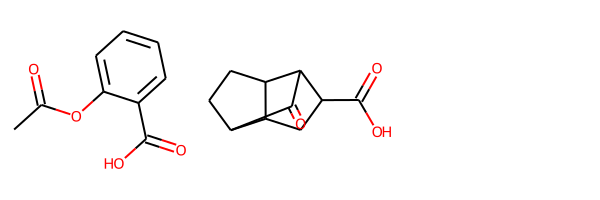

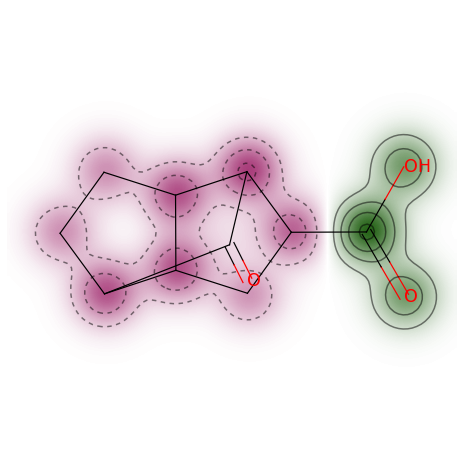

In [11]:
# Create and show the similarity map between two molecules
SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol_obj,data['MolObj'][1], SimilarityMaps.GetMorganFingerprint)

# Displaying the drawn molecule-images from molecular object of reference and the molecule from the top row of data
Draw.MolsToGridImage([ref_mol_obj,data['MolObj'][1]])

$ \color{olive}{\rule{25 cm}{0.1 cm}} $

$ \color{gray}{\rule{25 cm}{0.1 cm}} $

### Calculating Physico Chemical descriptors of all molecules in our data

#### The descriptors calculated from the molecular object and added to our dataset


,ID,SMILES,Dice Similarity to reference molecule,Tanimoto Similarity/Jaccard Coefficient to reference molecule,Morgan Finger Print,cLogP,Molecular Weight,Nr Rotable Bonds,Aromatic Ring classification,Nr Hydrogen donors,Nr Hydrogen acceptors,Polar Surface Area,MolObj
0,CHEMBL25-Var1489,CSC1(C(=O)O)C2CCC3C2CCC31,0.526316,0.357143,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...",2.2388,212.314,2,0,1,2,37.30,
1,CHEMBL25-Var3509,O=C(O)C1CC2C3CCC2C1C3=O,0.466387,0.304110,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.9322,180.203,1,0,1,2,54.37,
2,CHEMBL25-Var1634,CC1(C(=O)O)C2CCC(O2)C1(C)C(=O)O,0.563758,0.392523,"[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, ...",0.7294,214.217,2,0,2,3,83.83,
3,CHEMBL25-Var1676,COC12C=C(C)C(CC1)CC2C(=O)O,0.629747,0.459584,"[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, ...",1.8324,196.246,2,0,1,2,46.53,
4,CHEMBL25-Var3066,O=C(O)C12CC3CC(CC(F)(C3)C1)C2,0.480493,0.316216,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, ...",2.3795,198.237,1,0,1,1,37.30,

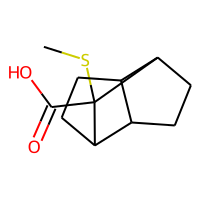
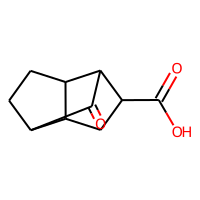
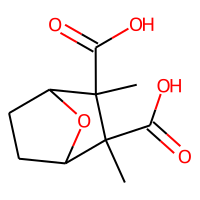
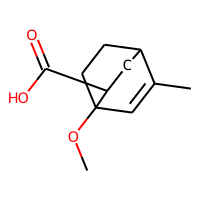
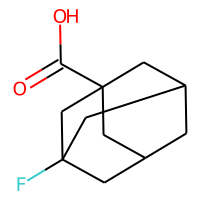

In [12]:
#Calculating some physico-chemical descriptors and adding them to the data
# 1. 
data['cLogP'] = data['MolObj'].apply(lambda mol: Descriptors.MolLogP(mol))
# 2. 
data['Molecular Weight'] = data['MolObj'].apply(lambda mol: Descriptors.MolWt(mol))
# 3. 
data['Nr Rotable Bonds'] = data['MolObj'].apply(lambda mol: Descriptors.NumRotatableBonds(mol))
# 4. 
data['Aromatic Ring classification'] = data['MolObj'].apply(lambda mol: Descriptors.NumAromaticRings(mol))
# 6. 
data['Nr Hydrogen donors'] = data['MolObj'].apply(lambda mol: Descriptors.NumHDonors(mol))
# 7. 
data['Nr Hydrogen acceptors'] = data['MolObj'].apply(lambda mol: Descriptors.NumHAcceptors(mol))
# 8. 
data['Polar Surface Area'] = data['MolObj'].apply(lambda mol: rdMolDescriptors.CalcTPSA(mol))

#Sorting the descriptors and all data columns in the order shown
data = data[['ID','SMILES','Dice Similarity to reference molecule','Tanimoto Similarity/Jaccard Coefficient to reference molecule', 'Morgan Finger Print','cLogP','Molecular Weight','Nr Rotable Bonds','Aromatic Ring classification','Nr Hydrogen donors','Nr Hydrogen acceptors','Polar Surface Area','MolObj']]

# Display the top 5 rows of data
data.head()

$ \color{gray}{\rule{25 cm}{0.1 cm}} $

$ \color{Pink}{\rule{25 cm}{0.1 cm}} $

### We will here rank and sort the data according to similarity of Dice/Tano Similarity and descriptors

#### The descriptors calculated from the molecular object and added to our dataset in order from left to right, the ones from the left having priority when sorting

#### 'Dice Similarity to reference molecule','Tanimoto Similarity/Jaccard Coefficient to reference molecule','cLogP','Molecular Weight','Nr Rotable Bonds','Nr Aromatic Rings','Nr Hydrogen donors','Nr Hydrogen acceptors','Polar Surface Area'

,ID,SMILES,Dice Similarity to reference molecule,Tanimoto Similarity/Jaccard Coefficient to reference molecule,Morgan Finger Print,cLogP,Molecular Weight,Nr Rotable Bonds,Aromatic Ring classification,Nr Hydrogen donors,Nr Hydrogen acceptors,Polar Surface Area,MolObj
100,CHEMBL25-Reference,CC(=O)Oc1ccccc1C(=O)O,1.000000,1.000000,"[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, ...",1.3101,180.159,2,1,1,3,63.60,
32,CHEMBL25-Var2680,O=C(O)C12C=CC(C1)c1ccccc12,0.666667,0.500000,"[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",2.0661,186.210,1,1,1,1,37.30,
17,CHEMBL25-Var232,CC(=O)C1OC12C(=O)C=C(C)NC2=O,0.661224,0.493902,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",-0.6843,195.174,1,0,1,4,75.77,
98,CHEMBL25-Var3722,O=C(O)C1Cc2c(o[nH]c2=O)CN1,0.657102,0.489316,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",-0.9332,184.151,1,1,3,4,95.33,
20,CHEMBL25-Var3127,NC1(C(=O)O)CSC2C(C(=O)O)C21,0.647399,0.478632,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, ...",-0.7855,203.219,2,0,3,4,100.62,

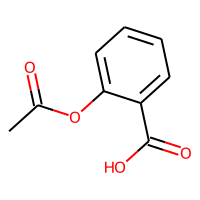
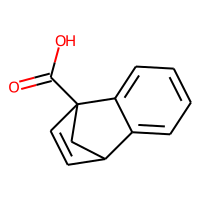
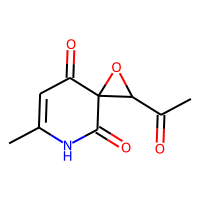
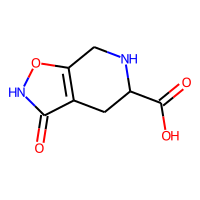
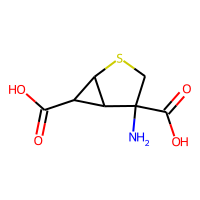

In [13]:
# Here we sort the data rows as in order shown, with "Dice Similarity.." as first permutation, "Tanimoto Similarity.." second permutation etc
data = data.sort_values(['Dice Similarity to reference molecule','Tanimoto Similarity/Jaccard Coefficient to reference molecule','cLogP','Molecular Weight','Nr Rotable Bonds','Aromatic Ring classification','Nr Hydrogen donors','Nr Hydrogen acceptors','Polar Surface Area'],ascending=False)

# Display the top 5 rows of data
data.head()

$ \color{Pink}{\rule{25 cm}{0.1 cm}} $

$ \color{lime}{\rule{25 cm}{0.1 cm}} $

### Saving our data to an Excel file that to be read in Orange

In [14]:
# Saving our data to a file "data.xls" appearing in the same folder as this notebook
data_In_Xlxs_Format = PandasTools.SaveXlsxFromFrame(frame=data, outFile='data.xls', molCol='MolObj') 
#data.to_excel('data.xls')
#data.to_csv('data.csv',index=False)

$ \color{lime}{\rule{25 cm}{0.1 cm}} $

$ \color{Orange}{\rule{25 cm}{0.1 cm}} $

### Great you made it here. We will continue our Exercise 8 in $ \color{Orange}{Orange \ Data \ Mining}$ to analyze all the molecules descriptors and to distinguish the molecules (Please contiune the exercise at Studium Week 4)

$ \color{Orange}{\rule{25 cm}{0.1 cm}} $